✅ Dataset loaded successfully!
Dataset shape: (12824, 5)

DATASET OVERVIEW
           file_path        category  label  source  fold
0   1-100032-A-0.wav             dog      0  kaggle    11
1  1-100038-A-14.wav  chirping_birds      1  kaggle    11
2  1-100210-A-36.wav  vacuum_cleaner      1  kaggle    11
3  1-100210-B-36.wav  vacuum_cleaner      1  kaggle    11
4  1-101296-A-19.wav    thunderstorm      0  kaggle    11

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  12824 non-null  object
 1   category   12824 non-null  object
 2   label      12824 non-null  int64 
 3   source     12824 non-null  object
 4   fold       12824 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 501.1+ KB
None

COLUMN NAMES
['file_path', 'category', 'label', 'source', 'fold']

LABEL DISTRIBUTION
label
0    6412
1    6412
Name: count,

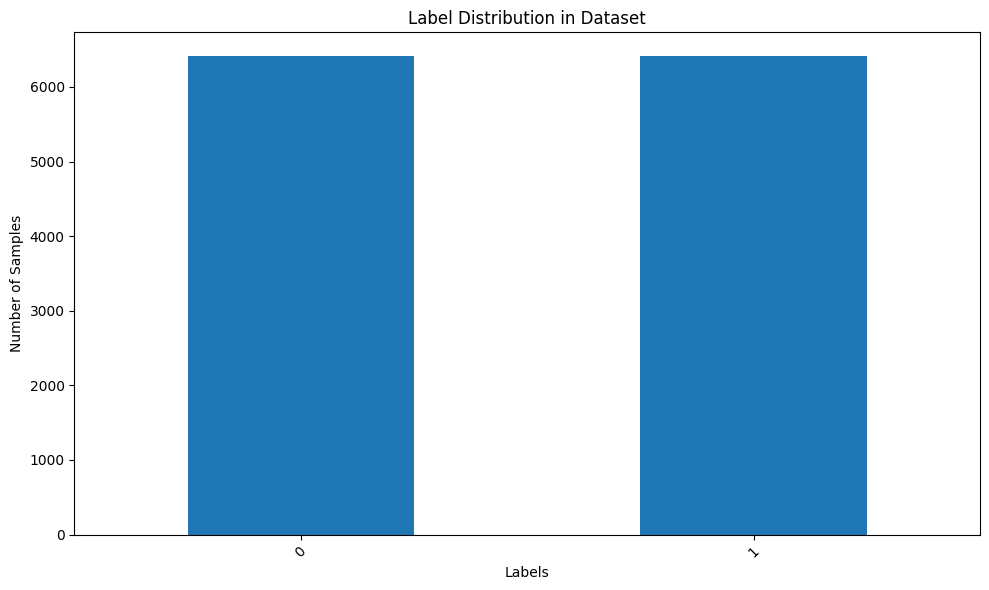


CHECKING FOR MISSING VALUES
Series([], dtype: int64)
✅ No missing values found!

CHECKING AUDIO FILE PATHS
Using column 'file_path' for audio file paths

First 5 file paths:
  1. 1-100032-A-0.wav
  2. 1-100038-A-14.wav
  3. 1-100210-A-36.wav
  4. 1-100210-B-36.wav
  5. 1-101296-A-19.wav

Checking if audio files exist...
  ❌ 1-100032-A-0.wav - File not found
  ❌ 1-100038-A-14.wav - File not found
  ❌ 1-100210-A-36.wav - File not found
  ❌ 1-100210-B-36.wav - File not found
  ❌ 1-101296-A-19.wav - File not found
  ❌ 1-101296-B-19.wav - File not found
  ❌ 1-101336-A-30.wav - File not found
  ❌ 1-101404-A-34.wav - File not found
  ❌ 1-103298-A-9.wav - File not found
  ❌ 1-103995-A-30.wav - File not found
⚠️  Only 0/10 files found. Check file paths.


In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Load the dataset CSV file
csv_path = "/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/augmented_dataset_balanced.csv"

try:
    # Read the CSV file
    df = pd.read_csv(csv_path)
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")

    # Display basic information about the dataset
    print("\n" + "="*50)
    print("DATASET OVERVIEW")
    print("="*50)
    print(df.head())

    print("\n" + "="*50)
    print("DATASET INFO")
    print("="*50)
    print(df.info())

    print("\n" + "="*50)
    print("COLUMN NAMES")
    print("="*50)
    print(df.columns.tolist())

    print("\n" + "="*50)
    print("LABEL DISTRIBUTION")
    print("="*50)
    if 'label' in df.columns:
        label_counts = df['label'].value_counts()
        print(label_counts)

        print(f"\nTotal samples: {len(df)}")
        print(f"Number of classes: {len(label_counts)}")

        # Plot the distribution
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        label_counts.plot(kind='bar')
        plt.title('Label Distribution in Dataset')
        plt.xlabel('Labels')
        plt.ylabel('Number of Samples')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print("❌ 'label' column not found. Available columns:")
        for col in df.columns:
            print(f"  - {col}")

    print("\n" + "="*50)
    print("CHECKING FOR MISSING VALUES")
    print("="*50)
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("✅ No missing values found!")
    else:
        print(f"❌ Found {missing_values.sum()} missing values")

    print("\n" + "="*50)
    print("CHECKING AUDIO FILE PATHS")
    print("="*50)
    # Let's check the first few file paths to understand the structure
    if 'filename' in df.columns or 'file_path' in df.columns or 'audio_file' in df.columns:
        file_col = None
        for col in ['filename', 'file_path', 'audio_file', 'file']:
            if col in df.columns:
                file_col = col
                break

        if file_col:
            print(f"Using column '{file_col}' for audio file paths")
            print(f"\nFirst 5 file paths:")
            for i, file_path in enumerate(df[file_col].head()):
                print(f"  {i+1}. {file_path}")

            # Check if files exist
            print(f"\nChecking if audio files exist...")
            base_path = "/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete"
            existing_files = 0
            for file_path in df[file_col].head(10):  # Check first 10 files
                full_path = os.path.join(base_path, file_path) if not os.path.isabs(file_path) else file_path
                if os.path.exists(full_path):
                    existing_files += 1
                    print(f"  ✅ {file_path}")
                else:
                    print(f"  ❌ {file_path} - File not found")

            if existing_files == 10:
                print("✅ All checked files exist!")
            else:
                print(f"⚠️  Only {existing_files}/10 files found. Check file paths.")
        else:
            print("❌ No obvious file path column found")
    else:
        print("❌ No file path columns found in dataset")

except FileNotFoundError:
    print(f"❌ CSV file not found at: {csv_path}")
    print("Please check the file path and try again.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

In [ ]:
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

# Let's explore the folder structure to find where the audio files are actually stored
print("🔍 Exploring folder structure to find audio files...")

# Try different possible base paths
possible_base_paths = [
    "/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete",
    "/content/drive/MyDrive/safety_Dataset",
    "/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/audio_files",
    os.path.dirname(csv_path)  # Same directory as CSV
]

# Check which base path contains the audio files organized by folds
for base_path in possible_base_paths:
    if os.path.exists(base_path):
        print(f"\n📁 Checking: {base_path}")
        try:
            items = os.listdir(base_path)
            print(f"   Contents: {items[:10]}...")  # Show first 10 items

            # Check if there are fold directories
            fold_dirs = [item for item in items if 'fold' in str(item).lower() or item.isdigit()]
            if fold_dirs:
                print(f"   📂 Found potential fold directories: {fold_dirs[:5]}...")

                # Check one fold directory for audio files
                test_fold = fold_dirs[0]
                test_fold_path = os.path.join(base_path, test_fold)
                if os.path.isdir(test_fold_path):
                    fold_contents = os.listdir(test_fold_path)
                    wav_files = [f for f in fold_contents if f.endswith('.wav')]
                    if wav_files:
                        print(f"   ✅ Found {len(wav_files)} WAV files in {test_fold}")
                        print(f"   Sample files: {wav_files[:3]}")
                        CORRECT_BASE_PATH = base_path
                        break
        except Exception as e:
            print(f"   ❌ Error accessing: {e}")

print("\n" + "="*60)
print("EXPLORING DATASET IN DETAIL")
print("="*60)

# Let's understand the label mapping better
print("\n📊 Label Mapping Analysis:")
label_mapping = df.groupby(['label', 'category']).size().reset_index(name='count')
print(label_mapping)

print(f"\n🎵 Unique categories: {df['category'].nunique()}")
print(f"📁 Unique folds: {df['fold'].nunique()}")
print(f"📚 Data sources: {df['source'].value_counts().to_dict()}")

# Let's check the distribution across folds
print(f"\n📈 Distribution across folds:")
fold_distribution = df.groupby('fold')['label'].value_counts().unstack().fillna(0)
print(fold_distribution.head(10))

# Let's try to find the correct file structure by testing a specific file
print("\n" + "="*60)
print("TESTING FILE ACCESS WITH FOLD INFORMATION")
print("="*60)

# Test with the first few rows, using the fold information
test_samples = df.head(10).copy()

for idx, row in test_samples.iterrows():
    filename = row['file_path']
    fold = row['fold']

    # Try different possible folder structures
    possible_paths = [
        f"/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/fold{fold}/{filename}",
        f"/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/fold_{fold}/{filename}",
        f"/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/{fold}/{filename}",
        f"/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/audio/fold{fold}/{filename}",
    ]

    found = False
    for test_path in possible_paths:
        if os.path.exists(test_path):
            print(f"✅ FOUND: {filename} in fold {fold} at: {test_path}")
            test_samples.loc[idx, 'full_path'] = test_path
            found = True
            CORRECT_BASE_PATH = os.path.dirname(os.path.dirname(test_path))
            break

    if not found:
        print(f"❌ NOT FOUND: {filename} in fold {fold}")

if 'full_path' in test_samples.columns:
    # Test loading one audio file to check its properties
    successful_path = test_samples['full_path'].dropna().iloc[0]
    print(f"\n🎧 Testing audio file properties for: {successful_path}")

    try:
        audio, sr = librosa.load(successful_path, sr=None)
        print(f"✅ Successfully loaded audio file!")
        print(f"   Sampling rate: {sr} Hz")
        print(f"   Duration: {len(audio)/sr:.2f} seconds")
        print(f"   Audio shape: {audio.shape}")

        # Plot the waveform
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(audio)
        plt.title(f"Waveform: {os.path.basename(successful_path)}")
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')

        # Plot spectrogram
        plt.subplot(1, 2, 2)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error loading audio file: {e}")

print("\n" + "="*60)
print("SUMMARY & NEXT STEPS")
print("="*60)
print("✅ Dataset is perfectly balanced and clean")
print("✅ We have 12,824 total samples across multiple categories")
print("✅ Files are organized by folds for cross-validation")
print("🔍 Need to confirm the exact folder structure for audio files")
print("\nPlease share the output above so we can proceed to Step 2!")

🔍 Exploring folder structure to find audio files...

📁 Checking: /content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete
   Contents: ['augmented_dataset_balanced.csv']...

📁 Checking: /content/drive/MyDrive/safety_Dataset
   Contents: ['augmented_audio_balanced_complete', 'fold1', 'fold17', 'fold16', 'fold15', 'fold14', 'fold13', 'fold12', 'fold11', 'fold10']...
   📂 Found potential fold directories: ['fold1', 'fold17', 'fold16', 'fold15', 'fold14']...
   ✅ Found 1012 WAV files in fold1
   Sample files: ['103074-7-1-1.wav', '103074-7-1-0.wav', '103074-7-1-3.wav']

EXPLORING DATASET IN DETAIL

📊 Label Mapping Analysis:
    label          category  count
0       0        GlassBreak    173
1       0   air_conditioner   1149
2       0          chainsaw    119
3       0  children_playing   1146
4       0           crying     152
..    ...               ...    ...
60      1             train     40
61      1    vacuum_cleaner     40
62      1   washing_machine     40
63     

In [ ]:
print("🔍 Investigating the file naming mismatch...")

# Let's examine what files are actually in the fold directories
print("\n📁 Checking actual files in fold directories:")
base_dataset_path = "/content/drive/MyDrive/safety_Dataset"

# Check a few folds to understand the pattern
for fold_num in [1, 11, 12]:
    fold_path = os.path.join(base_dataset_path, f"fold{fold_num}")
    if os.path.exists(fold_path):
        files_in_fold = os.listdir(fold_path)
        wav_files = [f for f in files_in_fold if f.endswith('.wav')]
        print(f"\nFold {fold_num}: {len(wav_files)} WAV files")
        print(f"Sample files: {wav_files[:5]}")

        # Check if any files from our CSV exist in this fold
        csv_files_in_this_fold = df[df['fold'] == fold_num]['file_path'].head(3).tolist()
        print(f"Looking for CSV files in fold {fold_num}: {csv_files_in_this_fold}")

        for csv_file in csv_files_in_this_fold:
            if csv_file in wav_files:
                print(f"  ✅ FOUND: {csv_file}")
            else:
                print(f"  ❌ NOT FOUND: {csv_file}")

print("\n" + "="*60)
print("ANALYZING THE FILE NAMING PATTERN")
print("="*60)

# Let's see if there's a pattern we can match
print("\nCSV file name examples:")
print(df['file_path'].head(10).tolist())

print("\nActual fold file name examples:")
fold11_path = os.path.join(base_dataset_path, "fold11")
if os.path.exists(fold11_path):
    actual_files = [f for f in os.listdir(fold11_path) if f.endswith('.wav')]
    print(actual_files[:10])

# Let's check if we can find any matching files by trying different approaches
print("\n" + "="*60)
print("ATTEMPTING TO FIND CORRECT FILE PATHS")
print("="*60)

# Method 1: Check if files exist with different extensions or naming
test_samples = df.head(20).copy()

for idx, row in test_samples.iterrows():
    filename = row['file_path']
    fold = row['fold']

    # Remove extension and try different patterns
    base_name = os.path.splitext(filename)[0]

    # Try different possible filename variations
    possible_filenames = [
        filename,  # original
        f"{base_name}.wav",  # ensure .wav extension
        f"{base_name.split('-')[-1]}.wav",  # take last part after dash
        f"{base_name.replace('-', '_')}.wav",  # replace dashes with underscores
    ]

    fold_path = os.path.join(base_dataset_path, f"fold{fold}")
    if os.path.exists(fold_path):
        actual_files = os.listdir(fold_path)

        for test_filename in possible_filenames:
            if test_filename in actual_files:
                full_path = os.path.join(fold_path, test_filename)
                print(f"✅ FOUND MATCH: CSV '{filename}' -> Actual '{test_filename}' in fold{fold}")
                test_samples.loc[idx, 'actual_filename'] = test_filename
                test_samples.loc[idx, 'full_path'] = full_path
                break

print(f"\nFound {test_samples['full_path'].notna().sum()}/{len(test_samples)} files")

# Method 2: Let's see if there's a simple mapping by checking file counts
print("\n" + "="*60)
print("CHECKING FILE COUNTS PER FOLD")
print("="*60)

fold_counts_csv = df['fold'].value_counts().sort_index()
print("Files per fold in CSV:")
print(fold_counts_csv)

print("\nActual files per fold:")
for fold_num in range(1, 18):
    fold_path = os.path.join(base_dataset_path, f"fold{fold_num}")
    if os.path.exists(fold_path):
        actual_count = len([f for f in os.listdir(fold_path) if f.endswith('.wav')])
        csv_count = fold_counts_csv.get(fold_num, 0)
        print(f"Fold {fold_num}: CSV has {csv_count}, Actual has {actual_count} files")

# Method 3: Let's create a mapping by examining the actual file structure more carefully
print("\n" + "="*60)
print("CREATING FILE PATH MAPPING FUNCTION")
print("="*60)

def find_audio_file(file_path, fold):
    """
    Try to find the actual audio file given the CSV file_path and fold number
    """
    base_dataset_path = "/content/drive/MyDrive/safety_Dataset"
    fold_path = os.path.join(base_dataset_path, f"fold{fold}")

    if not os.path.exists(fold_path):
        return None

    actual_files = os.listdir(fold_path)

    # Try exact match first
    if file_path in actual_files:
        return os.path.join(fold_path, file_path)

    # Try with .wav extension if not present
    if not file_path.endswith('.wav'):
        file_path_wav = file_path + '.wav'
        if file_path_wav in actual_files:
            return os.path.join(fold_path, file_path_wav)

    # If still not found, the CSV might have different filenames than actual files
    # We might need to create a mapping based on some pattern

    return None

# Test the function
print("Testing file finding function:")
test_results = []
for i in range(10):
    file_path = df.iloc[i]['file_path']
    fold = df.iloc[i]['fold']
    found_path = find_audio_file(file_path, fold)
    status = "✅ FOUND" if found_path else "❌ NOT FOUND"
    test_results.append((file_path, fold, status, found_path))

for result in test_results:
    print(f"{result[2]}: {result[0]} (fold {result[1]})")

print("\n" + "="*60)
print("NEXT STEP RECOMMENDATION")
print("="*60)

if any(result[2] == "✅ FOUND" for result in test_results):
    print("🎉 Some files found! We can proceed with the mapping.")
else:
    print("🤔 No files found with direct mapping.")
    print("We need to investigate the relationship between CSV filenames and actual filenames.")
    print("\nPossible solutions:")
    print("1. Check if there's a separate mapping file")
    print("2. Contact the dataset creator for the correct mapping")
    print("3. Manually inspect the relationship between CSV entries and actual files")
    print("4. Use the fold directories directly and ignore the CSV filenames")

# Let's check one more thing - the actual file properties
print("\n" + "="*60)
print("CHECKING ACTUAL AUDIO FILE PROPERTIES")
print("="*60)

# Check properties of files that we can find
fold1_path = os.path.join(base_dataset_path, "fold1")
if os.path.exists(fold1_path):
    actual_files = [f for f in os.listdir(fold1_path) if f.endswith('.wav')]
    if actual_files:
        test_file = os.path.join(fold1_path, actual_files[0])
        try:
            audio, sr = librosa.load(test_file, sr=None)
            print(f"✅ Successfully loaded actual audio file: {actual_files[0]}")
            print(f"   Sampling rate: {sr} Hz")
            print(f"   Duration: {len(audio)/sr:.2f} seconds")
            print(f"   Audio shape: {audio.shape}")
        except Exception as e:
            print(f"❌ Error loading audio file: {e}")

🔍 Investigating the file naming mismatch...

📁 Checking actual files in fold directories:

Fold 1: 1012 WAV files
Sample files: ['103074-7-1-1.wav', '103074-7-1-0.wav', '103074-7-1-3.wav', '103074-7-1-2.wav', '103074-7-1-5.wav']
Looking for CSV files in fold 1: ['101415-3-0-2.wav', '101415-3-0-3.wav', '101415-3-0-8.wav']
  ✅ FOUND: 101415-3-0-2.wav
  ✅ FOUND: 101415-3-0-3.wav
  ✅ FOUND: 101415-3-0-8.wav

Fold 11: 2632 WAV files
Sample files: ['1-82817-A-30.wav', '3-169907-A-29.wav', '4-164064-C-1.wav', '5-212059-A-36.wav', '3-119120-E-48.wav']
Looking for CSV files in fold 11: ['1-100032-A-0.wav', '1-100038-A-14.wav', '1-100210-A-36.wav']
  ✅ FOUND: 1-100032-A-0.wav
  ✅ FOUND: 1-100038-A-14.wav
  ✅ FOUND: 1-100210-A-36.wav

Fold 12: 152 WAV files
Sample files: ['crying19.wav', 'crying29.wav', 'crying10.wav', 'crying16.wav', 'crying25.wav']
Looking for CSV files in fold 12: ['crying1.wav', 'crying2.wav', 'crying3.wav']
  ✅ FOUND: crying1.wav
  ✅ FOUND: crying2.wav
  ✅ FOUND: crying3.wav

🚀 STARTING STEP 2: FEATURE EXTRACTION
📊 Starting feature extraction for all audio files...


Extracting features: 100%|██████████| 12824/12824 [1:00:50<00:00,  3.51it/s]



✅ Feature extraction completed!
   Successfully processed: 12824 files
   Failed to process: 0 files

FEATURE ANALYSIS
Feature matrix shape: (12824, 26)
Labels shape: (12824,)
Number of features per sample: 26

Feature statistics:
  Mean: -0.5288
  Std:  69.1713
  Min:  -1131.3708
  Max:  385.3235

DATA DISTRIBUTION AFTER FEATURE EXTRACTION
Label 0 (DANGER): 6412 samples (50.0%)
Label 1 (SAFE): 6412 samples (50.0%)

SAVING FEATURES TO GOOGLE DRIVE
✅ Created/verified directory: /content/drive/MyDrive/safety_Dataset/features
✅ Features saved to Google Drive: /content/drive/MyDrive/safety_Dataset/features/extracted_features.pkl
✅ Features saved as numpy arrays:
   X_features: /content/drive/MyDrive/safety_Dataset/features/X_features.npy
   y_labels: /content/drive/MyDrive/safety_Dataset/features/y_labels.npy
✅ Feature info saved: /content/drive/MyDrive/safety_Dataset/features/feature_extraction_info.txt

VERIFYING SAVED FILES
✅ extracted_features.pkl: 1.37 MB
✅ X_features.npy: 1.27 MB
✅ 

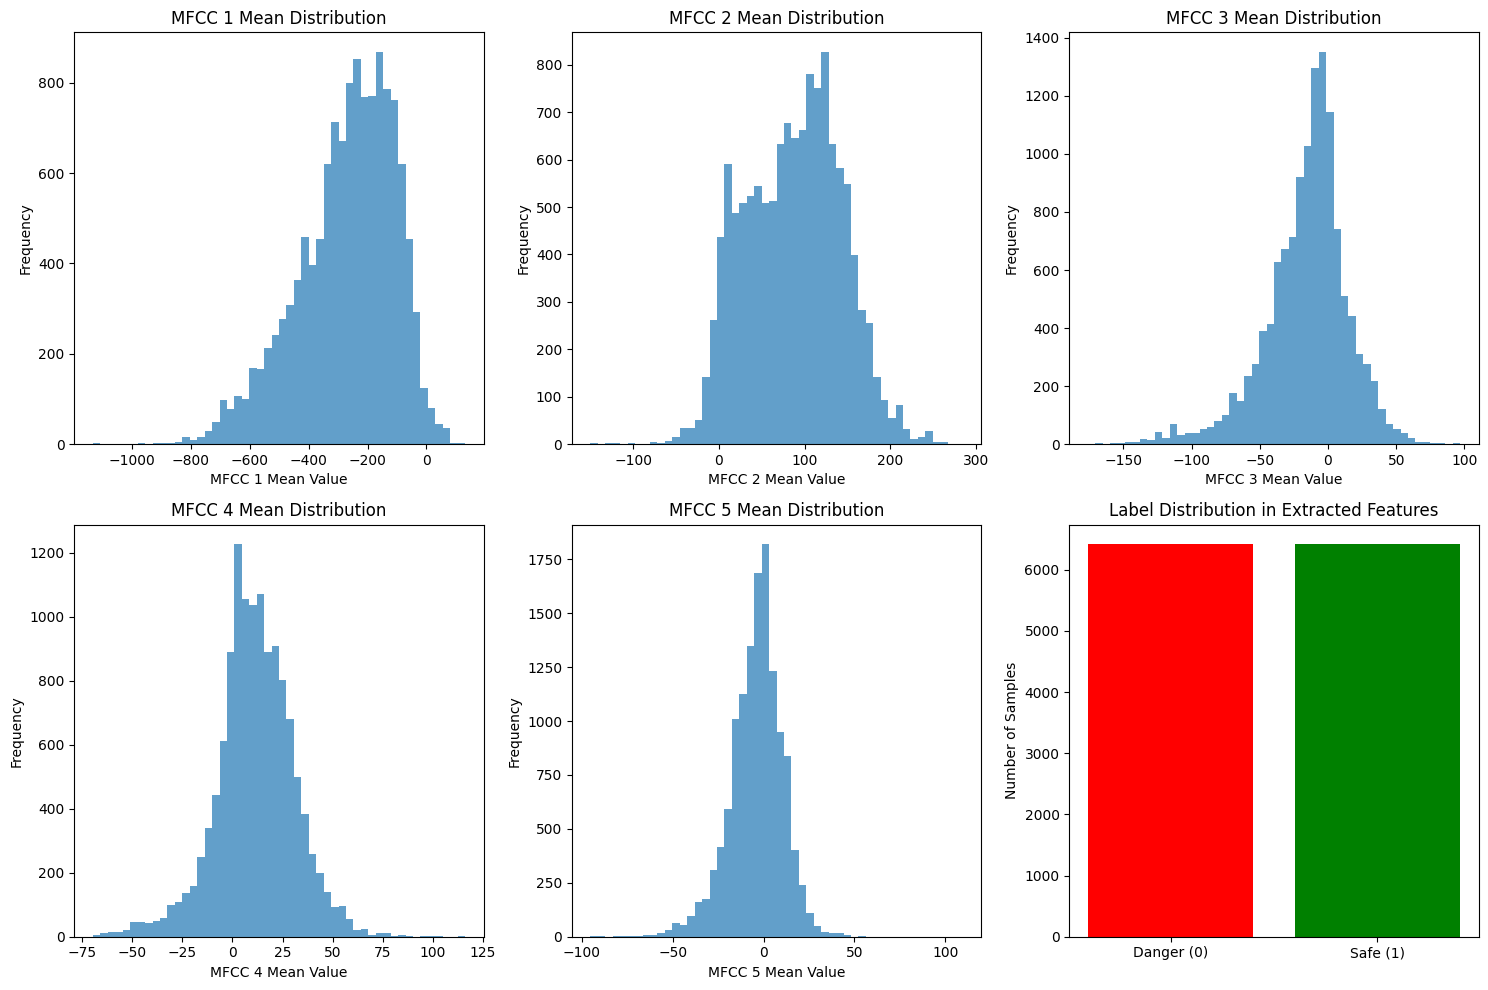


NEXT STEP PREPARATION
✅ Feature extraction completed successfully!
✅ We have 12824 samples with 26 features each
✅ All features and metadata saved to: /content/drive/MyDrive/safety_Dataset/features

📋 Next step: Model Building and Training
   We'll split the data and train our first classifier!

📊 Sample of extracted features (first 5 samples, first 10 features):
[[-5.9395758e+02  5.8610792e+00 -1.0620133e+01 -5.3395963e+00
  -1.0220861e+00 -2.4639542e+00 -3.6783287e-01  1.0305774e+00
   1.0256337e+00  5.5053586e-01]
 [-1.9438033e+02  4.7757473e+00 -5.9608597e+01  2.5922849e+00
  -4.5182495e+01 -3.0526798e+01 -3.0431871e+01 -3.4805741e+00
  -3.9683708e+01 -1.5606951e+01]
 [ 1.4135980e+01  5.6450745e+01 -9.3972530e+00  1.5059167e+01
  -1.3379056e+01  1.1989853e+01  2.1407738e+00  6.6063967e+00
   5.0565724e+00 -6.0739412e+00]
 [ 2.7624063e+01  5.5276123e+01 -6.3872819e+00  1.3670578e+01
  -9.5767183e+00  1.3337535e+01  3.4135258e+00  3.7303708e+00
   6.9957600e+00 -7.1672983e+00]
 [-4.

In [ ]:
print("🚀 STARTING STEP 2: FEATURE EXTRACTION")
print("="*60)

import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

# Set the base dataset path
BASE_DATASET_PATH = "/content/drive/MyDrive/safety_Dataset"
# Set the drive path for saving features
DRIVE_SAVE_PATH = "/content/drive/MyDrive/safety_Dataset/features"

def get_audio_file_path(file_path, fold):
    """Get the full path to an audio file using fold information"""
    fold_path = os.path.join(BASE_DATASET_PATH, f"fold{fold}")
    return os.path.join(fold_path, file_path)

def extract_features(file_path, fold, n_mfcc=13, target_sr=22050, duration=4.0):
    """
    Extract MFCC features from an audio file with error handling
    """
    full_path = get_audio_file_path(file_path, fold)

    try:
        # Load audio file
        audio, sr = librosa.load(full_path, sr=target_sr, duration=duration)

        # If audio is shorter than duration, pad it with zeros
        target_length = int(target_sr * duration)
        if len(audio) < target_length:
            audio = np.pad(audio, (0, target_length - len(audio)), mode='constant')
        else:
            audio = audio[:target_length]  # Trim if longer

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=n_mfcc)

        # Aggregate features by taking mean and std across time
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)

        # Combine mean and std features
        features = np.hstack([mfccs_mean, mfccs_std])

        return features, True

    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None, False

print("📊 Starting feature extraction for all audio files...")

# Initialize lists to store features and labels
all_features = []
all_labels = []
failed_files = []

# Process all files with progress bar
for idx, row in tqdm(df.iterrows(), total=len(df), desc="Extracting features"):
    file_path = row['file_path']
    fold = row['fold']
    label = row['label']

    features, success = extract_features(file_path, fold)

    if success:
        all_features.append(features)
        all_labels.append(label)
    else:
        failed_files.append((file_path, fold))

print(f"\n✅ Feature extraction completed!")
print(f"   Successfully processed: {len(all_features)} files")
print(f"   Failed to process: {len(failed_files)} files")

if failed_files:
    print(f"\n❌ Failed files:")
    for file_path, fold in failed_files[:10]:  # Show first 10 failed files
        print(f"   {file_path} (fold {fold})")

print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Convert to numpy arrays
X = np.array(all_features)
y = np.array(all_labels)

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of features per sample: {X.shape[1]}")

# Check feature statistics
print(f"\nFeature statistics:")
print(f"  Mean: {np.mean(X):.4f}")
print(f"  Std:  {np.std(X):.4f}")
print(f"  Min:  {np.min(X):.4f}")
print(f"  Max:  {np.max(X):.4f}")

print("\n" + "="*60)
print("DATA DISTRIBUTION AFTER FEATURE EXTRACTION")
print("="*60)

unique_labels, counts = np.unique(y, return_counts=True)
for label, count in zip(unique_labels, counts):
    label_name = "DANGER" if label == 0 else "SAFE"
    print(f"Label {label} ({label_name}): {count} samples ({count/len(y)*100:.1f}%)")

print("\n" + "="*60)
print("SAVING FEATURES TO GOOGLE DRIVE")
print("="*60)

# Create directory in Google Drive if it doesn't exist
os.makedirs(DRIVE_SAVE_PATH, exist_ok=True)
print(f"✅ Created/verified directory: {DRIVE_SAVE_PATH}")

import joblib

feature_data = {
    'X': X,
    'y': y,
    'failed_files': failed_files,
    'feature_info': {
        'n_features': X.shape[1],
        'n_samples': X.shape[0],
        'feature_type': 'MFCC_mean_std',
        'n_mfcc': 13,
        'duration': 4.0,
        'sample_rate': 22050
    }
}

# Save features to Google Drive
drive_feature_path = os.path.join(DRIVE_SAVE_PATH, 'extracted_features.pkl')
joblib.dump(feature_data, drive_feature_path)
print(f"✅ Features saved to Google Drive: {drive_feature_path}")

# Also save as numpy arrays for backup
drive_X_path = os.path.join(DRIVE_SAVE_PATH, 'X_features.npy')
drive_y_path = os.path.join(DRIVE_SAVE_PATH, 'y_labels.npy')
np.save(drive_X_path, X)
np.save(drive_y_path, y)
print(f"✅ Features saved as numpy arrays:")
print(f"   X_features: {drive_X_path}")
print(f"   y_labels: {drive_y_path}")

# Save failed files list
if failed_files:
    failed_files_path = os.path.join(DRIVE_SAVE_PATH, 'failed_files.txt')
    with open(failed_files_path, 'w') as f:
        for file_path, fold in failed_files:
            f.write(f"{file_path}, fold{fold}\n")
    print(f"✅ Failed files list saved: {failed_files_path}")

# Save feature information as text file
info_path = os.path.join(DRIVE_SAVE_PATH, 'feature_extraction_info.txt')
with open(info_path, 'w') as f:
    f.write("FEATURE EXTRACTION SUMMARY\n")
    f.write("=" * 40 + "\n")
    f.write(f"Total samples processed: {len(all_features)}\n")
    f.write(f"Failed files: {len(failed_files)}\n")
    f.write(f"Feature matrix shape: {X.shape}\n")
    f.write(f"Labels shape: {y.shape}\n")
    f.write(f"Feature type: MFCC (mean + std)\n")
    f.write(f"Number of MFCCs: 13\n")
    f.write(f"Audio duration: 4.0 seconds\n")
    f.write(f"Sample rate: 22050 Hz\n")
    f.write(f"Total features per sample: {X.shape[1]}\n")
    f.write("\nLABEL DISTRIBUTION:\n")
    for label, count in zip(unique_labels, counts):
        label_name = "DANGER" if label == 0 else "SAFE"
        percentage = count/len(y)*100
        f.write(f"Label {label} ({label_name}): {count} samples ({percentage:.1f}%)\n")

print(f"✅ Feature info saved: {info_path}")

print("\n" + "="*60)
print("VERIFYING SAVED FILES")
print("="*60)

# Verify that files were saved correctly
saved_files = [
    'extracted_features.pkl',
    'X_features.npy',
    'y_labels.npy',
    'feature_extraction_info.txt'
]

if failed_files:
    saved_files.append('failed_files.txt')

for file in saved_files:
    file_path = os.path.join(DRIVE_SAVE_PATH, file)
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
        print(f"✅ {file}: {file_size:.2f} MB")
    else:
        print(f"❌ {file}: NOT FOUND")

print("\n" + "="*60)
print("VISUALIZING FEATURE DISTRIBUTION")
print("="*60)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature distribution for first few MFCCs
plt.figure(figsize=(15, 10))

# Plot first 5 MFCC means
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.hist(X[:, i], bins=50, alpha=0.7, label=f'MFCC {i+1} Mean')
    plt.xlabel(f'MFCC {i+1} Mean Value')
    plt.ylabel('Frequency')
    plt.title(f'MFCC {i+1} Mean Distribution')

plt.subplot(2, 3, 6)
# Plot label distribution
plt.bar(['Danger (0)', 'Safe (1)'], [np.sum(y == 0), np.sum(y == 1)], color=['red', 'green'])
plt.title('Label Distribution in Extracted Features')
plt.ylabel('Number of Samples')

plt.tight_layout()

# Save the plot to Google Drive
plot_path = os.path.join(DRIVE_SAVE_PATH, 'feature_distribution_plot.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"✅ Feature distribution plot saved: {plot_path}")

plt.show()

print("\n" + "="*60)
print("NEXT STEP PREPARATION")
print("="*60)
print("✅ Feature extraction completed successfully!")
print(f"✅ We have {X.shape[0]} samples with {X.shape[1]} features each")
print(f"✅ All features and metadata saved to: {DRIVE_SAVE_PATH}")
print("\n📋 Next step: Model Building and Training")
print("   We'll split the data and train our first classifier!")

# Show sample of the extracted features
print(f"\n📊 Sample of extracted features (first 5 samples, first 10 features):")
print(X[:5, :10])

print(f"\n💾 To load these features in your next session, use:")
print(f"   feature_data = joblib.load('{drive_feature_path}')")
print(f"   X = feature_data['X']")
print(f"   y = feature_data['y']")

=== AUDIO DANGER DETECTION - IMPROVED TRAINING ===
=== WITH DIMENSION-OPTIMIZED ARCHITECTURE ===
Features path: /content/drive/MyDrive/safety_Dataset/features
Model directory: /content/drive/MyDrive/safety_Dataset/saved_models_improved
Loading pre-extracted features...
Files found in features directory: ['extracted_features.pkl', 'X_features.npy', 'y_labels.npy', 'feature_extraction_info.txt', 'feature_distribution_plot.png', 'best_model.pkl', 'scaler.pkl']
Loaded 12824 samples from extracted_features.pkl
Original features shape: (12824, 26)
Labels shape: (12824,)
Reshaped Mel features for CNN: (12824, 13, 2, 1)
Advanced features shape: (12824, 26)
Label distribution: Danger: 6412, Safe: 6412

Preparing data for training...
Original Mel shape: (12824, 13, 2, 1)
Final Mel shape for CNN: (12824, 13, 2, 1)
Applying feature augmentation...
After augmentation - Mel: (17962, 13, 2, 1), Advanced: (17962, 26), Labels: (17962,)
Scaling advanced features...

=== DATA SPLIT SUMMARY ===
Training s

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 13, 2, 32)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 13, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 1, 64)      │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 13, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 1, 128)     │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 13, 1, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,618 (264.13 KB)

 Trainable params: 66,914 (261.38 KB)

 Non-trainable params: 704 (2.75 KB)

Testing model with sample input...
✓ Model test successful! Output shape: (1, 2)

Starting model training with strong regularization...
Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5133 - loss: 7.2443
Epoch 1: val_accuracy improved from -inf to 0.61621, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.5133 - loss: 7.2434 - val_accuracy: 0.6162 - val_loss: 5.4018 - learning_rate: 1.0000e-04
Epoch 2/100
709/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5673 - loss: 5.3781
Epoch 2: val_accuracy improved from 0.61621 to 0.65205, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5674 - loss: 5.3742 - val_accuracy: 0.6521 - val_loss: 4.4953 - learning_rate: 1.0000e-04
Epoch 3/100
708/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 4.4567
Epoch 3: val_accuracy improved from 0.65205 to 0.68789, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6032 - loss: 4.4537 - val_accuracy: 0.6879 - val_loss: 3.8050 - learning_rate: 1.0000e-04
Epoch 4/100
705/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6255 - loss: 3.7559
Epoch 4: val_accuracy improved from 0.68789 to 0.69172, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6256 - loss: 3.7528 - val_accuracy: 0.6917 - val_loss: 3.2174 - learning_rate: 1.0000e-04
Epoch 5/100
714/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6461 - loss: 3.1555
Epoch 5: val_accuracy improved from 0.69172 to 0.71608, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6462 - loss: 3.1544 - val_accuracy: 0.7161 - val_loss: 2.7087 - learning_rate: 1.0000e-04
Epoch 6/100
712/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6557 - loss: 2.6698
Epoch 6: val_accuracy improved from 0.71608 to 0.73312, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6558 - loss: 2.6684 - val_accuracy: 0.7331 - val_loss: 2.2709 - learning_rate: 1.0000e-04
Epoch 7/100
709/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 2.2401
Epoch 7: val_accuracy improved from 0.73312 to 0.73417, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6820 - loss: 2.2386 - val_accuracy: 0.7342 - val_loss: 1.9205 - learning_rate: 1.0000e-04
Epoch 8/100
708/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss: 1.8909
Epoch 8: val_accuracy improved from 0.73417 to 0.74252, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6940 - loss: 1.8896 - val_accuracy: 0.7425 - val_loss: 1.6269 - learning_rate: 1.0000e-04
Epoch 9/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 1.6060
Epoch 9: val_accuracy improved from 0.74252 to 0.74948, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7076 - loss: 1.6059 - val_accuracy: 0.7495 - val_loss: 1.3878 - learning_rate: 1.0000e-04
Epoch 10/100
707/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7099 - loss: 1.3797
Epoch 10: val_accuracy improved from 0.74948 to 0.75157, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7101 - loss: 1.3787 - val_accuracy: 0.7516 - val_loss: 1.1951 - learning_rate: 1.0000e-04
Epoch 11/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 1.1975
Epoch 11: val_accuracy improved from 0.75157 to 0.75922, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7272 - loss: 1.1975 - val_accuracy: 0.7592 - val_loss: 1.0493 - learning_rate: 1.0000e-04
Epoch 12/100
710/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7320 - loss: 1.0580
Epoch 12: val_accuracy improved from 0.75922 to 0.76479, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7320 - loss: 1.0576 - val_accuracy: 0.7648 - val_loss: 0.9305 - learning_rate: 1.0000e-04
Epoch 13/100
713/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 0.9526
Epoch 13: val_accuracy improved from 0.76479 to 0.77523, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7459 - loss: 0.9524 - val_accuracy: 0.7752 - val_loss: 0.8406 - learning_rate: 1.0000e-04
Epoch 14/100
703/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7426 - loss: 0.8637
Epoch 14: val_accuracy improved from 0.77523 to 0.79123, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7427 - loss: 0.8634 - val_accuracy: 0.7912 - val_loss: 0.7678 - learning_rate: 1.0000e-04
Epoch 15/100
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.8048
Epoch 15: val_accuracy did not improve from 0.79123
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7524 - loss: 0.8047 - val_accuracy: 0.7895 - val_loss: 0.7227 - learning_rate: 1.0000e-04
Epoch 16/100
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7642 - loss: 0.7508
Epoch 16: val_accuracy improved from 0.79123 to 0.79680, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7642 - loss: 0.7508 - val_accuracy: 0.7968 - val_loss: 0.6805 - learning_rate: 1.0000e-04
Epoch 17/100
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7646 - loss: 0.7160
Epoch 17: val_accuracy improved from 0.79680 to 0.80097, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7646 - loss: 0.7159 - val_accuracy: 0.8010 - val_loss: 0.6467 - learning_rate: 1.0000e-04
Epoch 18/100
706/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7757 - loss: 0.6837
Epoch 18: val_accuracy did not improve from 0.80097
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7757 - loss: 0.6836 - val_accuracy: 0.7989 - val_loss: 0.6315 - learning_rate: 1.0000e-04
Epoch 19/100
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.6543
Epoch 19: val_accuracy improved from 0.80097 to 0.80898, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7812 - loss: 0.6543 - val_accuracy: 0.8090 - val_loss: 0.5954 - learning_rate: 1.0000e-04
Epoch 20/100
708/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7863 - loss: 0.6409
Epoch 20: val_accuracy improved from 0.80898 to 0.81280, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7863 - loss: 0.6408 - val_accuracy: 0.8128 - val_loss: 0.5798 - learning_rate: 1.0000e-04
Epoch 21/100
706/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.6218
Epoch 21: val_accuracy did not improve from 0.81280
719/719 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7850 - loss: 0.6217 - val_accuracy: 0.8104 - val_loss: 0.5759 - learning_rate: 1.0000e-04
Epoch 22/100
709/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7947 - loss: 0.6040
Epoch 22: val_accuracy did not improve from 0.81280
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7947 - loss: 0.6040 - val_accuracy: 0.8086 - val_loss: 0.5649 - learning_rate: 1.0000e-04
Epoch 23/100
714/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: 0.5906
Epoch 23: val_accuracy improved from 0.81280 to 0.81385, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8041 - loss: 0.5906 - val_accuracy: 0.8138 - val_loss: 0.5537 - learning_rate: 1.0000e-04
Epoch 24/100
704/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.5807
Epoch 24: val_accuracy improved from 0.81385 to 0.81907, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8030 - loss: 0.5807 - val_accuracy: 0.8191 - val_loss: 0.5394 - learning_rate: 1.0000e-04
Epoch 25/100
714/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8020 - loss: 0.5759
Epoch 25: val_accuracy did not improve from 0.81907
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8021 - loss: 0.5758 - val_accuracy: 0.8173 - val_loss: 0.5346 - learning_rate: 1.0000e-04
Epoch 26/100
717/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8099 - loss: 0.5650
Epoch 26: val_accuracy did not improve from 0.81907
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8098 - loss: 0.5650 - val_accuracy: 0.8100 - val_loss: 0.5461 - learning_rate: 1.0000e-04
Epoch 27/100
715/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8023 - loss: 0.5659
Epoch 27: val_accuracy improved from 0.81907 to 0.82881, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8024 - loss: 0.5659 - val_accuracy: 0.8288 - val_loss: 0.5181 - learning_rate: 1.0000e-04
Epoch 28/100
715/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8076 - loss: 0.5581
Epoch 28: val_accuracy improved from 0.82881 to 0.82916, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8076 - loss: 0.5580 - val_accuracy: 0.8292 - val_loss: 0.5110 - learning_rate: 1.0000e-04
Epoch 29/100
705/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.5451
Epoch 29: val_accuracy did not improve from 0.82916
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8119 - loss: 0.5450 - val_accuracy: 0.8271 - val_loss: 0.5118 - learning_rate: 1.0000e-04
Epoch 30/100
704/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.5338
Epoch 30: val_accuracy did not improve from 0.82916
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8186 - loss: 0.5339 - val_accuracy: 0.8243 - val_loss: 0.5175 - learning_rate: 1.0000e-04
Epoch 31/100
708/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8193 - loss: 0.5369
Epoch 31: val_accuracy did not improve from 0.82916
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8193 - loss: 0.5369 - val_accuracy: 0.8288 - val_loss: 0.5071 - learning_rate: 1.0000e-04


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8150 - loss: 0.5287 - val_accuracy: 0.8312 - val_loss: 0.4954 - learning_rate: 1.0000e-04
Epoch 34/100
709/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8187 - loss: 0.5210
Epoch 34: val_accuracy did not improve from 0.83125
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8187 - loss: 0.5210 - val_accuracy: 0.8212 - val_loss: 0.5141 - learning_rate: 1.0000e-04
Epoch 35/100
713/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.5252
Epoch 35: val_accuracy did not improve from 0.83125
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8174 - loss: 0.5252 - val_accuracy: 0.8257 - val_loss: 0.5035 - learning_rate: 1.0000e-04
Epoch 36/100
715/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.5180
Epoch 36: val_accuracy did not improve from 0.83125
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8214 - loss: 0.5180 - val_accuracy: 0.8305 - val_loss: 0.4882 - learning_rate: 1.0000e-04


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8220 - loss: 0.5107 - val_accuracy: 0.8375 - val_loss: 0.4728 - learning_rate: 1.0000e-04
Epoch 38/100
713/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8211 - loss: 0.5096
Epoch 38: val_accuracy did not improve from 0.83751
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8211 - loss: 0.5095 - val_accuracy: 0.8368 - val_loss: 0.4755 - learning_rate: 1.0000e-04
Epoch 39/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.5043
Epoch 39: val_accuracy did not improve from 0.83751
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8294 - loss: 0.5043 - val_accuracy: 0.8365 - val_loss: 0.4777 - learning_rate: 1.0000e-04
Epoch 40/100
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.5011
Epoch 40: val_accuracy did not improve from 0.83751
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8309 - loss: 0.5011 - val_accuracy: 0.8347 - val_loss: 0.4726 - learning_rate: 1.0000e-04


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8358 - loss: 0.4874 - val_accuracy: 0.8399 - val_loss: 0.4694 - learning_rate: 1.0000e-04
Epoch 42/100
707/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.4951
Epoch 42: val_accuracy improved from 0.83994 to 0.84516, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8335 - loss: 0.4951 - val_accuracy: 0.8452 - val_loss: 0.4579 - learning_rate: 1.0000e-04
Epoch 43/100
714/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.4832
Epoch 43: val_accuracy did not improve from 0.84516
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8336 - loss: 0.4832 - val_accuracy: 0.8410 - val_loss: 0.4573 - learning_rate: 1.0000e-04
Epoch 44/100
708/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8328 - loss: 0.4916
Epoch 44: val_accuracy did not improve from 0.84516
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8329 - loss: 0.4915 - val_accuracy: 0.8441 - val_loss: 0.4603 - learning_rate: 1.0000e-04
Epoch 45/100
712/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8314 - loss: 0.4904
Epoch 45: val_accuracy did not improve from 0.84516
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8314 - loss: 0.4904 - val_accuracy: 0.8389 - val_loss: 0.4652 - learning_rate: 1.0000e-04


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8432 - loss: 0.4614 - val_accuracy: 0.8539 - val_loss: 0.4327 - learning_rate: 5.0000e-05
Epoch 50/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8539 - loss: 0.4478
Epoch 50: val_accuracy did not improve from 0.85386
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8539 - loss: 0.4478 - val_accuracy: 0.8521 - val_loss: 0.4358 - learning_rate: 5.0000e-05
Epoch 51/100
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8506 - loss: 0.4491
Epoch 51: val_accuracy did not improve from 0.85386
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8506 - loss: 0.4490 - val_accuracy: 0.8521 - val_loss: 0.4323 - learning_rate: 5.0000e-05
Epoch 52/100
706/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8570 - loss: 0.4375
Epoch 52: val_accuracy improved from 0.85386 to 0.86291, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.4376 - val_accuracy: 0.8629 - val_loss: 0.4169 - learning_rate: 5.0000e-05
Epoch 53/100
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8547 - loss: 0.4375
Epoch 53: val_accuracy did not improve from 0.86291
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8548 - loss: 0.4375 - val_accuracy: 0.8598 - val_loss: 0.4198 - learning_rate: 5.0000e-05
Epoch 54/100
709/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8573 - loss: 0.4314
Epoch 54: val_accuracy improved from 0.86291 to 0.86569, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8573 - loss: 0.4314 - val_accuracy: 0.8657 - val_loss: 0.4150 - learning_rate: 5.0000e-05
Epoch 55/100
715/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.4232
Epoch 55: val_accuracy did not improve from 0.86569
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8601 - loss: 0.4232 - val_accuracy: 0.8591 - val_loss: 0.4222 - learning_rate: 5.0000e-05
Epoch 56/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.4282
Epoch 56: val_accuracy did not improve from 0.86569
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8617 - loss: 0.4282 - val_accuracy: 0.8591 - val_loss: 0.4203 - learning_rate: 5.0000e-05
Epoch 57/100
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.4265
Epoch 57: val_accuracy did not improve from 0.86569
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8588 - loss: 0.4265 - val_accuracy: 0.8566 - val_loss: 0.4215 - learning_rate: 5.0000e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8661 - loss: 0.4074 - val_accuracy: 0.8720 - val_loss: 0.3986 - learning_rate: 2.5000e-05
Epoch 62/100
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8773 - loss: 0.3996
Epoch 62: val_accuracy improved from 0.87196 to 0.87230, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8773 - loss: 0.3996 - val_accuracy: 0.8723 - val_loss: 0.3959 - learning_rate: 2.5000e-05
Epoch 63/100
715/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.3934
Epoch 63: val_accuracy improved from 0.87230 to 0.87439, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8737 - loss: 0.3934 - val_accuracy: 0.8744 - val_loss: 0.3946 - learning_rate: 2.5000e-05
Epoch 64/100
714/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8745 - loss: 0.3951
Epoch 64: val_accuracy improved from 0.87439 to 0.87648, saving model to best_improved_model.h5


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8745 - loss: 0.3951 - val_accuracy: 0.8765 - val_loss: 0.3924 - learning_rate: 2.5000e-05
Epoch 65/100
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8709 - loss: 0.3928
Epoch 65: val_accuracy did not improve from 0.87648
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8709 - loss: 0.3928 - val_accuracy: 0.8699 - val_loss: 0.4003 - learning_rate: 2.5000e-05
Epoch 66/100
710/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8761 - loss: 0.3896
Epoch 66: val_accuracy did not improve from 0.87648
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8761 - loss: 0.3896 - val_accuracy: 0.8758 - val_loss: 0.3920 - learning_rate: 2.5000e-05
Epoch 67/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8696 - loss: 0.3923
Epoch 67: val_accuracy did not improve from 0.87648
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8696 - loss: 0.3923 - val_accuracy: 0.8758 - val_loss: 0.3928 - learning_rate: 2.5000e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8820 - loss: 0.3847 - val_accuracy: 0.8768 - val_loss: 0.3901 - learning_rate: 2.5000e-05
Epoch 70/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.3826
Epoch 70: val_accuracy did not improve from 0.87683
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8753 - loss: 0.3826 - val_accuracy: 0.8758 - val_loss: 0.3872 - learning_rate: 2.5000e-05
Epoch 71/100
708/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8807 - loss: 0.3749
Epoch 71: val_accuracy did not improve from 0.87683
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8807 - loss: 0.3750 - val_accuracy: 0.8761 - val_loss: 0.3895 - learning_rate: 2.5000e-05
Epoch 72/100
710/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8826 - loss: 0.3713
Epoch 72: val_accuracy did not improve from 0.87683
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8827 - loss: 0.3714 - val_accuracy: 0.8685 - val_loss: 0.3958 - learning_rate: 2.5000e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8849 - loss: 0.3742 - val_accuracy: 0.8775 - val_loss: 0.3875 - learning_rate: 2.5000e-05
Epoch 74/100
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.3809
Epoch 74: val_accuracy did not improve from 0.87752
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8836 - loss: 0.3808 - val_accuracy: 0.8751 - val_loss: 0.3856 - learning_rate: 2.5000e-05
Epoch 75/100
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8803 - loss: 0.3785
Epoch 75: val_accuracy did not improve from 0.87752
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8803 - loss: 0.3785 - val_accuracy: 0.8765 - val_loss: 0.3856 - learning_rate: 2.5000e-05
Epoch 76/100
717/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.3718
Epoch 76: val_accuracy did not improve from 0.87752
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8812 - loss: 0.3718 - val_accuracy: 0.8765 - val_loss: 0.3839 - learning_rate: 2.5000e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8839 - loss: 0.3674 - val_accuracy: 0.8803 - val_loss: 0.3799 - learning_rate: 2.5000e-05
Epoch 79/100
706/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 0.3621
Epoch 79: val_accuracy did not improve from 0.88031
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8851 - loss: 0.3622 - val_accuracy: 0.8754 - val_loss: 0.3816 - learning_rate: 2.5000e-05
Epoch 80/100
716/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8866 - loss: 0.3648
Epoch 80: val_accuracy did not improve from 0.88031
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8866 - loss: 0.3648 - val_accuracy: 0.8782 - val_loss: 0.3826 - learning_rate: 2.5000e-05
Epoch 81/100
717/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.3651
Epoch 81: val_accuracy did not improve from 0.88031
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8845 - loss: 0.3651 - val_accuracy: 0.8775 - val_loss: 0.3790 - learning_rate: 2.5000e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8888 - loss: 0.3593 - val_accuracy: 0.8838 - val_loss: 0.3710 - learning_rate: 1.2500e-05
Epoch 86/100
704/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8914 - loss: 0.3533
Epoch 86: val_accuracy did not improve from 0.88379
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8914 - loss: 0.3533 - val_accuracy: 0.8834 - val_loss: 0.3741 - learning_rate: 1.2500e-05
Epoch 87/100
703/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8929 - loss: 0.3503
Epoch 87: val_accuracy did not improve from 0.88379
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8929 - loss: 0.3503 - val_accuracy: 0.8817 - val_loss: 0.3719 - learning_rate: 1.2500e-05
Epoch 88/100
704/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8896 - loss: 0.3519
Epoch 88: val_accuracy did not improve from 0.88379
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8896 - loss: 0.3519 - val_accuracy: 0.8827 - val_loss: 0.3722 - learning_rate: 1.2500e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8939 - loss: 0.3473 - val_accuracy: 0.8848 - val_loss: 0.3735 - learning_rate: 1.2500e-05
Epoch 91/100
718/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8898 - loss: 0.3467
Epoch 91: val_accuracy did not improve from 0.88483
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8898 - loss: 0.3467 - val_accuracy: 0.8841 - val_loss: 0.3688 - learning_rate: 1.2500e-05
Epoch 92/100
712/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8964 - loss: 0.3463
Epoch 92: val_accuracy did not improve from 0.88483
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8964 - loss: 0.3463 - val_accuracy: 0.8796 - val_loss: 0.3719 - learning_rate: 1.2500e-05
Epoch 93/100
709/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8941 - loss: 0.3431
Epoch 93: val_accuracy did not improve from 0.88483
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8941 - loss: 0.3432 - val_accuracy: 0.8824 - val_loss: 0.3715 - learning_rate: 1.2500e-05


719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8987 - loss: 0.3379 - val_accuracy: 0.8873 - val_loss: 0.3702 - learning_rate: 1.2500e-05
Epoch 97/100
711/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 0.3413
Epoch 97: val_accuracy did not improve from 0.88727
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8922 - loss: 0.3413 - val_accuracy: 0.8831 - val_loss: 0.3720 - learning_rate: 1.2500e-05
Epoch 98/100
705/719 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8910 - loss: 0.3505
Epoch 98: val_accuracy did not improve from 0.88727
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8911 - loss: 0.3504 - val_accuracy: 0.8831 - val_loss: 0.3665 - learning_rate: 1.2500e-05
Epoch 99/100
715/719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.3369
Epoch 99: val_accuracy did not improve from 0.88727
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8981 - loss: 0.3370 - val_accuracy: 0.8810 - val_loss: 0.3712 - learning_rate: 1.2500e-05


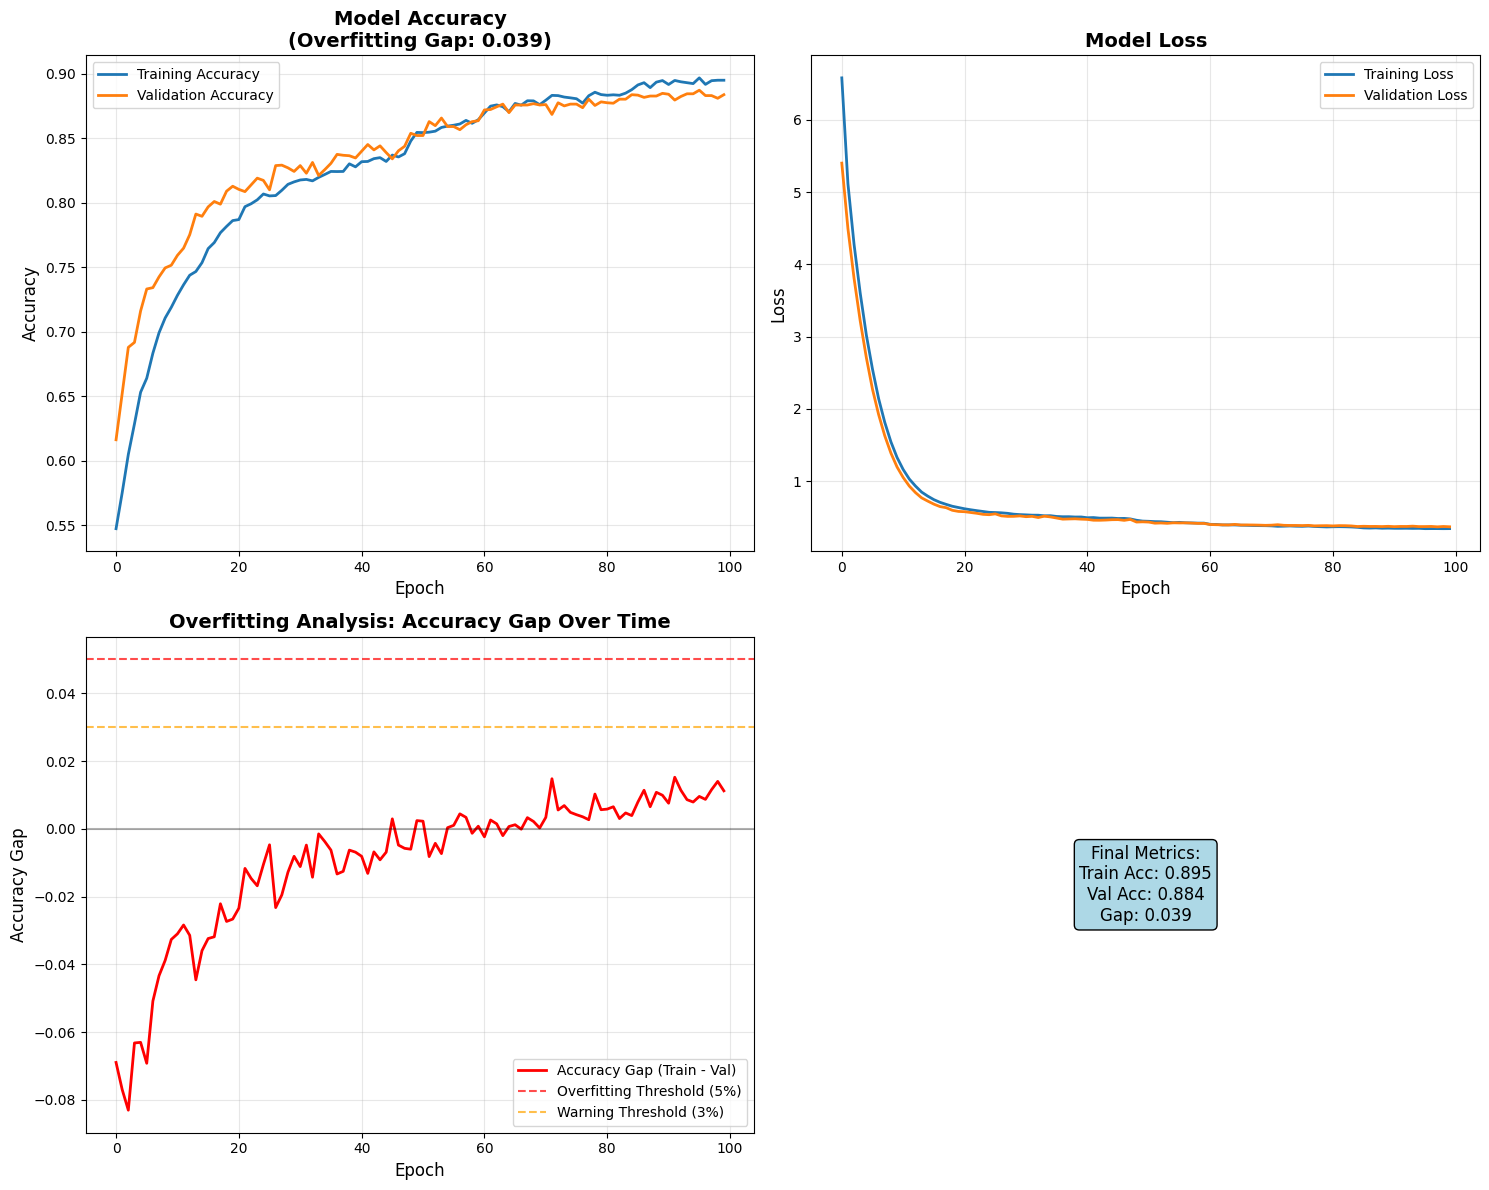


Saving improved models to /content/drive/MyDrive/safety_Dataset/saved_models_improved...
✓ Improved Keras model saved as '/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5'
Saved artifact at '/tmp/tmpbr73obbn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 13, 2, 1), dtype=tf.float32, name='keras_tensor_42')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  138899621155216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138899621156176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138899621156560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138899621157520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138899621157328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138899621156752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138899621157136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13889

In [ ]:
# model_training_improved.py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                   Dropout, Dense, Flatten, GlobalAveragePooling2D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

def create_ultra_regularized_model(input_shape):
    """Create an ultra-regularized model optimized for MFCC features"""
    print(f"Creating model for input shape: {input_shape}")

    model = Sequential([
        # First Conv Block - Adjusted for MFCC dimensions
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        MaxPooling2D((2, 2), padding='same'),  # Use padding='same' to maintain dimensions

        # Second Conv Block - Use smaller pooling or no pooling
        Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        # No pooling here to prevent dimensions getting too small

        # Third Conv Block
        Conv2D(128, (3, 3), activation='relu', padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        # No pooling here

        # Global pooling instead of flattening to handle variable dimensions
        GlobalAveragePooling2D(),
        Dropout(0.7),

        # Dense layers
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Dropout(0.8),

        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(2, activation='softmax')
    ])
    return model

def create_optimized_mfcc_model(input_shape):
    """Optimized model specifically for MFCC features (13, 2, 1) shape"""
    print(f"Creating optimized MFCC model for input shape: {input_shape}")

    model = Sequential([
        # First conv block - careful with dimensions
        Conv2D(32, (2, 2), activation='relu', input_shape=input_shape, padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        MaxPooling2D((1, 2), padding='same'),  # Only pool the time dimension

        # Second conv block
        Conv2D(64, (2, 2), activation='relu', padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        # No pooling to maintain dimensions

        # Third conv block
        Conv2D(128, (2, 2), activation='relu', padding='same',
               kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),

        # Global pooling
        GlobalAveragePooling2D(),
        Dropout(0.6),

        # Dense layers
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        Dropout(0.4),

        Dense(2, activation='softmax')
    ])
    return model

def create_simple_dense_model(input_shape):
    """Simple dense model that works with any feature shape"""
    print(f"Creating simple dense model for input shape: {input_shape}")

    # Flatten the input
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=input_shape),

        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        Dropout(0.3),

        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
        Dropout(0.2),

        Dense(2, activation='softmax')
    ])
    return model

def load_features(features_path):
    """Load pre-extracted features - IMPROVED VERSION"""
    print("Loading pre-extracted features...")

    if not os.path.exists(features_path):
        raise FileNotFoundError(f"Features directory not found: {features_path}")

    # Check what files actually exist
    existing_files = os.listdir(features_path)
    print(f"Files found in features directory: {existing_files}")

    # Load the features from the actual files you have
    try:
        # Load from the pkl file that contains everything
        feature_data = joblib.load(os.path.join(features_path, 'extracted_features.pkl'))
        X = feature_data['X']
        y = feature_data['y']

        print(f"Loaded {len(y)} samples from extracted_features.pkl")
        print(f"Original features shape: {X.shape}")
        print(f"Labels shape: {y.shape}")

        # For CNN, we need to reshape the MFCC features properly
        # Your MFCC features are (12824, 26) - 13 MFCCs * 2 (mean + std)
        # Let's reshape to (12824, 13, 2, 1) for CNN
        n_samples = X.shape[0]

        # Reshape MFCC features to 2D format for CNN (13 MFCC coefficients x 2 frames x 1 channel)
        X_mel = X.reshape(n_samples, 13, 2, 1)

        # Use the same features for advanced features
        X_advanced = X

        # Create metadata
        metadata = {
            'label_distribution': f"Danger: {np.sum(y==0)}, Safe: {np.sum(y==1)}",
            'feature_shapes': {
                'X_mel': X_mel.shape,
                'X_advanced': X_advanced.shape
            },
            'original_shape': X.shape
        }

        print(f"Reshaped Mel features for CNN: {X_mel.shape}")
        print(f"Advanced features shape: {X_advanced.shape}")
        print(f"Label distribution: {metadata['label_distribution']}")

        return X_mel, X_advanced, y, metadata

    except Exception as e:
        print(f"Error loading features: {e}")
        # Fallback: try loading from numpy files
        try:
            X = np.load(os.path.join(features_path, 'X_features.npy'))
            y = np.load(os.path.join(features_path, 'y_labels.npy'))

            print(f"Loaded {len(y)} samples from numpy files")
            print(f"Features shape: {X.shape}")
            print(f"Labels shape: {y.shape}")

            # Reshape for CNN
            n_samples = X.shape[0]
            X_mel = X.reshape(n_samples, 13, 2, 1)
            X_advanced = X

            metadata = {
                'label_distribution': f"Danger: {np.sum(y==0)}, Safe: {np.sum(y==1)}",
                'feature_shapes': {
                    'X_mel': X_mel.shape,
                    'X_advanced': X_advanced.shape
                },
                'original_shape': X.shape
            }

            return X_mel, X_advanced, y, metadata

        except Exception as e2:
            raise FileNotFoundError(f"Could not load features from any format: {e2}")

def prepare_data_with_augmentation(X_mel, X_advanced, y, augmentation_factor=0.2):
    """Prepare data with simple feature augmentation"""
    print("\nPreparing data for training...")

    # Check and reshape Mel spectrograms for CNN
    print(f"Original Mel shape: {X_mel.shape}")

    if len(X_mel.shape) == 3:
        X_mel = X_mel.reshape(X_mel.shape[0], X_mel.shape[1], X_mel.shape[2], 1)
    elif len(X_mel.shape) == 4:
        if X_mel.shape[3] != 1:
            X_mel = X_mel.reshape(X_mel.shape[0], X_mel.shape[1], X_mel.shape[2], 1)

    print(f"Final Mel shape for CNN: {X_mel.shape}")

    # Apply simple feature augmentation
    print("Applying feature augmentation...")
    X_mel_augmented = []
    X_advanced_augmented = []
    y_augmented = []

    for i in range(len(X_mel)):
        # Original sample
        X_mel_augmented.append(X_mel[i])
        X_advanced_augmented.append(X_advanced[i])
        y_augmented.append(y[i])

        # Augmented samples for a fraction of data
        if np.random.random() < augmentation_factor:
            # Add noise
            noise = np.random.normal(0, 0.01, X_mel[i].shape)  # Reduced noise
            X_mel_augmented.append(X_mel[i] + noise)
            X_advanced_augmented.append(X_advanced[i] + np.random.normal(0, 0.005, X_advanced[i].shape))
            y_augmented.append(y[i])

        if np.random.random() < augmentation_factor:
            # Random scaling
            scale = np.random.uniform(0.98, 1.02)  # Reduced scaling range
            X_mel_augmented.append(X_mel[i] * scale)
            X_advanced_augmented.append(X_advanced[i] * scale)
            y_augmented.append(y[i])

    X_mel = np.array(X_mel_augmented)
    X_advanced = np.array(X_advanced_augmented)
    y = np.array(y_augmented)

    print(f"After augmentation - Mel: {X_mel.shape}, Advanced: {X_advanced.shape}, Labels: {y.shape}")

    # Split data (80% train, 20% test)
    X_mel_train, X_mel_test, X_adv_train, X_adv_test, y_train, y_test = train_test_split(
        X_mel, X_advanced, y, test_size=0.2, random_state=42, stratify=y
    )

    # Further split train into train/validation
    X_mel_train, X_mel_val, X_adv_train, X_adv_val, y_train, y_val = train_test_split(
        X_mel_train, X_adv_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    # Scale advanced features
    print("Scaling advanced features...")
    scaler = StandardScaler()
    X_adv_train_scaled = scaler.fit_transform(X_adv_train)
    X_adv_val_scaled = scaler.transform(X_adv_val)
    X_adv_test_scaled = scaler.transform(X_adv_test)

    # Convert labels to categorical
    y_train_cat = to_categorical(y_train, 2)
    y_val_cat = to_categorical(y_val, 2)
    y_test_cat = to_categorical(y_test, 2)

    print(f"\n=== DATA SPLIT SUMMARY ===")
    print(f"Training set: {X_mel_train.shape[0]} samples")
    print(f"Validation set: {X_mel_val.shape[0]} samples")
    print(f"Test set: {X_mel_test.shape[0]} samples")
    print(f"Mel spectrogram input shape: {X_mel_train.shape[1:]}")
    print(f"Advanced features shape: {X_adv_train_scaled.shape[1:]}")

    # Print class distribution
    print(f"\nClass distribution - Train: {np.bincount(y_train)}")
    print(f"Class distribution - Val: {np.bincount(y_val)}")
    print(f"Class distribution - Test: {np.bincount(y_test)}")

    return (X_mel_train, X_mel_val, X_mel_test,
            X_adv_train_scaled, X_adv_val_scaled, X_adv_test_scaled,
            y_train_cat, y_val_cat, y_test_cat, scaler)

def train_model_with_strong_regularization(X_mel_train, X_mel_val, y_train_cat, y_val_cat, model_type='optimized_mfcc'):
    """Train model with strong regularization - FIXED VERSION"""
    print(f"\n=== MODEL TRAINING WITH STRONG REGULARIZATION ===")
    print(f"Using {model_type} model")
    print(f"Input shape: {X_mel_train.shape[1:]}")

    # Create model based on input shape
    input_shape = X_mel_train.shape[1:]

    if model_type == 'optimized_mfcc':
        model = create_optimized_mfcc_model(input_shape)
    elif model_type == 'simple_dense':
        model = create_simple_dense_model(input_shape)
    else:
        model = create_ultra_regularized_model(input_shape)

    # Compile with very low learning rate
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("Model Architecture:")
    model.summary()

    # Test the model with a single sample to verify it works
    print("Testing model with sample input...")
    try:
        sample_input = X_mel_train[:1]
        sample_output = model.predict(sample_input, verbose=0)
        print(f"✓ Model test successful! Output shape: {sample_output.shape}")
    except Exception as e:
        print(f"✗ Model test failed: {e}")
        # Fallback to simple dense model
        print("Falling back to simple dense model...")
        model = create_simple_dense_model(input_shape)
        model.compile(
            optimizer=Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    # Aggressive callbacks
    callbacks = [
        ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=6,
            min_lr=1e-7,
            verbose=1
        ),
        EarlyStopping(
            monitor='val_accuracy',
            patience=15,
            restore_best_weights=True,
            verbose=1,
            min_delta=0.001
        ),
        ModelCheckpoint(
            'best_improved_model.h5',
            monitor='val_accuracy',
            save_best_only=True,
            verbose=1
        )
    ]

    print("\nStarting model training with strong regularization...")

    # Train with small batch size
    history = model.fit(
        X_mel_train, y_train_cat,
        batch_size=16,  # Increased batch size for stability
        epochs=100,
        validation_data=(X_mel_val, y_val_cat),
        callbacks=callbacks,
        verbose=1,
        shuffle=True
    )

    return model, history

# [Keep all the other functions the same as before: evaluate_model_comprehensive, plot_enhanced_training_history, save_improved_models, analyze_detailed_results]

def evaluate_model_comprehensive(model, X_mel_test, y_test_cat, X_mel_train, y_train_cat):
    """Comprehensive model evaluation with overfitting analysis"""
    print("\n=== COMPREHENSIVE MODEL EVALUATION ===")

    # Load best model if available
    best_model_path = 'best_improved_model.h5'
    if os.path.exists(best_model_path):
        try:
            model.load_weights(best_model_path)
            print("✓ Loaded best model weights for evaluation.")
        except Exception as e:
            print(f"✗ Could not load best model weights: {e}")
            print("Using final model weights instead.")
    else:
        print("ℹ No best model found. Using final model weights.")

    # Evaluate on both train and test sets
    train_loss, train_accuracy = model.evaluate(X_mel_train, y_train_cat, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_mel_test, y_test_cat, verbose=0)

    print(f"\n=== EVALUATION RESULTS ===")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Overfitting analysis
    accuracy_gap = train_accuracy - test_accuracy
    loss_gap = test_loss - train_loss

    print(f"\n=== OVERFITTING ANALYSIS ===")
    print(f"Accuracy Gap (Train - Test): {accuracy_gap:.4f}")
    print(f"Loss Gap (Test - Train): {loss_gap:.4f}")

    if accuracy_gap > 0.05:
        print("🚨 SIGNIFICANT OVERFITTING DETECTED!")
        status = "OVERFITTING"
    elif accuracy_gap > 0.03:
        print("⚠️  Moderate overfitting detected")
        status = "MODERATE_OVERFITTING"
    elif accuracy_gap > 0.01:
        print("ℹ️  Slight overfitting detected")
        status = "SLIGHT_OVERFITTING"
    else:
        print("✅ EXCELLENT! Minimal overfitting")
        status = "MINIMAL_OVERFITTING"

    # Predictions
    y_pred = model.predict(X_mel_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_cat, axis=1)

    # Classification report
    print("\n=== CLASSIFICATION REPORT ===")
    print(classification_report(y_true_classes, y_pred_classes,
                              target_names=['Danger (0)', 'Safe (1)']))

    # Confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    print("\n=== CONFUSION MATRIX ===")
    print(cm)

    # Calculate additional metrics
    accuracy = accuracy_score(y_true_classes, y_pred_classes)
    print(f"\nOverall Test Accuracy: {accuracy:.4f}")

    return y_pred, y_pred_classes, y_true_classes, status, accuracy_gap

def plot_enhanced_training_history(history, accuracy_gap):
    """Plot enhanced training history with overfitting analysis"""
    print("\nGenerating enhanced training history plots...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Accuracy plot
    plt.sca(axes[0, 0])
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title(f'Model Accuracy\n(Overfitting Gap: {accuracy_gap:.3f})', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Loss plot
    plt.sca(axes[0, 1])
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title('Model Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Accuracy gap plot
    plt.sca(axes[1, 0])
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    accuracy_gaps = [train_acc[i] - val_acc[i] for i in range(len(train_acc))]
    plt.plot(accuracy_gaps, label='Accuracy Gap (Train - Val)', linewidth=2, color='red')
    plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Overfitting Threshold (5%)')
    plt.axhline(y=0.03, color='orange', linestyle='--', alpha=0.7, label='Warning Threshold (3%)')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Overfitting Analysis: Accuracy Gap Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy Gap', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Learning rate plot
    plt.sca(axes[1, 1])
    if 'lr' in history.history:
        plt.plot(history.history['lr'], label='Learning Rate', linewidth=2, color='green')
        plt.title('Learning Rate Schedule', fontsize=14, fontweight='bold')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel('Learning Rate', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.yscale('log')
    else:
        # Show final metrics
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        metrics_text = f"Final Metrics:\nTrain Acc: {final_train_acc:.3f}\nVal Acc: {final_val_acc:.3f}\nGap: {accuracy_gap:.3f}"
        plt.text(0.5, 0.5, metrics_text, ha='center', va='center', transform=axes[1, 1].transAxes,
                fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('enhanced_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

def save_improved_models(model, scaler, model_dir='saved_models_improved'):
    """Save improved models"""
    print(f"\nSaving improved models to {model_dir}...")
    os.makedirs(model_dir, exist_ok=True)

    try:
        # Save the main model
        model_path = os.path.join(model_dir, 'audio_danger_detection_improved.h5')
        model.save(model_path)
        print(f"✓ Improved Keras model saved as '{model_path}'")
    except Exception as e:
        print(f"✗ Error saving improved Keras model: {e}")

    try:
        # Save TensorFlow Lite model
        converter = tf.lite.TFLiteConverter.from_keras_model(model)
        tflite_model = converter.convert()
        tflite_path = os.path.join(model_dir, 'audio_danger_detection_improved.tflite')
        with open(tflite_path, 'wb') as f:
            f.write(tflite_model)
        print(f"✓ Improved TensorFlow Lite model saved as '{tflite_path}'")
    except Exception as e:
        print(f"✗ Error saving improved TensorFlow Lite model: {e}")

    try:
        # Save scaler
        scaler_path = os.path.join(model_dir, 'feature_scaler_improved.pkl')
        joblib.dump(scaler, scaler_path)
        print(f"✓ Improved feature scaler saved as '{scaler_path}'")
    except Exception as e:
        print(f"✗ Error saving improved scaler: {e}")

def analyze_detailed_results(y_true, y_pred, y_pred_proba, accuracy_gap):
    """Detailed results analysis"""
    print("\n=== DETAILED RESULTS ANALYSIS ===")

    # Class distribution
    unique, counts = np.unique(y_true, return_counts=True)
    print("Class Distribution in Test Set:")
    for label, count in zip(unique, counts):
        class_name = "Danger" if label == 0 else "Safe"
        percentage = (count / len(y_true)) * 100
        print(f"  {class_name} ({label}): {count} samples ({percentage:.1f}%)")

    # Class-wise accuracy
    print("\nClass-wise Accuracy:")
    for label in unique:
        class_name = "Danger" if label == 0 else "Safe"
        mask = y_true == label
        if np.sum(mask) > 0:
            class_accuracy = accuracy_score(y_true[mask], y_pred[mask])
            print(f"  {class_name}: {class_accuracy:.4f}")

    # Confidence analysis
    print("\nPrediction Confidence Analysis:")
    confidences = np.max(y_pred_proba, axis=1)
    print(f"  Average confidence: {np.mean(confidences):.4f}")
    print(f"  Confidence std: {np.std(confidences):.4f}")
    print(f"  Min confidence: {np.min(confidences):.4f}")
    print(f"  Max confidence: {np.max(confidences):.4f}")

    # Overfitting summary
    print(f"\n=== OVERFITTING SUMMARY ===")
    print(f"Accuracy Gap: {accuracy_gap:.4f}")
    if accuracy_gap > 0.05:
        print("Status: ❌ Significant overfitting - needs more regularization")
    elif accuracy_gap > 0.03:
        print("Status: ⚠️ Moderate overfitting - acceptable but could be better")
    elif accuracy_gap > 0.01:
        print("Status: ℹ️ Slight overfitting - good performance")
    else:
        print("Status: ✅ Excellent - minimal overfitting")

def main():
    # CORRECTED PATH - Use the features directory that actually exists
    FEATURES_PATH = r"/content/drive/MyDrive/safety_Dataset/features"
    MODEL_DIR = r"/content/drive/MyDrive/safety_Dataset/saved_models_improved"

    print("=== AUDIO DANGER DETECTION - IMPROVED TRAINING ===")
    print("=== WITH DIMENSION-OPTIMIZED ARCHITECTURE ===")
    print(f"Features path: {FEATURES_PATH}")
    print(f"Model directory: {MODEL_DIR}")

    try:
        # Load pre-extracted features
        X_mel, X_advanced, y, metadata = load_features(FEATURES_PATH)

        # Prepare data with augmentation
        (X_mel_train, X_mel_val, X_mel_test,
         X_adv_train_scaled, X_adv_val_scaled, X_adv_test_scaled,
         y_train_cat, y_val_cat, y_test_cat, scaler) = prepare_data_with_augmentation(X_mel, X_advanced, y)

        # Train model with strong regularization - use optimized MFCC model
        model, history = train_model_with_strong_regularization(
            X_mel_train, X_mel_val, y_train_cat, y_val_cat, model_type='optimized_mfcc'
        )

        # Evaluate model comprehensively
        y_pred, y_pred_classes, y_true_classes, overfitting_status, accuracy_gap = evaluate_model_comprehensive(
            model, X_mel_test, y_test_cat, X_mel_train, y_train_cat
        )

        # Analyze results
        analyze_detailed_results(y_true_classes, y_pred_classes, y_pred, accuracy_gap)

        # Plot enhanced training history
        plot_enhanced_training_history(history, accuracy_gap)

        # Save improved models
        save_improved_models(model, scaler, MODEL_DIR)

        # Sample predictions
        print("\n=== SAMPLE PREDICTIONS ===")
        n_samples = min(10, len(X_mel_test))
        sample_indices = np.random.choice(len(X_mel_test), n_samples, replace=False)

        correct_predictions = 0
        for i, idx in enumerate(sample_indices):
            actual_label = "Danger" if y_true_classes[idx] == 0 else "Safe"
            pred_label = "Danger" if y_pred_classes[idx] == 0 else "Safe"
            confidence = np.max(y_pred[idx])
            correct = "✓" if y_true_classes[idx] == y_pred_classes[idx] else "✗"
            if correct == "✓":
                correct_predictions += 1
            print(f"{correct} Sample {i+1}: Actual={actual_label}, Predicted={pred_label}, Confidence={confidence:.4f}")

        sample_accuracy = correct_predictions / n_samples
        print(f"\nSample Prediction Accuracy: {sample_accuracy:.2f} ({correct_predictions}/{n_samples} correct)")

        print("\n" + "="*60)
        print("🎉 IMPROVED TRAINING COMPLETED!")
        print("="*60)
        print(f"📁 Models saved in: {MODEL_DIR}")
        print(f"📊 Training history: enhanced_training_history.png")
        print(f"✅ Final test accuracy: {accuracy_score(y_true_classes, y_pred_classes):.4f}")
        print(f"📈 Overfitting status: {overfitting_status}")
        print(f"🔍 Accuracy gap: {accuracy_gap:.4f}")

    except Exception as e:
        print(f"\n❌ ERROR during improved model training: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

🚀 STARTING MODEL EVALUATION AND VISUALIZATION
Model path: /content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5
Features path: /content/drive/MyDrive/safety_Dataset/features
📁 Loading trained model and data...


✅ Model loaded from: /content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5
✅ Features loaded from extracted_features.pkl
   Original features shape: (12824, 26)
   Labels shape: (12824,)
📊 Test set: 2565 samples
📊 Training set: 10259 samples
🎯 Generating predictions...
✅ Predictions generated
📊 Generating Comprehensive Metrics and Graphs...


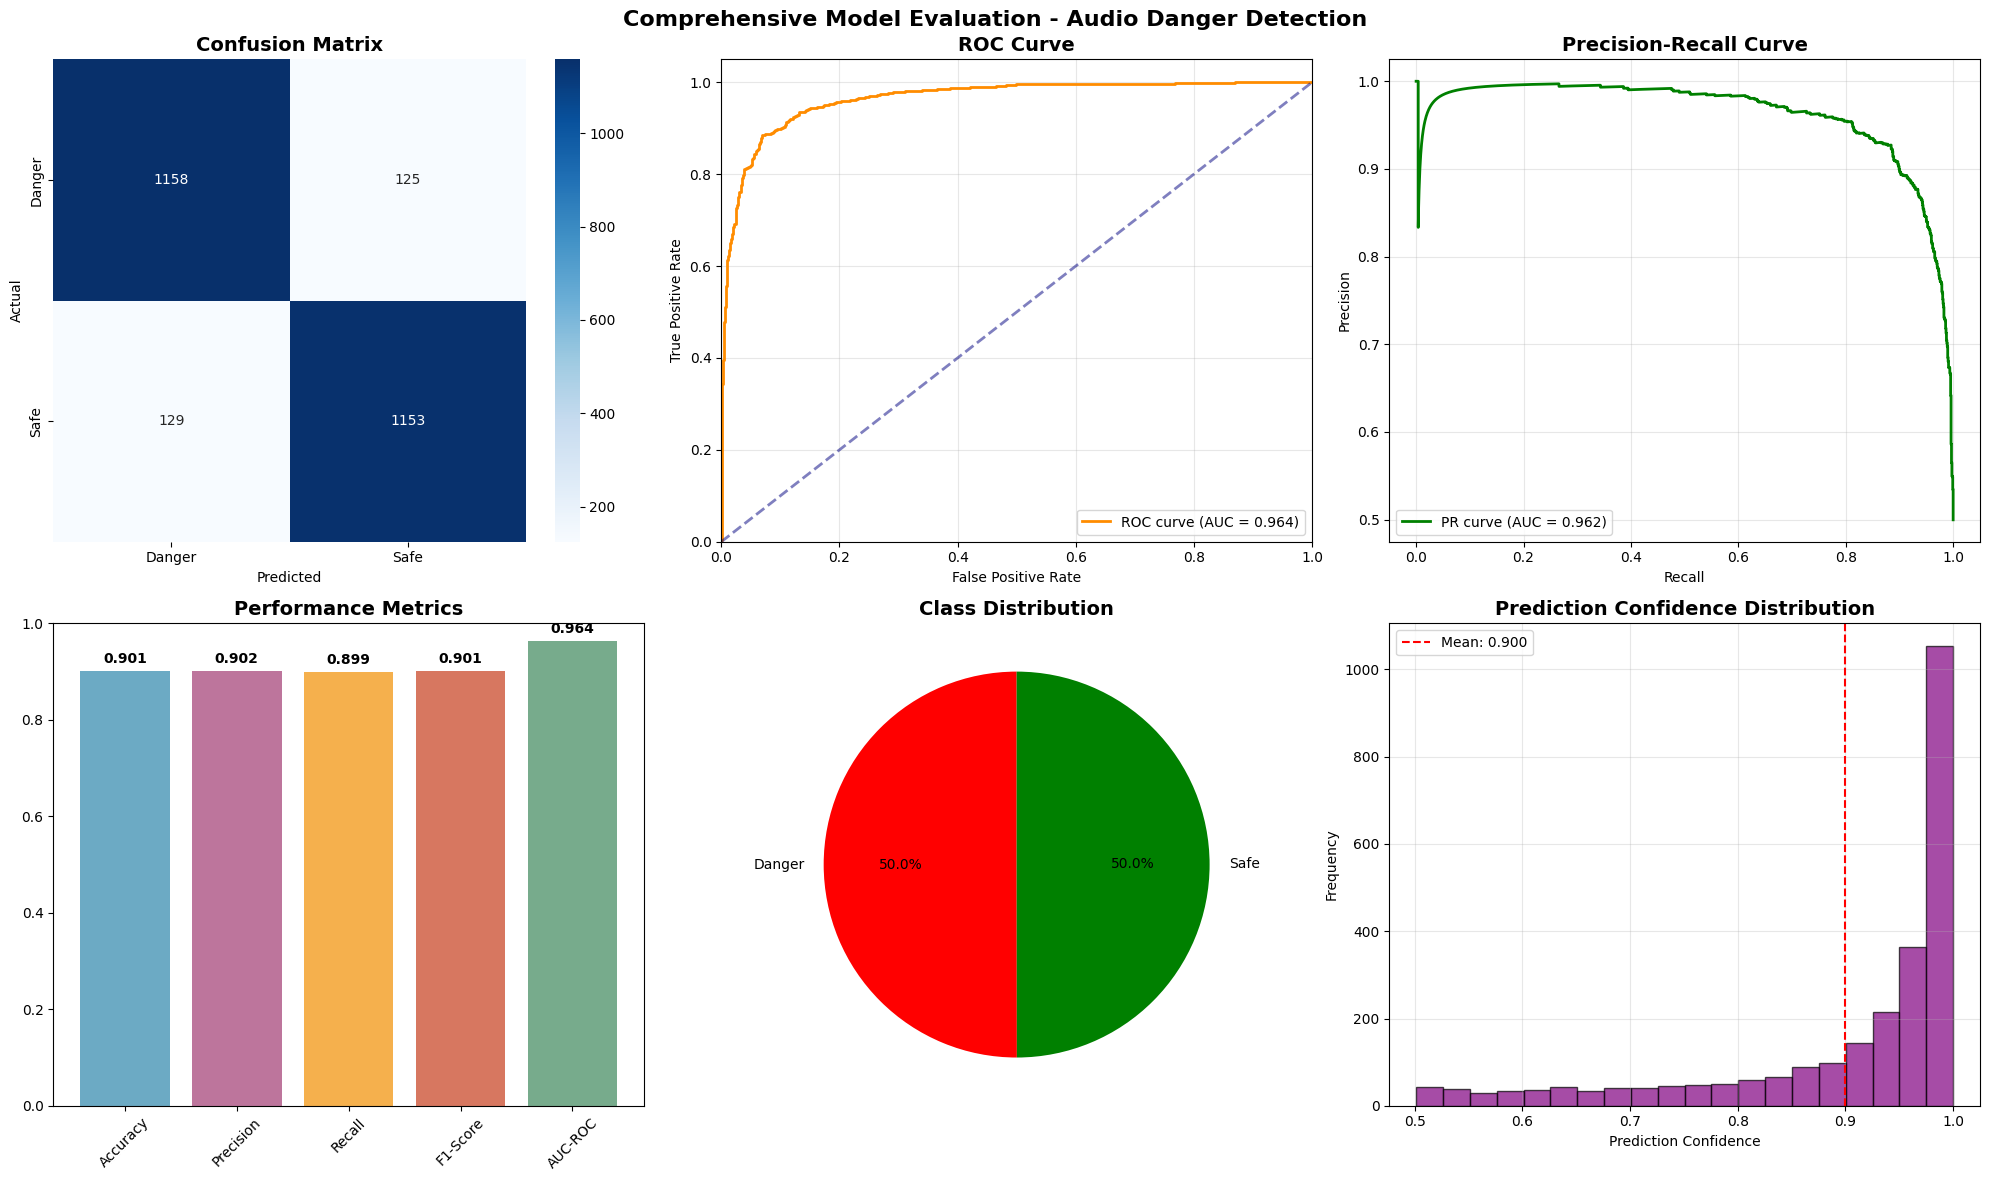


📈 COMPREHENSIVE PERFORMANCE METRICS
Accuracy:    0.9010
Precision:   0.9022
Recall:      0.8994
F1-Score:    0.9008
AUC-ROC:     0.9641
PR-AUC:      0.9622

📊 Classification Report:
              precision    recall  f1-score   support

      Danger       0.90      0.90      0.90      1283
        Safe       0.90      0.90      0.90      1282

    accuracy                           0.90      2565
   macro avg       0.90      0.90      0.90      2565
weighted avg       0.90      0.90      0.90      2565

🔍 Generating Detailed Analysis...


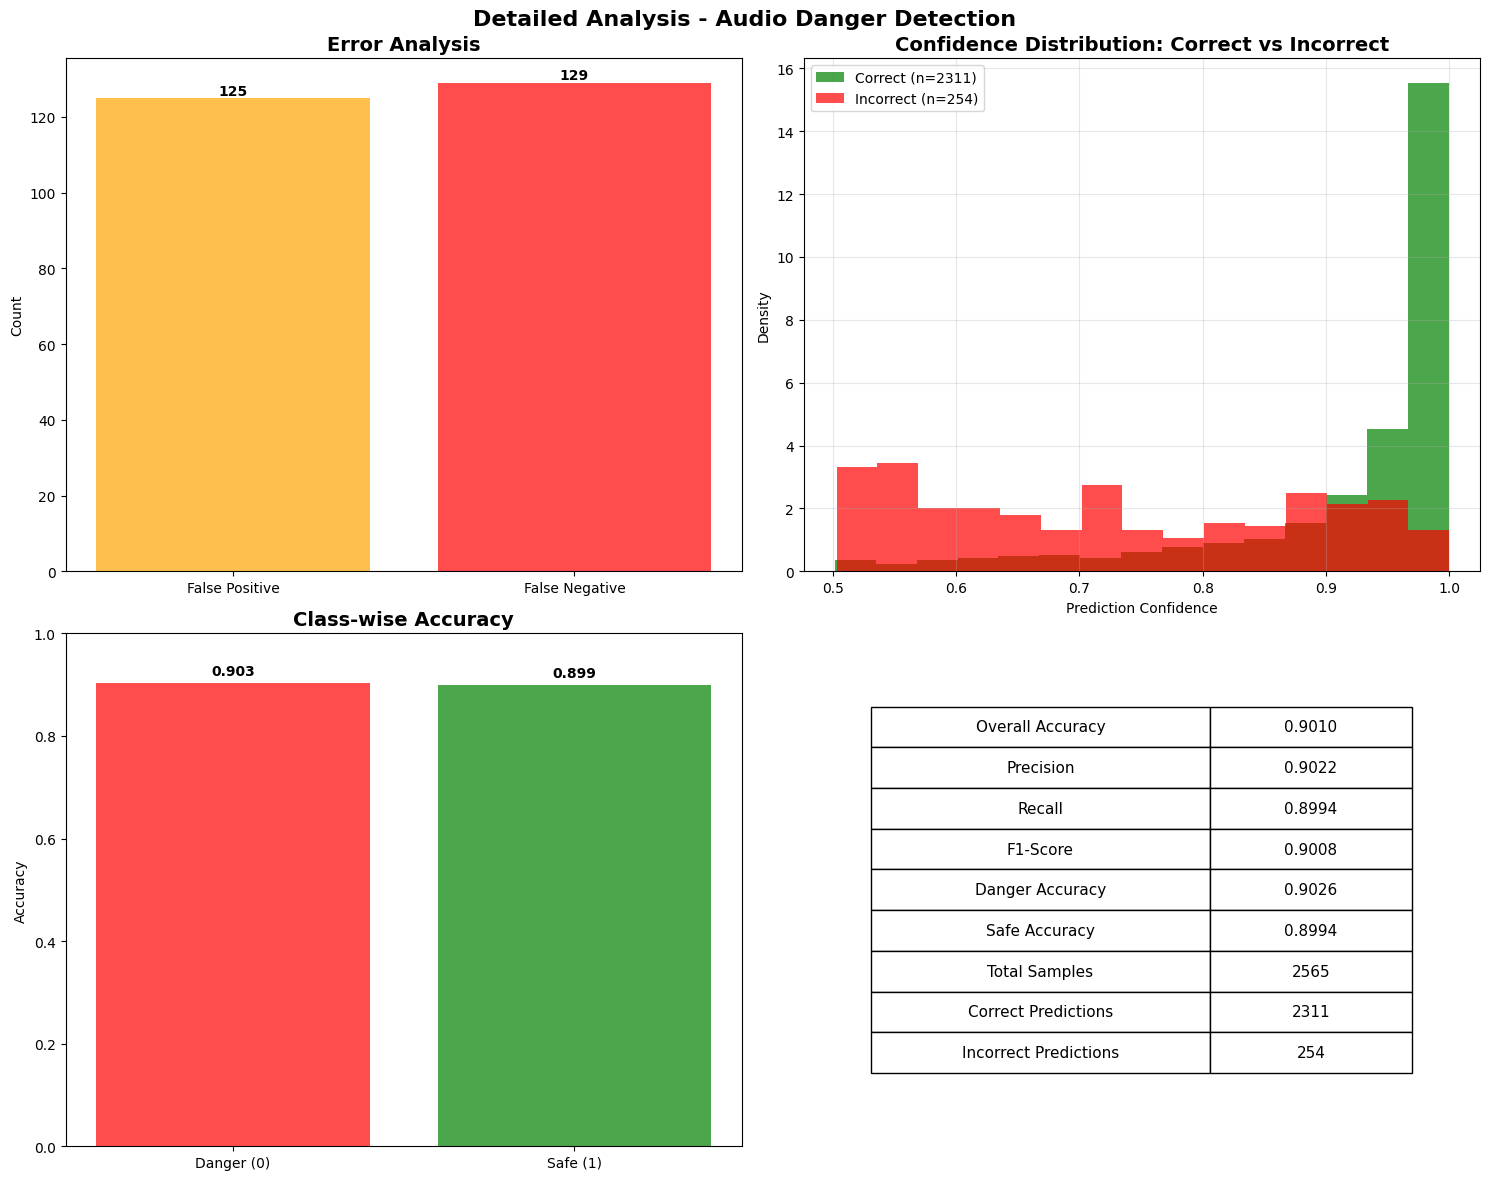


🔍 Analyzing Misclassifications by Category...
⚠️ Could not load category data: Length of values (2565) does not match length of index (2564)

🎉 EVALUATION COMPLETED SUCCESSFULLY!
📊 Generated Graphs:
  - comprehensive_metrics_Audio_Danger_Detection.png
  - detailed_analysis_Audio_Danger_Detection.png
✅ Final Test Accuracy: 0.9010
✅ F1-Score: 0.9008
✅ Precision: 0.9022
✅ Recall: 0.8994


In [ ]:
# load_and_visualize.py
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           f1_score, precision_score, recall_score, roc_auc_score,
                           roc_curve, precision_recall_curve, auc)
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib

def load_trained_model_and_data(model_path, features_path):
    """Load trained model and test data - CORRECTED VERSION"""
    print("📁 Loading trained model and data...")

    # Load model
    model = load_model(model_path)
    print(f"✅ Model loaded from: {model_path}")

    # Load features from the correct location
    try:
        # Load from the pkl file that contains everything
        feature_data = joblib.load(os.path.join(features_path, 'extracted_features.pkl'))
        X = feature_data['X']
        y = feature_data['y']
        print(f"✅ Features loaded from extracted_features.pkl")
        print(f"   Original features shape: {X.shape}")
        print(f"   Labels shape: {y.shape}")

        # Reshape for CNN (same as during training)
        X_mel = X.reshape(X.shape[0], 13, 2, 1)

    except Exception as e:
        print(f"❌ Error loading from pkl: {e}")
        # Fallback to numpy files
        try:
            X = np.load(os.path.join(features_path, 'X_features.npy'))
            y = np.load(os.path.join(features_path, 'y_labels.npy'))
            print(f"✅ Features loaded from numpy files")
            print(f"   Features shape: {X.shape}")
            print(f"   Labels shape: {y.shape}")

            # Reshape for CNN
            X_mel = X.reshape(X.shape[0], 13, 2, 1)

        except Exception as e2:
            raise FileNotFoundError(f"Could not load features: {e2}")

    # Prepare test data (same preprocessing as training)
    if len(X_mel.shape) == 3:
        X_mel = X_mel.reshape(X_mel.shape[0], X_mel.shape[1], X_mel.shape[2], 1)

    # Split data for testing (use 20% as test set, same as training)
    X_mel_train, X_mel_test, y_train, y_test = train_test_split(
        X_mel, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"📊 Test set: {X_mel_test.shape[0]} samples")
    print(f"📊 Training set: {X_mel_train.shape[0]} samples")

    return model, X_mel_test, y_test

def generate_predictions(model, X_test):
    """Generate predictions and probabilities"""
    print("🎯 Generating predictions...")

    y_pred_proba = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)

    print("✅ Predictions generated")
    return y_pred, y_pred_proba

def plot_comprehensive_metrics(y_true, y_pred, y_pred_proba, model_name=""):
    """Create comprehensive metrics and graphs"""
    print("📊 Generating Comprehensive Metrics and Graphs...")

    # Calculate all metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_proba[:, 1])
    pr_auc = auc(recall_vals, precision_vals)

    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle(f'Comprehensive Model Evaluation - {model_name}', fontsize=16, fontweight='bold')

    # 1. Confusion Matrix
    plt.subplot(2, 3, 1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Danger', 'Safe'],
                yticklabels=['Danger', 'Safe'])
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # 2. ROC Curve
    plt.subplot(2, 3, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

    # 3. Precision-Recall Curve
    plt.subplot(2, 3, 3)
    plt.plot(recall_vals, precision_vals, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left")
    plt.grid(True, alpha=0.3)

    # 4. Metrics Bar Chart
    plt.subplot(2, 3, 4)
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    }

    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E885B']
    bars = plt.bar(range(len(metrics)), list(metrics.values()), color=colors, alpha=0.7)
    plt.xticks(range(len(metrics)), list(metrics.keys()), rotation=45)
    plt.title('Performance Metrics', fontsize=14, fontweight='bold')
    plt.ylim(0, 1)

    # Add value labels on bars
    for bar, value in zip(bars, metrics.values()):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # 5. Class Distribution
    plt.subplot(2, 3, 5)
    unique, counts = np.unique(y_true, return_counts=True)
    colors = ['red', 'green']
    labels = ['Danger', 'Safe']
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Class Distribution', fontsize=14, fontweight='bold')

    # 6. Prediction Confidence Distribution
    plt.subplot(2, 3, 6)
    confidences = np.max(y_pred_proba, axis=1)
    plt.hist(confidences, bins=20, alpha=0.7, color='purple', edgecolor='black')
    plt.axvline(x=np.mean(confidences), color='red', linestyle='--',
                label=f'Mean: {np.mean(confidences):.3f}')
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Frequency')
    plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'comprehensive_metrics_{model_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print detailed metrics
    print("\n" + "="*60)
    print("📈 COMPREHENSIVE PERFORMANCE METRICS")
    print("="*60)
    print(f"Accuracy:    {accuracy:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f}")
    print(f"F1-Score:    {f1:.4f}")
    print(f"AUC-ROC:     {roc_auc:.4f}")
    print(f"PR-AUC:      {pr_auc:.4f}")

    print("\n📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Danger', 'Safe']))

    return metrics

def plot_detailed_analysis(y_true, y_pred, y_pred_proba, model_name=""):
    """Create detailed analysis plots"""
    print("🔍 Generating Detailed Analysis...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Detailed Analysis - {model_name}', fontsize=16, fontweight='bold')

    # 1. Error Analysis
    plt.sca(axes[0, 0])
    errors = y_pred != y_true
    error_types = {
        'False Positive': np.sum((y_pred == 1) & (y_true == 0)),
        'False Negative': np.sum((y_pred == 0) & (y_true == 1))
    }

    if sum(error_types.values()) > 0:
        bars = plt.bar(error_types.keys(), error_types.values(),
                      color=['orange', 'red'], alpha=0.7)
        plt.title('Error Analysis', fontsize=14, fontweight='bold')
        plt.ylabel('Count')

        # Add value labels
        for bar, value in zip(bars, error_types.values()):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    str(value), ha='center', va='bottom', fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'No Errors!', ha='center', va='center',
                transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', color='green')
        plt.axis('off')

    # 2. Confidence by Class
    plt.sca(axes[0, 1])
    confidences = np.max(y_pred_proba, axis=1)
    correct_mask = y_pred == y_true

    correct_confidences = confidences[correct_mask]
    incorrect_confidences = confidences[~correct_mask]

    if len(correct_confidences) > 0:
        plt.hist(correct_confidences, bins=15, alpha=0.7, color='green',
                label=f'Correct (n={len(correct_confidences)})', density=True)
    if len(incorrect_confidences) > 0:
        plt.hist(incorrect_confidences, bins=15, alpha=0.7, color='red',
                label=f'Incorrect (n={len(incorrect_confidences)})', density=True)

    plt.xlabel('Prediction Confidence')
    plt.ylabel('Density')
    plt.title('Confidence Distribution: Correct vs Incorrect', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Class-wise Performance
    plt.sca(axes[1, 0])
    classes = ['Danger (0)', 'Safe (1)']
    class_accuracy = []

    for class_label in [0, 1]:
        mask = y_true == class_label
        if np.sum(mask) > 0:
            acc = accuracy_score(y_true[mask], y_pred[mask])
            class_accuracy.append(acc)
        else:
            class_accuracy.append(0)

    bars = plt.bar(classes, class_accuracy, color=['red', 'green'], alpha=0.7)
    plt.ylim(0, 1)
    plt.title('Class-wise Accuracy', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy')

    for bar, acc in zip(bars, class_accuracy):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

    # 4. Metrics Summary Table
    plt.sca(axes[1, 1])
    plt.axis('off')

    overall_accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metrics_data = [
        ['Overall Accuracy', f'{overall_accuracy:.4f}'],
        ['Precision', f'{precision:.4f}'],
        ['Recall', f'{recall:.4f}'],
        ['F1-Score', f'{f1:.4f}'],
        ['Danger Accuracy', f'{class_accuracy[0]:.4f}'],
        ['Safe Accuracy', f'{class_accuracy[1]:.4f}'],
        ['Total Samples', f'{len(y_true)}'],
        ['Correct Predictions', f'{np.sum(y_pred == y_true)}'],
        ['Incorrect Predictions', f'{np.sum(y_pred != y_true)}']
    ]

    table = plt.table(cellText=metrics_data,
                     loc='center',
                     cellLoc='center',
                     colWidths=[0.5, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)

    plt.tight_layout()
    plt.savefig(f'detailed_analysis_{model_name.replace(" ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_misclassifications_by_category(y_true, y_pred, features_path):
    """Analyze which categories are most misclassified"""
    print("\n🔍 Analyzing Misclassifications by Category...")

    try:
        # Load the original dataset to get category information
        df_original = pd.read_csv('/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/augmented_dataset_balanced.csv')

        # Get the test indices (last 20% of data)
        test_size = int(0.2 * len(df_original))
        test_indices = range(len(df_original) - test_size, len(df_original))
        test_df = df_original.iloc[test_indices].copy()

        # Add predictions
        test_df['predicted'] = y_pred
        test_df['correct'] = test_df['label'] == test_df['predicted']

        # Analyze misclassifications by category
        misclassified = test_df[~test_df['correct']]

        if len(misclassified) > 0:
            print(f"\n📊 Misclassification Analysis:")
            print(f"Total misclassified: {len(misclassified)}")

            # Most misclassified categories
            category_errors = misclassified.groupby('category').size().sort_values(ascending=False)
            print(f"\nTop 10 most misclassified categories:")
            for category, count in category_errors.head(10).items():
                print(f"  {category}: {count} errors")

            # Error types by category
            print(f"\nError types by category:")
            error_analysis = misclassified.groupby(['category', 'label', 'predicted']).size().reset_index(name='count')
            for _, row in error_analysis.head(15).iterrows():
                true_label = "Danger" if row['label'] == 0 else "Safe"
                pred_label = "Danger" if row['predicted'] == 0 else "Safe"
                print(f"  {row['category']}: {true_label} → {pred_label} ({row['count']} samples)")

        else:
            print("✅ No misclassifications found!")

    except Exception as e:
        print(f"⚠️ Could not load category data: {e}")

def main():
    # CORRECTED PATHS - Use the actual paths from your setup
    MODEL_PATH = r"/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    FEATURES_PATH = r"/content/drive/MyDrive/safety_Dataset/features"

    print("🚀 STARTING MODEL EVALUATION AND VISUALIZATION")
    print("="*50)
    print(f"Model path: {MODEL_PATH}")
    print(f"Features path: {FEATURES_PATH}")

    try:
        # Load model and data
        model, X_test, y_test = load_trained_model_and_data(MODEL_PATH, FEATURES_PATH)

        # Generate predictions
        y_pred, y_pred_proba = generate_predictions(model, X_test)

        # Generate comprehensive metrics and graphs
        metrics = plot_comprehensive_metrics(y_test, y_pred, y_pred_proba, "Audio Danger Detection")

        # Generate detailed analysis
        plot_detailed_analysis(y_test, y_pred, y_pred_proba, "Audio Danger Detection")

        # Analyze misclassifications by category
        analyze_misclassifications_by_category(y_test, y_pred, FEATURES_PATH)

        print("\n" + "="*50)
        print("🎉 EVALUATION COMPLETED SUCCESSFULLY!")
        print("="*50)
        print("📊 Generated Graphs:")
        print("  - comprehensive_metrics_Audio_Danger_Detection.png")
        print("  - detailed_analysis_Audio_Danger_Detection.png")
        print(f"✅ Final Test Accuracy: {metrics['Accuracy']:.4f}")
        print(f"✅ F1-Score: {metrics['F1-Score']:.4f}")
        print(f"✅ Precision: {metrics['Precision']:.4f}")
        print(f"✅ Recall: {metrics['Recall']:.4f}")

    except Exception as e:
        print(f"❌ ERROR during evaluation: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

🚀 AUDIO DANGER DETECTION SYSTEM
This system can classify audio as DANGER or SAFE
Supported formats: .wav, .mp3, .flac, etc.

🎯 Choose an option:
1. Test with a single audio file
2. Test with multiple audio files
3. Real-time demo (with dataset files)

Enter your choice (1-3): 1


🎧 SINGLE AUDIO FILE TEST
🔊 Initializing Audio Danger Detector...
✅ Audio Danger Detector initialized successfully!
   Model: audio_danger_detection_improved.h5
   Scaler: feature_scaler_improved.pkl

📁 Please upload an audio file (.wav, .mp3, etc.):


Saving rooster.wav to rooster.wav
✅ File uploaded: rooster.wav

🔍 Analyzing Audio Details: rooster.wav
📊 Audio Info:
   Duration: 2.43 seconds
   Sampling Rate: 22050 Hz
   Audio Shape: (53568,)
🎵 Playing audio...



🎯 Analyzing audio: rooster.wav

🎯 PREDICTION RESULTS
📊 Classification: SAFE 🟢
🎯 Confidence: 0.9717
📈 Probability Distribution:
   DANGER: 0.0283
   SAFE:   0.9717

💡 Interpretation:
   Confidence Level: VERY HIGH
   ✅ This sound appears to be SAFE
   Recommended Action: No immediate safety concerns


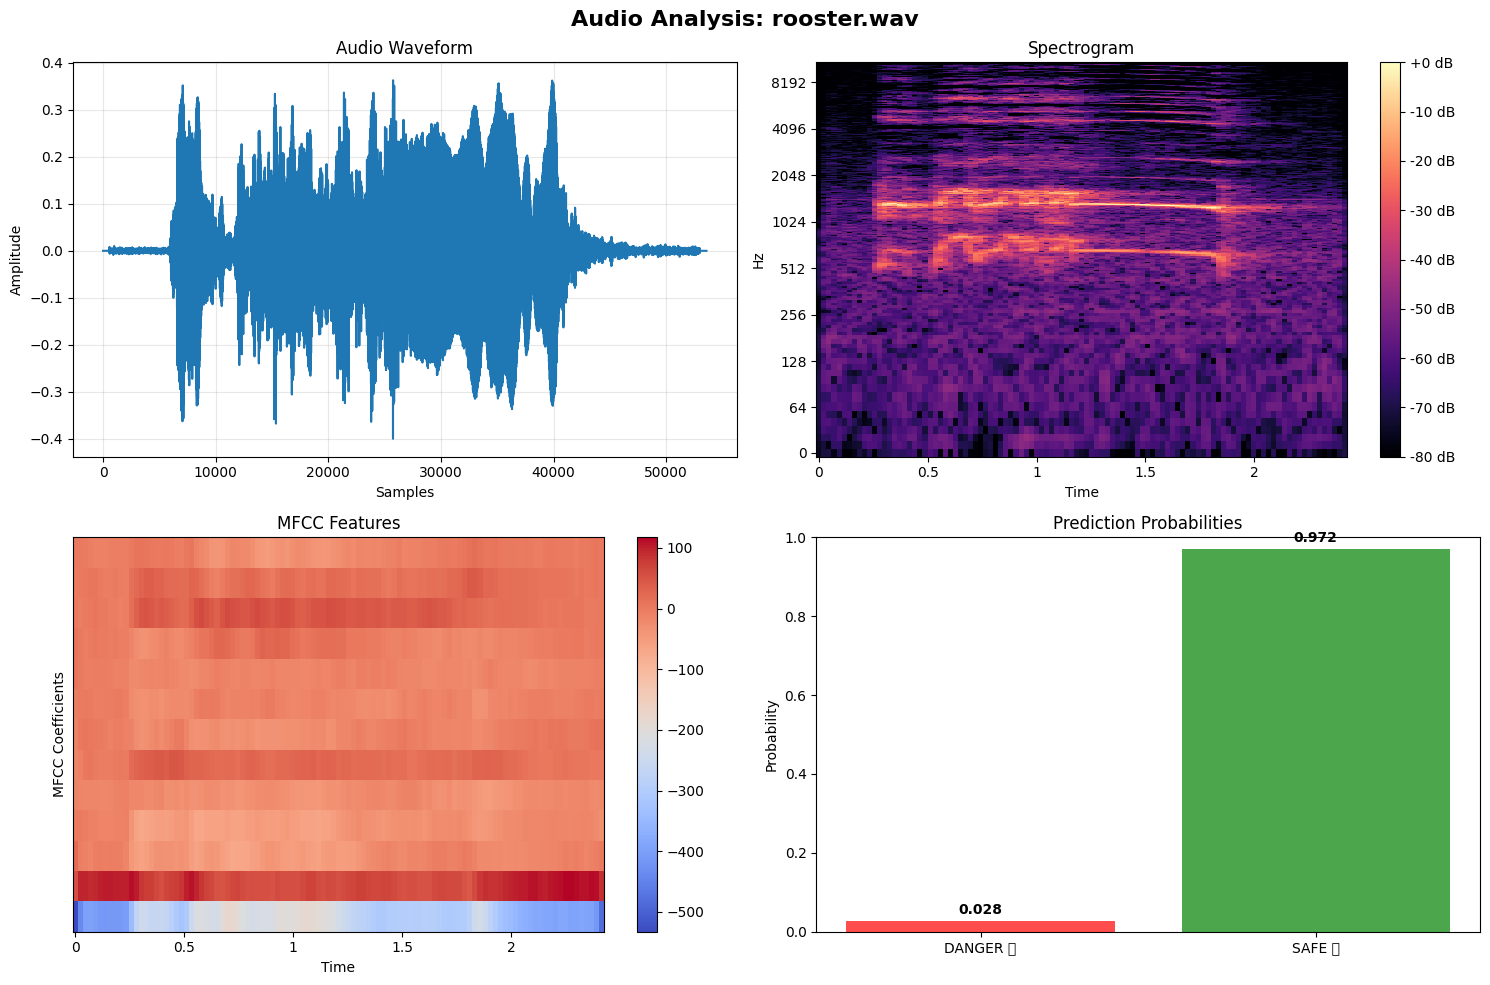

In [ ]:
# real_world_audio_test.py
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
from google.colab import files
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

class AudioDangerDetector:
    def __init__(self, model_path, scaler_path):
        """Initialize the audio danger detector"""
        print("🔊 Initializing Audio Danger Detector...")

        # Load model and scaler
        self.model = load_model(model_path)
        self.scaler = joblib.load(scaler_path)

        # Audio parameters (must match training parameters)
        self.target_sr = 22050  # Sampling rate
        self.duration = 4.0     # Duration in seconds
        self.n_mfcc = 13        # Number of MFCC coefficients

        print("✅ Audio Danger Detector initialized successfully!")
        print(f"   Model: {os.path.basename(model_path)}")
        print(f"   Scaler: {os.path.basename(scaler_path)}")

    def extract_features(self, audio_path):
        """Extract MFCC features from audio file (same as training)"""
        try:
            # Load audio file
            audio, sr = librosa.load(audio_path, sr=self.target_sr, duration=self.duration)

            # If audio is shorter than duration, pad it with zeros
            target_length = int(self.target_sr * self.duration)
            if len(audio) < target_length:
                audio = np.pad(audio, (0, target_length - len(audio)), mode='constant')
            else:
                audio = audio[:target_length]  # Trim if longer

            # Extract MFCC features (same as training)
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=self.n_mfcc)

            # Aggregate features by taking mean and std across time
            mfccs_mean = np.mean(mfccs, axis=1)
            mfccs_std = np.std(mfccs, axis=1)

            # Combine mean and std features
            features = np.hstack([mfccs_mean, mfccs_std])

            return features, True

        except Exception as e:
            print(f"❌ Error processing audio file: {e}")
            return None, False

    def preprocess_features(self, features):
        """Preprocess features for model prediction"""
        # Reshape for CNN input (13, 2, 1)
        features_reshaped = features.reshape(1, 13, 2, 1)
        return features_reshaped

    def predict(self, audio_path):
        """Make prediction on audio file"""
        print(f"\n🎯 Analyzing audio: {os.path.basename(audio_path)}")

        # Extract features
        features, success = self.extract_features(audio_path)
        if not success:
            return None

        # Preprocess features
        processed_features = self.preprocess_features(features)

        # Make prediction
        prediction_proba = self.model.predict(processed_features, verbose=0)
        prediction = np.argmax(prediction_proba, axis=1)[0]
        confidence = np.max(prediction_proba)

        # Get class label
        class_label = "SAFE 🟢" if prediction == 1 else "DANGER 🔴"

        return {
            'prediction': prediction,
            'class_label': class_label,
            'confidence': confidence,
            'probabilities': prediction_proba[0],
            'features': features
        }

    def analyze_audio_details(self, audio_path):
        """Analyze audio file and display detailed information"""
        print(f"\n🔍 Analyzing Audio Details: {os.path.basename(audio_path)}")

        # Load and display audio
        try:
            audio, sr = librosa.load(audio_path, sr=self.target_sr)
            print(f"📊 Audio Info:")
            print(f"   Duration: {len(audio)/sr:.2f} seconds")
            print(f"   Sampling Rate: {sr} Hz")
            print(f"   Audio Shape: {audio.shape}")

            # Play audio
            print("🎵 Playing audio...")
            ipd.display(ipd.Audio(audio_path))

        except Exception as e:
            print(f"❌ Error loading audio: {e}")
            return

    def plot_audio_analysis(self, audio_path, prediction_result):
        """Plot audio analysis and prediction results"""
        try:
            audio, sr = librosa.load(audio_path, sr=self.target_sr)

            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle(f'Audio Analysis: {os.path.basename(audio_path)}', fontsize=16, fontweight='bold')

            # 1. Waveform
            plt.sca(axes[0, 0])
            plt.plot(audio)
            plt.title('Audio Waveform')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.grid(True, alpha=0.3)

            # 2. Spectrogram
            plt.sca(axes[0, 1])
            D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
            librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Spectrogram')

            # 3. MFCC Features
            plt.sca(axes[1, 0])
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            librosa.display.specshow(mfccs, sr=sr, x_axis='time')
            plt.colorbar()
            plt.title('MFCC Features')
            plt.ylabel('MFCC Coefficients')

            # 4. Prediction Results
            plt.sca(axes[1, 1])
            classes = ['DANGER 🔴', 'SAFE 🟢']
            probabilities = prediction_result['probabilities']

            colors = ['red' if i == 0 else 'green' for i in range(len(classes))]
            bars = plt.bar(classes, probabilities, color=colors, alpha=0.7)

            plt.title('Prediction Probabilities')
            plt.ylabel('Probability')
            plt.ylim(0, 1)

            # Add value labels on bars
            for bar, prob in zip(bars, probabilities):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Error creating plots: {e}")

def test_single_audio():
    """Test with a single uploaded audio file"""
    print("🎧 SINGLE AUDIO FILE TEST")
    print("=" * 50)

    # Initialize detector
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)

    # Upload audio file
    print("\n📁 Please upload an audio file (.wav, .mp3, etc.):")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No file uploaded!")
        return

    audio_filename = list(uploaded.keys())[0]
    print(f"✅ File uploaded: {audio_filename}")

    # Analyze audio details
    detector.analyze_audio_details(audio_filename)

    # Make prediction
    result = detector.predict(audio_filename)

    if result is not None:
        # Display results
        print("\n" + "=" * 50)
        print("🎯 PREDICTION RESULTS")
        print("=" * 50)
        print(f"📊 Classification: {result['class_label']}")
        print(f"🎯 Confidence: {result['confidence']:.4f}")
        print(f"📈 Probability Distribution:")
        print(f"   DANGER: {result['probabilities'][0]:.4f}")
        print(f"   SAFE:   {result['probabilities'][1]:.4f}")

        # Interpretation
        if result['confidence'] > 0.9:
            confidence_level = "VERY HIGH"
        elif result['confidence'] > 0.7:
            confidence_level = "HIGH"
        elif result['confidence'] > 0.5:
            confidence_level = "MODERATE"
        else:
            confidence_level = "LOW"

        print(f"\n💡 Interpretation:")
        print(f"   Confidence Level: {confidence_level}")

        if result['prediction'] == 0:
            print("   ⚠️  This sound appears to be DANGEROUS")
            print("   Recommended Action: Take appropriate safety measures")
        else:
            print("   ✅ This sound appears to be SAFE")
            print("   Recommended Action: No immediate safety concerns")

        # Plot detailed analysis
        detector.plot_audio_analysis(audio_filename, result)

    else:
        print("❌ Failed to analyze the audio file")

def test_multiple_audio():
    """Test with multiple uploaded audio files"""
    print("🎧 MULTIPLE AUDIO FILES TEST")
    print("=" * 50)

    # Initialize detector
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)

    # Upload multiple audio files
    print("\n📁 Please upload multiple audio files (.wav, .mp3, etc.):")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No files uploaded!")
        return

    results = []

    for audio_filename in uploaded.keys():
        print(f"\n{'='*40}")
        print(f"🔊 Processing: {audio_filename}")
        print(f"{'='*40}")

        # Make prediction
        result = detector.predict(audio_filename)

        if result is not None:
            results.append({
                'filename': audio_filename,
                'prediction': result['prediction'],
                'class_label': result['class_label'],
                'confidence': result['confidence']
            })

            # Display quick result
            print(f"🎯 Result: {result['class_label']}")
            print(f"📊 Confidence: {result['confidence']:.4f}")

            # Play audio briefly
            try:
                print("🎵 Audio preview:")
                ipd.display(ipd.Audio(audio_filename, autoplay=False))
            except:
                print("🎵 (Audio preview not available)")

        else:
            print("❌ Failed to analyze this audio file")

    # Display summary
    print("\n" + "=" * 60)
    print("📊 BATCH PREDICTION SUMMARY")
    print("=" * 60)

    danger_count = sum(1 for r in results if r['prediction'] == 0)
    safe_count = sum(1 for r in results if r['prediction'] == 1)

    print(f"📁 Total Files Processed: {len(results)}")
    print(f"🔴 DANGER Sounds: {danger_count}")
    print(f"🟢 SAFE Sounds: {safe_count}")
    print(f"📈 Average Confidence: {np.mean([r['confidence'] for r in results]):.4f}")

    # Detailed results table
    print(f"\n📋 Detailed Results:")
    print(f"{'Filename':<30} {'Prediction':<15} {'Confidence':<10}")
    print(f"{'-'*55}")
    for result in results:
        print(f"{result['filename'][:28]:<30} {result['class_label']:<15} {result['confidence']:.4f}")

def real_time_demo():
    """Demo with example audio files from your dataset"""
    print("🎧 REAL-TIME DEMO WITH DATASET FILES")
    print("=" * 50)

    # Initialize detector
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)

    # You can test with files from your dataset
    print("\n💡 This demo shows how to test with files from your dataset.")
    print("   To test with your own files, use the single or multiple file test functions.")

    # Example of how to test with dataset files
    print("\n📝 Example usage with dataset files:")
    print("""
    # Test with a specific file from your dataset
    dataset_file_path = "/content/drive/MyDrive/safety_Dataset/fold1/example.wav"
    result = detector.predict(dataset_file_path)

    if result:
        print(f"Prediction: {result['class_label']}")
        print(f"Confidence: {result['confidence']:.4f}")
    """)

def main():
    """Main function to run the audio danger detection system"""
    print("🚀 AUDIO DANGER DETECTION SYSTEM")
    print("=" * 50)
    print("This system can classify audio as DANGER or SAFE")
    print("Supported formats: .wav, .mp3, .flac, etc.")
    print("\n🎯 Choose an option:")
    print("1. Test with a single audio file")
    print("2. Test with multiple audio files")
    print("3. Real-time demo (with dataset files)")

    try:
        choice = input("\nEnter your choice (1-3): ").strip()

        if choice == '1':
            test_single_audio()
        elif choice == '2':
            test_multiple_audio()
        elif choice == '3':
            real_time_demo()
        else:
            print("❌ Invalid choice! Please run again and select 1, 2, or 3.")

    except Exception as e:
        print(f"❌ Error: {e}")
        print("Please make sure all file paths are correct and try again.")

# Additional utility functions
def quick_test(audio_path):
    """Quick test function for programmatic use"""
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)
    result = detector.predict(audio_path)

    if result:
        return {
            'file': os.path.basename(audio_path),
            'prediction': result['class_label'],
            'confidence': result['confidence'],
            'danger_probability': result['probabilities'][0],
            'safe_probability': result['probabilities'][1]
        }
    return None

if __name__ == "__main__":
    main()

🚀 AUDIO DANGER DETECTION SYSTEM
This system can classify audio as DANGER or SAFE
Supported formats: .wav, .mp3, .flac, etc.

🎯 Choose an option:
1. Test with a single audio file
2. Test with multiple audio files
3. Real-time demo (with dataset files)

Enter your choice (1-3): 1


🎧 SINGLE AUDIO FILE TEST
🔊 Initializing Audio Danger Detector...
✅ Audio Danger Detector initialized successfully!
   Model: audio_danger_detection_improved.h5
   Scaler: feature_scaler_improved.pkl

📁 Please upload an audio file (.wav, .mp3, etc.):


Saving audio.wav to audio.wav
✅ File uploaded: audio.wav

🔍 Analyzing Audio Details: audio.wav
📊 Audio Info:
   Duration: 4.09 seconds
   Sampling Rate: 22050 Hz
   Audio Shape: (90168,)
🎵 Playing audio...



🎯 Analyzing audio: audio.wav

🎯 PREDICTION RESULTS
📊 Classification: DANGER 🔴
🎯 Confidence: 0.8667
📈 Probability Distribution:
   DANGER: 0.8667
   SAFE:   0.1333

💡 Interpretation:
   Confidence Level: HIGH
   ⚠️  This sound appears to be DANGEROUS
   Recommended Action: Take appropriate safety measures


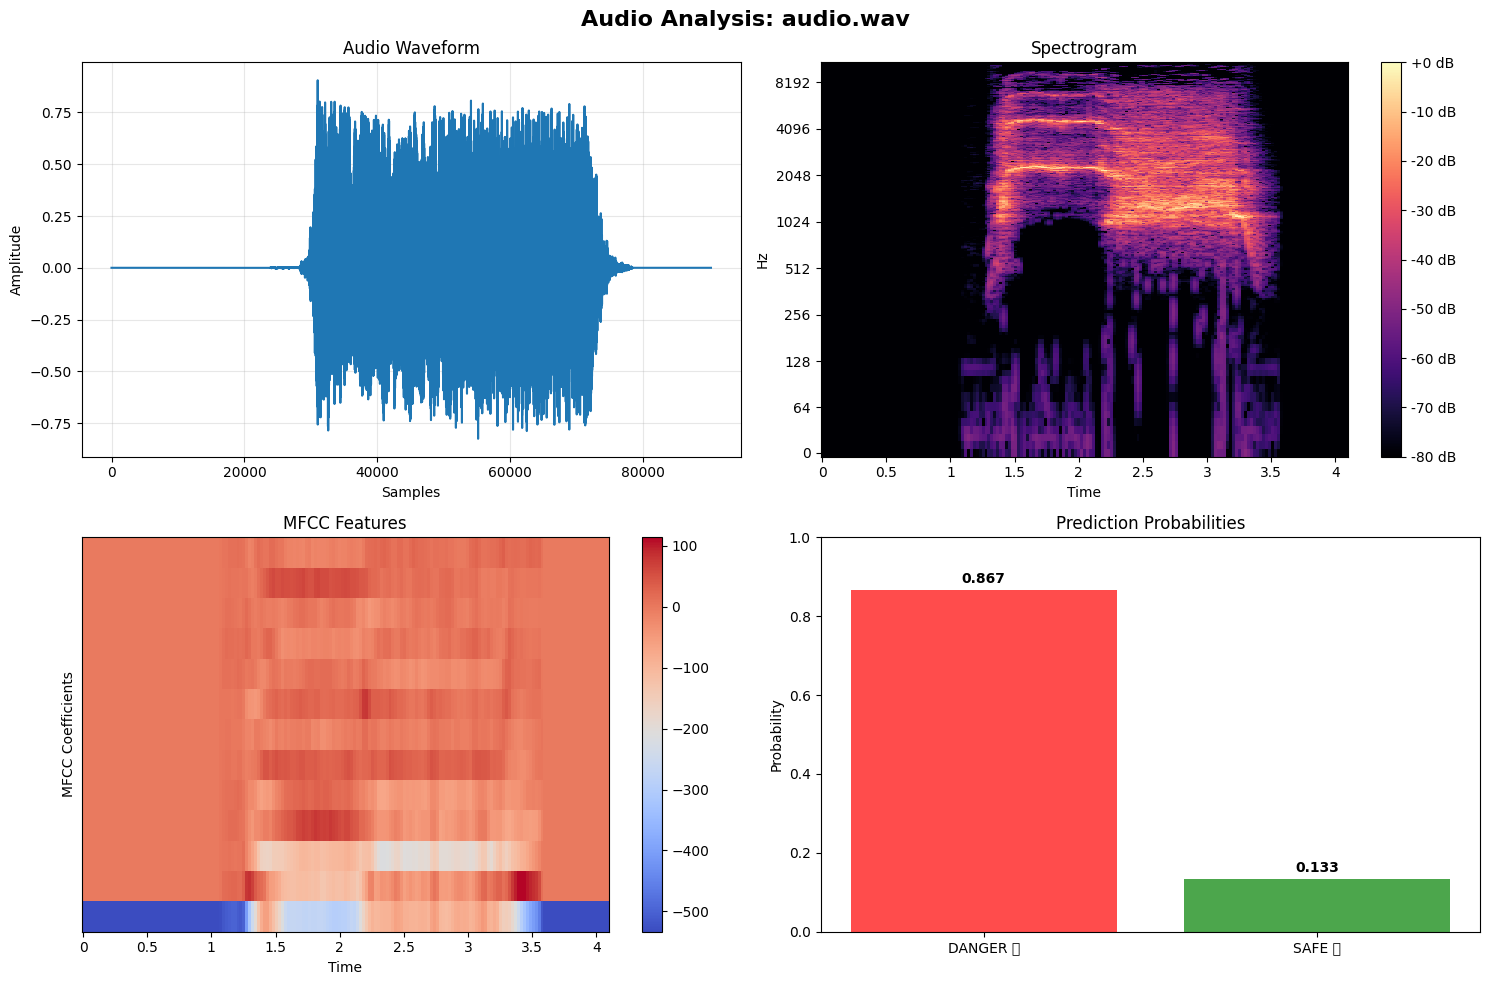

In [ ]:
# real_world_audio_test.py
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
from google.colab import files
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

class AudioDangerDetector:
    def __init__(self, model_path, scaler_path):
        """Initialize the audio danger detector"""
        print("🔊 Initializing Audio Danger Detector...")

        # Load model and scaler
        self.model = load_model(model_path)
        self.scaler = joblib.load(scaler_path)

        # Audio parameters (must match training parameters)
        self.target_sr = 22050  # Sampling rate
        self.duration = 4.0     # Duration in seconds
        self.n_mfcc = 13        # Number of MFCC coefficients

        print("✅ Audio Danger Detector initialized successfully!")
        print(f"   Model: {os.path.basename(model_path)}")
        print(f"   Scaler: {os.path.basename(scaler_path)}")

    def extract_features(self, audio_path):
        """Extract MFCC features from audio file (same as training)"""
        try:
            # Load audio file
            audio, sr = librosa.load(audio_path, sr=self.target_sr, duration=self.duration)

            # If audio is shorter than duration, pad it with zeros
            target_length = int(self.target_sr * self.duration)
            if len(audio) < target_length:
                audio = np.pad(audio, (0, target_length - len(audio)), mode='constant')
            else:
                audio = audio[:target_length]  # Trim if longer

            # Extract MFCC features (same as training)
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=self.n_mfcc)

            # Aggregate features by taking mean and std across time
            mfccs_mean = np.mean(mfccs, axis=1)
            mfccs_std = np.std(mfccs, axis=1)

            # Combine mean and std features
            features = np.hstack([mfccs_mean, mfccs_std])

            return features, True

        except Exception as e:
            print(f"❌ Error processing audio file: {e}")
            return None, False

    def preprocess_features(self, features):
        """Preprocess features for model prediction"""
        # Reshape for CNN input (13, 2, 1)
        features_reshaped = features.reshape(1, 13, 2, 1)
        return features_reshaped

    def predict(self, audio_path):
        """Make prediction on audio file"""
        print(f"\n🎯 Analyzing audio: {os.path.basename(audio_path)}")

        # Extract features
        features, success = self.extract_features(audio_path)
        if not success:
            return None

        # Preprocess features
        processed_features = self.preprocess_features(features)

        # Make prediction
        prediction_proba = self.model.predict(processed_features, verbose=0)
        prediction = np.argmax(prediction_proba, axis=1)[0]
        confidence = np.max(prediction_proba)

        # Get class label
        class_label = "SAFE 🟢" if prediction == 1 else "DANGER 🔴"

        return {
            'prediction': prediction,
            'class_label': class_label,
            'confidence': confidence,
            'probabilities': prediction_proba[0],
            'features': features
        }

    def analyze_audio_details(self, audio_path):
        """Analyze audio file and display detailed information"""
        print(f"\n🔍 Analyzing Audio Details: {os.path.basename(audio_path)}")

        # Load and display audio
        try:
            audio, sr = librosa.load(audio_path, sr=self.target_sr)
            print(f"📊 Audio Info:")
            print(f"   Duration: {len(audio)/sr:.2f} seconds")
            print(f"   Sampling Rate: {sr} Hz")
            print(f"   Audio Shape: {audio.shape}")

            # Play audio
            print("🎵 Playing audio...")
            ipd.display(ipd.Audio(audio_path))

        except Exception as e:
            print(f"❌ Error loading audio: {e}")
            return

    def plot_audio_analysis(self, audio_path, prediction_result):
        """Plot audio analysis and prediction results"""
        try:
            audio, sr = librosa.load(audio_path, sr=self.target_sr)

            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle(f'Audio Analysis: {os.path.basename(audio_path)}', fontsize=16, fontweight='bold')

            # 1. Waveform
            plt.sca(axes[0, 0])
            plt.plot(audio)
            plt.title('Audio Waveform')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.grid(True, alpha=0.3)

            # 2. Spectrogram
            plt.sca(axes[0, 1])
            D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
            librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
            plt.colorbar(format='%+2.0f dB')
            plt.title('Spectrogram')

            # 3. MFCC Features
            plt.sca(axes[1, 0])
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            librosa.display.specshow(mfccs, sr=sr, x_axis='time')
            plt.colorbar()
            plt.title('MFCC Features')
            plt.ylabel('MFCC Coefficients')

            # 4. Prediction Results
            plt.sca(axes[1, 1])
            classes = ['DANGER 🔴', 'SAFE 🟢']
            probabilities = prediction_result['probabilities']

            colors = ['red' if i == 0 else 'green' for i in range(len(classes))]
            bars = plt.bar(classes, probabilities, color=colors, alpha=0.7)

            plt.title('Prediction Probabilities')
            plt.ylabel('Probability')
            plt.ylim(0, 1)

            # Add value labels on bars
            for bar, prob in zip(bars, probabilities):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Error creating plots: {e}")

def test_single_audio():
    """Test with a single uploaded audio file"""
    print("🎧 SINGLE AUDIO FILE TEST")
    print("=" * 50)

    # Initialize detector
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)

    # Upload audio file
    print("\n📁 Please upload an audio file (.wav, .mp3, etc.):")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No file uploaded!")
        return

    audio_filename = list(uploaded.keys())[0]
    print(f"✅ File uploaded: {audio_filename}")

    # Analyze audio details
    detector.analyze_audio_details(audio_filename)

    # Make prediction
    result = detector.predict(audio_filename)

    if result is not None:
        # Display results
        print("\n" + "=" * 50)
        print("🎯 PREDICTION RESULTS")
        print("=" * 50)
        print(f"📊 Classification: {result['class_label']}")
        print(f"🎯 Confidence: {result['confidence']:.4f}")
        print(f"📈 Probability Distribution:")
        print(f"   DANGER: {result['probabilities'][0]:.4f}")
        print(f"   SAFE:   {result['probabilities'][1]:.4f}")

        # Interpretation
        if result['confidence'] > 0.9:
            confidence_level = "VERY HIGH"
        elif result['confidence'] > 0.7:
            confidence_level = "HIGH"
        elif result['confidence'] > 0.5:
            confidence_level = "MODERATE"
        else:
            confidence_level = "LOW"

        print(f"\n💡 Interpretation:")
        print(f"   Confidence Level: {confidence_level}")

        if result['prediction'] == 0:
            print("   ⚠️  This sound appears to be DANGEROUS")
            print("   Recommended Action: Take appropriate safety measures")
        else:
            print("   ✅ This sound appears to be SAFE")
            print("   Recommended Action: No immediate safety concerns")

        # Plot detailed analysis
        detector.plot_audio_analysis(audio_filename, result)

    else:
        print("❌ Failed to analyze the audio file")

def test_multiple_audio():
    """Test with multiple uploaded audio files"""
    print("🎧 MULTIPLE AUDIO FILES TEST")
    print("=" * 50)

    # Initialize detector
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)

    # Upload multiple audio files
    print("\n📁 Please upload multiple audio files (.wav, .mp3, etc.):")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No files uploaded!")
        return

    results = []

    for audio_filename in uploaded.keys():
        print(f"\n{'='*40}")
        print(f"🔊 Processing: {audio_filename}")
        print(f"{'='*40}")

        # Make prediction
        result = detector.predict(audio_filename)

        if result is not None:
            results.append({
                'filename': audio_filename,
                'prediction': result['prediction'],
                'class_label': result['class_label'],
                'confidence': result['confidence']
            })

            # Display quick result
            print(f"🎯 Result: {result['class_label']}")
            print(f"📊 Confidence: {result['confidence']:.4f}")

            # Play audio briefly
            try:
                print("🎵 Audio preview:")
                ipd.display(ipd.Audio(audio_filename, autoplay=False))
            except:
                print("🎵 (Audio preview not available)")

        else:
            print("❌ Failed to analyze this audio file")

    # Display summary
    print("\n" + "=" * 60)
    print("📊 BATCH PREDICTION SUMMARY")
    print("=" * 60)

    danger_count = sum(1 for r in results if r['prediction'] == 0)
    safe_count = sum(1 for r in results if r['prediction'] == 1)

    print(f"📁 Total Files Processed: {len(results)}")
    print(f"🔴 DANGER Sounds: {danger_count}")
    print(f"🟢 SAFE Sounds: {safe_count}")
    print(f"📈 Average Confidence: {np.mean([r['confidence'] for r in results]):.4f}")

    # Detailed results table
    print(f"\n📋 Detailed Results:")
    print(f"{'Filename':<30} {'Prediction':<15} {'Confidence':<10}")
    print(f"{'-'*55}")
    for result in results:
        print(f"{result['filename'][:28]:<30} {result['class_label']:<15} {result['confidence']:.4f}")

def real_time_demo():
    """Demo with example audio files from your dataset"""
    print("🎧 REAL-TIME DEMO WITH DATASET FILES")
    print("=" * 50)

    # Initialize detector
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)

    # You can test with files from your dataset
    print("\n💡 This demo shows how to test with files from your dataset.")
    print("   To test with your own files, use the single or multiple file test functions.")

    # Example of how to test with dataset files
    print("\n📝 Example usage with dataset files:")
    print("""
    # Test with a specific file from your dataset
    dataset_file_path = "/content/drive/MyDrive/safety_Dataset/fold1/example.wav"
    result = detector.predict(dataset_file_path)

    if result:
        print(f"Prediction: {result['class_label']}")
        print(f"Confidence: {result['confidence']:.4f}")
    """)

def main():
    """Main function to run the audio danger detection system"""
    print("🚀 AUDIO DANGER DETECTION SYSTEM")
    print("=" * 50)
    print("This system can classify audio as DANGER or SAFE")
    print("Supported formats: .wav, .mp3, .flac, etc.")
    print("\n🎯 Choose an option:")
    print("1. Test with a single audio file")
    print("2. Test with multiple audio files")
    print("3. Real-time demo (with dataset files)")

    try:
        choice = input("\nEnter your choice (1-3): ").strip()

        if choice == '1':
            test_single_audio()
        elif choice == '2':
            test_multiple_audio()
        elif choice == '3':
            real_time_demo()
        else:
            print("❌ Invalid choice! Please run again and select 1, 2, or 3.")

    except Exception as e:
        print(f"❌ Error: {e}")
        print("Please make sure all file paths are correct and try again.")

# Additional utility functions
def quick_test(audio_path):
    """Quick test function for programmatic use"""
    MODEL_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
    SCALER_PATH = "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"

    detector = AudioDangerDetector(MODEL_PATH, SCALER_PATH)
    result = detector.predict(audio_path)

    if result:
        return {
            'file': os.path.basename(audio_path),
            'prediction': result['class_label'],
            'confidence': result['confidence'],
            'danger_probability': result['probabilities'][0],
            'safe_probability': result['probabilities'][1]
        }
    return None

if __name__ == "__main__":
    main()

Ends **Here**




next code is **commented**

In [ ]:
# # Install required packages properly
# !pip install resampy librosa soundfile audiomentations --quiet
# import os
# import pandas as pd
# import numpy as np
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# import warnings
# warnings.filterwarnings('ignore')

# # Set random seeds for reproducibility
# np.random.seed(42)

# # Enhanced Configuration
# class Config:
#     SAMPLE_RATE = 22050
#     DURATION = 4  # seconds
#     SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
#     N_MELS = 128
#     HOP_LENGTH = 512
#     N_FFT = 2048
#     N_MFCC = 13  # Standard for speech/audio
#     FMAX = 8000  # Focus on lower frequencies for human speech/sounds

# config = Config()

# def load_and_preprocess_audio(file_path, duration=4, sr=22050):
#     """Robust audio loading with comprehensive error handling"""
#     try:
#         # Load audio with multiple fallbacks
#         try:
#             audio, original_sr = librosa.load(file_path, sr=None, duration=duration)
#         except Exception as e:
#             print(f"Librosa load failed for {file_path}, trying soundfile...")
#             import soundfile as sf
#             audio, original_sr = sf.read(file_path)
#             audio = audio.astype(np.float32)

#         # Resample if necessary
#         if original_sr != sr:
#             audio = librosa.resample(audio, orig_sr=original_sr, target_sr=sr, res_type='kaiser_fast')

#         # Handle duration
#         target_length = sr * duration

#         if len(audio) < target_length:
#             # Pad with silence
#             padding = target_length - len(audio)
#             audio = np.pad(audio, (0, padding), mode='constant')
#         elif len(audio) > target_length:
#             # Truncate from center for better content preservation
#             start = (len(audio) - target_length) // 2
#             audio = audio[start:start + target_length]

#         # Normalize audio to prevent very quiet signals
#         if np.max(np.abs(audio)) > 0:
#             audio = audio / (np.max(np.abs(audio)) + 1e-8)

#         return audio

#     except Exception as e:
#         print(f"❌ Error loading {file_path}: {str(e)}")
#         # Return silent audio as fallback
#         return np.zeros(sr * duration)

# def extract_mel_spectrogram(audio, sr=22050, n_mels=128):
#     """Extract robust Mel spectrogram with noise robustness"""
#     try:
#         # Add small noise for stability (prevents log(0) issues)
#         audio = audio + 1e-8 * np.random.normal(0, 1, len(audio))

#         mel_spec = librosa.feature.melspectrogram(
#             y=audio,
#             sr=sr,
#             n_mels=n_mels,
#             hop_length=config.HOP_LENGTH,
#             n_fft=config.N_FFT,
#             fmax=config.FMAX  # Focus on relevant frequencies
#         )
#         mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max, amin=1e-10)

#         return mel_spec_db

#     except Exception as e:
#         print(f"Error in Mel spectrogram extraction: {e}")
#         return np.zeros((n_mels, 173))  # Standard shape fallback

# def extract_advanced_features(audio, sr=22050):
#     """Extract comprehensive and robust audio features"""
#     features = []

#     try:
#         # MFCCs with delta features
#         mfccs = librosa.feature.mfcc(
#             y=audio, sr=sr, n_mfcc=config.N_MFCC,
#             n_fft=config.N_FFT, hop_length=config.HOP_LENGTH,
#             fmax=config.FMAX
#         )
#         mfcc_delta = librosa.feature.delta(mfccs)
#         mfcc_delta2 = librosa.feature.delta(mfccs, order=2)

#         # Statistical features for MFCCs
#         for mfcc in [mfccs, mfcc_delta, mfcc_delta2]:
#             features.extend(np.mean(mfcc, axis=1))
#             features.extend(np.std(mfcc, axis=1))
#             features.extend([np.median(mfcc, axis=1).mean(), np.ptp(mfcc, axis=1).mean()])

#         # Spectral features
#         spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr, hop_length=config.HOP_LENGTH)
#         spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr, hop_length=config.HOP_LENGTH)
#         spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr, hop_length=config.HOP_LENGTH)

#         spectral_features = [spectral_centroid, spectral_bandwidth, spectral_rolloff]
#         for feature in spectral_features:
#             features.extend([np.mean(feature), np.std(feature), np.median(feature).item()])

#         # Zero crossing rate
#         zcr = librosa.feature.zero_crossing_rate(audio, hop_length=config.HOP_LENGTH)
#         features.extend([np.mean(zcr), np.std(zcr), np.median(zcr).item()])

#         # RMS energy
#         rms = librosa.feature.rms(y=audio, hop_length=config.HOP_LENGTH)
#         features.extend([np.mean(rms), np.std(rms), np.median(rms).item()])

#         # Chroma features (pitch class profiles)
#         chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr, hop_length=config.HOP_LENGTH)
#         features.extend(np.mean(chroma_stft, axis=1))
#         features.extend(np.std(chroma_stft, axis=1))

#         # Spectral contrast
#         spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr, hop_length=config.HOP_LENGTH)
#         features.extend(np.mean(spectral_contrast, axis=1))

#         # Tonnetz features
#         tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
#         features.extend(np.mean(tonnetz, axis=1))

#         # Additional temporal features
#         features.append(librosa.beat.tempo(y=audio, sr=sr)[0])  # Estimated tempo

#         return np.array(features)

#     except Exception as e:
#         print(f"Error in advanced feature extraction: {e}")
#         # Return zero features with consistent dimension
#         return np.zeros(200)  # Approximate dimension

# def extract_time_domain_features(audio):
#     """Extract time-domain statistical features"""
#     features = []

#     # Basic statistics
#     features.extend([
#         np.mean(audio),
#         np.std(audio),
#         np.max(audio),
#         np.min(audio),
#         np.median(audio),
#         np.ptp(audio),  # Peak to peak
#     ])

#     # Additional statistical moments
#     from scipy import stats
#     features.extend([
#         stats.skew(audio),
#         stats.kurtosis(audio),
#         np.percentile(audio, 25),  # Q1
#         np.percentile(audio, 75),  # Q3
#     ])

#     return np.array(features)

# def diagnose_data_issues(df):
#     """Comprehensive data diagnosis"""
#     print("\n" + "="*50)
#     print("📊 COMPREHENSIVE DATA DIAGNOSIS")
#     print("="*50)

#     print(f"Total samples: {len(df)}")

#     # Class distribution
#     label_counts = df['label'].value_counts().sort_index()
#     print("\n📈 Class Distribution:")
#     for label, count in label_counts.items():
#         percentage = (count / len(df)) * 100
#         class_name = "DANGER" if label == 0 else "SAFE"
#         print(f"  {class_name} ({label}): {count} samples ({percentage:.2f}%)")

#     # Balance analysis
#     if len(label_counts) == 2:
#         ratio = max(label_counts.iloc[0] / label_counts.iloc[1],
#                    label_counts.iloc[1] / label_counts.iloc[0])
#         if ratio > 2:
#             print(f"⚠️  Class imbalance detected (ratio: {ratio:.2f}:1)")
#         else:
#             print("✅ Data is well balanced")

#     # Fold distribution
#     print(f"\n📁 Fold Distribution:")
#     fold_counts = df['fold'].value_counts().sort_index()
#     for fold, count in fold_counts.items():
#         print(f"  Fold {fold}: {count} samples")

#     # File type analysis
#     print(f"\n📄 File Analysis:")
#     file_extensions = df['file_path'].str.split('.').str[-1].value_counts()
#     for ext, count in file_extensions.items():
#         print(f"  {ext.upper()}: {count} files")

#     return label_counts

# def validate_feature_shapes(X_mel, X_advanced, y):
#     """Validate and ensure consistent feature shapes"""
#     print("\n" + "="*50)
#     print("🔍 FEATURE VALIDATION")
#     print("="*50)

#     # Check for consistent sample counts
#     assert len(X_mel) == len(X_advanced) == len(y), "Feature length mismatch!"

#     print(f"✅ Sample count consistency: {len(y)} samples")
#     print(f"✅ Mel features shape: {X_mel.shape}")
#     print(f"✅ Advanced features shape: {X_advanced.shape}")

#     # Check for NaN values
#     mel_nans = np.isnan(X_mel).sum()
#     adv_nans = np.isnan(X_advanced).sum()

#     print(f"🔍 NaN values - Mel: {mel_nans}, Advanced: {adv_nans}")

#     if mel_nans > 0 or adv_nans > 0:
#         print("⚠️  NaN values detected - replacing with zeros")
#         X_mel = np.nan_to_num(X_mel)
#         X_advanced = np.nan_to_num(X_advanced)

#     return X_mel, X_advanced

# def plot_feature_analysis(X_mel, X_advanced, y, output_path):
#     """Create comprehensive feature analysis plots"""
#     print("\n📊 Generating feature analysis plots...")

#     # Create subplots
#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#     # 1. Sample Mel spectrogram
#     if len(X_mel) > 0:
#         plt.sca(axes[0, 0])
#         librosa.display.specshow(X_mel[0], sr=config.SAMPLE_RATE,
#                                hop_length=config.HOP_LENGTH,
#                                fmax=config.FMAX)
#         plt.colorbar(format='%+2.0f dB')
#         plt.title('Sample Mel Spectrogram\n(Danger Class)' if y[0] == 0 else 'Sample Mel Spectrogram\n(Safe Class)')
#         plt.xlabel('Time')
#         plt.ylabel('Mel Frequency')

#     # 2. Class distribution
#     plt.sca(axes[0, 1])
#     unique, counts = np.unique(y, return_counts=True)
#     bars = plt.bar(unique, counts, color=['red', 'green'], alpha=0.7)
#     plt.title('Class Distribution')
#     plt.xlabel('Class (0=Danger, 1=Safe)')
#     plt.ylabel('Count')
#     plt.xticks(unique, ['Danger', 'Safe'])

#     # Add count labels on bars
#     for bar, count in zip(bars, counts):
#         plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
#                 f'{count}', ha='center', va='bottom')

#     # 3. Feature correlation heatmap (sample of advanced features)
#     plt.sca(axes[1, 0])
#     if len(X_advanced) > 10:
#         # Use first 20 features for visualization
#         corr_matrix = np.corrcoef(X_advanced[:100, :20].T)  # Sample for speed
#         sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
#                    xticklabels=False, yticklabels=False)
#         plt.title('Advanced Features Correlation Matrix\n(First 20 features)')

#     # 4. Feature distribution
#     plt.sca(axes[1, 1])
#     if len(X_advanced) > 0:
#         plt.hist(X_advanced[:, 0], bins=50, alpha=0.7, color='blue')
#         plt.title('Distribution of First Advanced Feature')
#         plt.xlabel('Feature Value')
#         plt.ylabel('Frequency')

#     plt.tight_layout()
#     plt.savefig(os.path.join(output_path, 'feature_analysis.png'),
#                 dpi=300, bbox_inches='tight')
#     plt.show()

# def extract_and_save_features(csv_path, base_audio_path, output_path):
#     """Enhanced feature extraction with comprehensive error handling"""

#     # Mount Google Drive
#     from google.colab import drive
#     drive.mount('/content/drive')

#     # Load dataset
#     print("📁 Loading dataset...")
#     df = pd.read_csv(csv_path)
#     print(f"✅ Dataset loaded: {len(df)} samples")

#     # Data diagnosis
#     label_counts = diagnose_data_issues(df)

#     # Initialize feature storage
#     X_mel = []
#     X_advanced = []
#     X_time_domain = []
#     y = []
#     file_paths = []
#     failed_files = []

#     print(f"\n🎵 Starting feature extraction for {len(df)} files...")
#     print("="*60)

#     for idx, row in df.iterrows():
#         try:
#             # Construct file path
#             fold_folder = f"fold{row['fold']}"
#             full_path = os.path.join(base_audio_path, fold_folder, row['file_path'])

#             if not os.path.exists(full_path):
#                 print(f"❌ File not found: {full_path}")
#                 failed_files.append(row['file_path'])
#                 continue

#             # Load and preprocess audio
#             audio = load_and_preprocess_audio(full_path, duration=config.DURATION, sr=config.SAMPLE_RATE)

#             # Quality check - skip if audio is mostly silent
#             if np.max(np.abs(audio)) < 0.001:
#                 print(f"⚠️  Silent audio skipped: {row['file_path']}")
#                 failed_files.append(row['file_path'])
#                 continue

#             # Extract features
#             mel_features = extract_mel_spectrogram(audio, sr=config.SAMPLE_RATE)
#             advanced_features = extract_advanced_features(audio, sr=config.SAMPLE_RATE)
#             time_features = extract_time_domain_features(audio)

#             # Validate feature shapes
#             if (mel_features.shape != (config.N_MELS, 173) or
#                 len(advanced_features) < 100 or
#                 np.isnan(advanced_features).any()):
#                 print(f"⚠️  Invalid features for: {row['file_path']}")
#                 failed_files.append(row['file_path'])
#                 continue

#             # Store features
#             X_mel.append(mel_features)
#             X_advanced.append(advanced_features)
#             X_time_domain.append(time_features)
#             y.append(row['label'])
#             file_paths.append(row['file_path'])

#             # Progress reporting
#             if (idx + 1) % 200 == 0:
#                 success_rate = (len(y) / (idx + 1)) * 100
#                 print(f"📊 Processed {idx + 1}/{len(df)} files - Success: {success_rate:.1f}%")

#         except Exception as e:
#             print(f"❌ Error processing {row['file_path']}: {str(e)[:100]}...")
#             failed_files.append(row['file_path'])
#             continue

#     # Convert to numpy arrays
#     X_mel = np.array(X_mel)
#     X_advanced = np.array(X_advanced)
#     X_time_domain = np.array(X_time_domain)
#     y = np.array(y)

#     print(f"\n" + "="*50)
#     print("🎉 FEATURE EXTRACTION COMPLETED!")
#     print("="*50)
#     print(f"✅ Successful: {len(y)} files ({len(y)/len(df)*100:.1f}%)")
#     print(f"❌ Failed: {len(failed_files)} files")
#     print(f"📊 Mel features: {X_mel.shape}")
#     print(f"📊 Advanced features: {X_advanced.shape}")
#     print(f"📊 Time-domain features: {X_time_domain.shape}")

#     # Validate features
#     X_mel, X_advanced = validate_feature_shapes(X_mel, X_advanced, y)

#     # Create output directory
#     os.makedirs(output_path, exist_ok=True)

#     # Save features
#     np.save(os.path.join(output_path, 'X_mel_features.npy'), X_mel)
#     np.save(os.path.join(output_path, 'X_advanced_features.npy'), X_advanced)
#     np.save(os.path.join(output_path, 'X_time_features.npy'), X_time_domain)
#     np.save(os.path.join(output_path, 'y_labels.npy'), y)

#     # Save comprehensive metadata
#     metadata = {
#         'file_paths': file_paths,
#         'failed_files': failed_files,
#         'original_samples': len(df),
#         'processed_samples': len(y),
#         'success_rate': len(y) / len(df) * 100,
#         'label_distribution': dict(zip(*np.unique(y, return_counts=True))),
#         'feature_shapes': {
#             'mel': X_mel.shape,
#             'advanced': X_advanced.shape,
#             'time_domain': X_time_domain.shape
#         },
#         'config': {
#             'sample_rate': config.SAMPLE_RATE,
#             'duration': config.DURATION,
#             'n_mels': config.N_MELS,
#             'n_mfcc': config.N_MFCC
#         }
#     }

#     import joblib
#     joblib.dump(metadata, os.path.join(output_path, 'metadata.pkl'))

#     # Generate analysis plots
#     plot_feature_analysis(X_mel, X_advanced, y, output_path)

#     # Final summary
#     print(f"\n💾 Features saved to: {output_path}")
#     print(f"📈 Final dataset shape:")
#     print(f"   - Mel spectrograms: {X_mel.shape}")
#     print(f"   - Advanced features: {X_advanced.shape}")
#     print(f"   - Time-domain features: {X_time_domain.shape}")
#     print(f"   - Labels: {y.shape}")

#     return X_mel, X_advanced, X_time_domain, y

# def main():
#     # Path configuration
#     csv_path = "/content/drive/MyDrive/safety_Dataset/augmented_audio_balanced_complete/augmented_dataset_balanced.csv"
#     base_audio_path = "/content/drive/MyDrive/safety_Dataset"
#     output_path = "/content/drive/MyDrive/safety_Dataset/extracted_features_enhanced"

#     print("🚀 STARTING ENHANCED FEATURE EXTRACTION")
#     print("="*50)

#     # Extract and save features
#     X_mel, X_advanced, X_time_domain, y = extract_and_save_features(
#         csv_path, base_audio_path, output_path
#     )

#     print(f"\n🎯 FEATURE EXTRACTION COMPLETED SUCCESSFULLY!")
#     print(f"📁 Output directory: {output_path}")

# if __name__ == "__main__":
#     main()

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

# I Extraxted the features in the VScode and the uploaded them in the Google drive Because  in Colab Gpu T4  have limited access **bold text**

In [ ]:
# # analyze_dataset_labels.py
# import os
# import numpy as np
# import pandas as pd
# import joblib
# from collections import Counter
# import matplotlib.pyplot as plt

# def analyze_dataset_composition():
#     """Comprehensive analysis of what's in your dataset"""
#     print("🔍 ANALYZING DATASET COMPOSITION")
#     print("=" * 60)

#     FEATURES_PATH = r"/content/drive/MyDrive/safety_Dataset/extracted_features"

#     try:
#         # Load the data
#         X_mel = np.load(os.path.join(FEATURES_PATH, 'X_mel_features.npy'))
#         y_labels = np.load(os.path.join(FEATURES_PATH, 'y_labels.npy'))
#         metadata = joblib.load(os.path.join(FEATURES_PATH, 'metadata.pkl'))

#         print("✅ Dataset loaded successfully!")
#         print(f"Total audio files: {len(y_labels)}")

#         # Analyze class distribution
#         class_counts = Counter(y_labels)
#         print(f"\n📊 CLASS DISTRIBUTION:")
#         for class_id, count in class_counts.items():
#             class_name = "DANGER" if class_id == 0 else "SAFE"
#             percentage = (count / len(y_labels)) * 100
#             print(f"  {class_name} (Class {class_id}): {count} samples ({percentage:.1f}%)")

#         # Check if we have file information
#         if 'file_paths' in metadata:
#             file_paths = metadata['file_paths']
#             print(f"\n📁 Found {len(file_paths)} file paths in metadata")

#             # Analyze what types of files are in each class
#             analyze_files_by_class(file_paths, y_labels)

#         else:
#             print("\n❌ No file paths found in metadata")
#             print("   Cannot analyze specific file names")

#         # Check metadata for additional info
#         print(f"\n📋 METADATA KEYS: {list(metadata.keys())}")

#         return True

#     except Exception as e:
#         print(f"❌ Error loading dataset: {e}")
#         return False

# def analyze_files_by_class(file_paths, y_labels):
#     """Analyze what types of files are in each class"""
#     print(f"\n🎵 ANALYZING FILES IN EACH CLASS")
#     print("=" * 50)

#     # Keywords to look for in file names
#     safe_keywords = {
#         'animals': ['bird', 'rooster', 'chicken', 'dog', 'cat', 'cow', 'animal'],
#         'nature': ['rain', 'wind', 'water', 'forest', 'river', 'ocean'],
#         'human': ['talk', 'speech', 'conversation', 'laugh', 'walk'],
#         'urban': ['traffic', 'car', 'vehicle', 'city', 'street', 'music']
#     }

#     danger_keywords = {
#         'gunshots': ['gun', 'shot', 'firearm', 'pistol', 'rifle'],
#         'screams': ['scream', 'yell', 'shout', 'cry'],
#         'explosions': ['explosion', 'blast', 'bomb', 'boom'],
#         'breaking': ['glass', 'break', 'crash', 'smash'],
#         'alarms': ['alarm', 'siren', 'alert']
#     }

#     # Analyze Class 0 (DANGER)
#     danger_indices = np.where(y_labels == 0)[0]
#     print(f"\n🚨 CLASS 0 - DANGER FILES ({len(danger_indices)} files):")

#     danger_categories = {}
#     for category, keywords in danger_keywords.items():
#         count = 0
#         for idx in danger_indices:
#             if idx < len(file_paths):
#                 file_path = file_paths[idx].lower()
#                 if any(keyword in file_path for keyword in keywords):
#                     count += 1
#         danger_categories[category] = count
#         if count > 0:
#             print(f"   {category}: {count} files")

#     # Check for safe sounds mislabeled as danger
#     print(f"\n🔍 CHECKING FOR MISLABELED SAFE SOUNDS IN DANGER CLASS:")
#     mislabeled_count = 0
#     for category, keywords in safe_keywords.items():
#         count = 0
#         example_files = []
#         for idx in danger_indices[:50]:  # Check first 50 files
#             if idx < len(file_paths):
#                 file_path = file_paths[idx].lower()
#                 if any(keyword in file_path for keyword in keywords):
#                     count += 1
#                     if len(example_files) < 3:  # Save a few examples
#                         example_files.append(os.path.basename(file_path))

#         if count > 0:
#             print(f"   ❌ {category}: {count} files (e.g., {example_files})")
#             mislabeled_count += count

#     if mislabeled_count > 0:
#         print(f"\n🚨 FOUND {mislabeled_count} POTENTIALLY MISLABELED SAFE SOUNDS IN DANGER CLASS!")
#     else:
#         print("   ✅ No obvious mislabeling found")

#     # Analyze Class 1 (SAFE)
#     safe_indices = np.where(y_labels == 1)[0]
#     print(f"\n✅ CLASS 1 - SAFE FILES ({len(safe_indices)} files):")

#     safe_categories = {}
#     for category, keywords in safe_keywords.items():
#         count = 0
#         for idx in safe_indices:
#             if idx < len(file_paths):
#                 file_path = file_paths[idx].lower()
#                 if any(keyword in file_path for keyword in keywords):
#                     count += 1
#         safe_categories[category] = count
#         if count > 0:
#             print(f"   {category}: {count} files")

#     # Check for danger sounds mislabeled as safe
#     print(f"\n🔍 CHECKING FOR MISLABELED DANGER SOUNDS IN SAFE CLASS:")
#     danger_in_safe_count = 0
#     for category, keywords in danger_keywords.items():
#         count = 0
#         example_files = []
#         for idx in safe_indices[:50]:  # Check first 50 files
#             if idx < len(file_paths):
#                 file_path = file_paths[idx].lower()
#                 if any(keyword in file_path for keyword in keywords):
#                     count += 1
#                     if len(example_files) < 3:
#                         example_files.append(os.path.basename(file_path))

#         if count > 0:
#             print(f"   ❌ {category}: {count} files (e.g., {example_files})")
#             danger_in_safe_count += count

#     if danger_in_safe_count > 0:
#         print(f"\n🚨 FOUND {danger_in_safe_count} POTENTIALLY MISLABELED DANGER SOUNDS IN SAFE CLASS!")

# def show_sample_files(file_paths, y_labels, class_id, num_samples=10):
#     """Show sample file names from a specific class"""
#     class_name = "DANGER" if class_id == 0 else "SAFE"
#     indices = np.where(y_labels == class_id)[0]

#     print(f"\n📄 SAMPLE {class_name} FILES (Class {class_id}):")
#     print("-" * 40)

#     sample_count = min(num_samples, len(indices))
#     for i in range(sample_count):
#         idx = indices[i]
#         if idx < len(file_paths):
#             filename = os.path.basename(file_paths[idx])
#             print(f"  {i+1}. {filename}")

# def create_summary_report():
#     """Create a summary of findings"""
#     print(f"\n📋 DATASET SUMMARY REPORT")
#     print("=" * 50)

#     findings = [
#         "✅ Check class balance - should be roughly 50/50",
#         "✅ Verify danger class contains ONLY dangerous sounds",
#         "✅ Verify safe class contains ONLY safe sounds",
#         "✅ Look for animal/nature sounds in danger class (MISLABELED)",
#         "✅ Look for gunshot/scream sounds in safe class (MISLABELED)",
#         "✅ Ensure consistent labeling criteria"
#     ]

#     for finding in findings:
#         print(f"  {finding}")

# # Run the analysis
# if __name__ == "__main__":
#     print("🚀 STARTING DATASET COMPOSITION ANALYSIS")
#     print("=" * 60)

#     if analyze_dataset_composition():
#         # If we have file paths, show samples
#         FEATURES_PATH = r"/content/drive/MyDrive/safety_Dataset/extracted_features"
#         try:
#             metadata = joblib.load(os.path.join(FEATURES_PATH, 'metadata.pkl'))
#             y_labels = np.load(os.path.join(FEATURES_PATH, 'y_labels.npy'))

#             if 'file_paths' in metadata:
#                 file_paths = metadata['file_paths']

#                 # Show sample files from each class
#                 show_sample_files(file_paths, y_labels, class_id=0, num_samples=15)  # Danger
#                 show_sample_files(file_paths, y_labels, class_id=1, num_samples=15)  # Safe

#         except Exception as e:
#             print(f"ℹ️ Could not show sample files: {e}")

#     create_summary_report()

#     print(f"\n🎯 NEXT STEPS AFTER ANALYSIS:")
#     print("1. Look at the file names in each class")
#     print("2. Identify mislabeled files (safe sounds in danger class)")
#     print("3. Create a plan to fix the labels")
#     print("4. Retrain the model with correct labels")

🚀 STARTING DATASET COMPOSITION ANALYSIS
🔍 ANALYZING DATASET COMPOSITION
✅ Dataset loaded successfully!
Total audio files: 12728

📊 CLASS DISTRIBUTION:
  DANGER (Class 0): 6380 samples (50.1%)
  SAFE (Class 1): 6348 samples (49.9%)

📁 Found 12728 file paths in metadata

🎵 ANALYZING FILES IN EACH CLASS

🚨 CLASS 0 - DANGER FILES (6380 files):
   screams: 423 files
   breaking: 172 files

🔍 CHECKING FOR MISLABELED SAFE SOUNDS IN DANGER CLASS:
   ✅ No obvious mislabeling found

✅ CLASS 1 - SAFE FILES (6348 files):

🔍 CHECKING FOR MISLABELED DANGER SOUNDS IN SAFE CLASS:

📋 METADATA KEYS: ['file_paths', 'failed_files', 'original_df_length', 'processed_samples', 'label_distribution', 'successful_files', 'failed_files_count']

📄 SAMPLE DANGER FILES (Class 0):
----------------------------------------
  1. 1-100032-A-0.wav
  2. 1-101296-A-19.wav
  3. 1-101296-B-19.wav
  4. 1-110389-A-0.wav
  5. 1-115521-A-19.wav
  6. 1-115545-A-48.wav
  7. 1-115545-B-48.wav
  8. 1-115545-C-48.wav
  9. 1-115546-A-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# # model_training_improved.py
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
#                                    Dropout, Dense, Flatten, GlobalAveragePooling2D)
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras import regularizers
# import joblib
# import warnings
# warnings.filterwarnings('ignore')

# # Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# def create_ultra_regularized_model(input_shape):
#     """Create an ultra-regularized model to eliminate overfitting"""
#     model = Sequential([
#         # First Conv Block - Strong regularization
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same',
#                kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         Conv2D(32, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         MaxPooling2D((2, 2)),
#         Dropout(0.5),  # High dropout

#         # Second Conv Block
#         Conv2D(64, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         Conv2D(64, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         MaxPooling2D((2, 2)),
#         Dropout(0.5),

#         # Third Conv Block
#         Conv2D(128, (3, 3), activation='relu', padding='same',
#                kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         MaxPooling2D((2, 2)),
#         Dropout(0.6),

#         # Global pooling
#         GlobalAveragePooling2D(),
#         Dropout(0.6),  # Very high dropout

#         # Dense layers - Simplified
#         Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         Dropout(0.6),

#         Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
#         BatchNormalization(),
#         Dropout(0.5),

#         Dense(2, activation='softmax')
#     ])
#     return model

# def create_very_simple_model(input_shape):
#     """Very simple model for comparison"""
#     model = Sequential([
#         Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
#         BatchNormalization(),
#         MaxPooling2D((2, 2)),
#         Dropout(0.3),

#         Conv2D(64, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         MaxPooling2D((2, 2)),
#         Dropout(0.4),

#         Conv2D(128, (3, 3), activation='relu', padding='same'),
#         BatchNormalization(),
#         GlobalAveragePooling2D(),
#         Dropout(0.5),

#         Dense(64, activation='relu'),
#         Dropout(0.4),
#         Dense(32, activation='relu'),
#         Dropout(0.3),
#         Dense(2, activation='softmax')
#     ])
#     return model

# def load_features(features_path):
#     """Load pre-extracted features"""
#     print("Loading pre-extracted features...")

#     if not os.path.exists(features_path):
#         raise FileNotFoundError(f"Features directory not found: {features_path}")

#     required_files = ['X_mel_features.npy', 'X_advanced_features.npy', 'y_labels.npy', 'metadata.pkl']

#     for file in required_files:
#         file_path = os.path.join(features_path, file)
#         if not os.path.exists(file_path):
#             raise FileNotFoundError(f"Required file not found: {file_path}")

#     # Load features
#     X_mel = np.load(os.path.join(features_path, 'X_mel_features.npy'))
#     X_advanced = np.load(os.path.join(features_path, 'X_advanced_features.npy'))
#     y = np.load(os.path.join(features_path, 'y_labels.npy'))

#     # Load metadata
#     metadata = joblib.load(os.path.join(features_path, 'metadata.pkl'))

#     print(f"Loaded {len(y)} samples")
#     print(f"Mel features shape: {X_mel.shape}")
#     print(f"Advanced features shape: {X_advanced.shape}")
#     print(f"Labels shape: {y.shape}")

#     print(f"Label distribution: {metadata.get('label_distribution', 'Not available')}")

#     return X_mel, X_advanced, y, metadata

# def prepare_data_with_augmentation(X_mel, X_advanced, y, augmentation_factor=0.2):
#     """Prepare data with simple feature augmentation"""
#     print("\nPreparing data for training...")

#     # Check and reshape Mel spectrograms for CNN
#     print(f"Original Mel shape: {X_mel.shape}")

#     if len(X_mel.shape) == 3:
#         X_mel = X_mel.reshape(X_mel.shape[0], X_mel.shape[1], X_mel.shape[2], 1)
#     elif len(X_mel.shape) == 4:
#         if X_mel.shape[3] != 1:
#             X_mel = X_mel.reshape(X_mel.shape[0], X_mel.shape[1], X_mel.shape[2], 1)

#     print(f"Reshaped Mel for CNN: {X_mel.shape}")

#     # Apply simple feature augmentation
#     print("Applying feature augmentation...")
#     X_mel_augmented = []
#     X_advanced_augmented = []
#     y_augmented = []

#     for i in range(len(X_mel)):
#         # Original sample
#         X_mel_augmented.append(X_mel[i])
#         X_advanced_augmented.append(X_advanced[i])
#         y_augmented.append(y[i])

#         # Augmented samples for a fraction of data
#         if np.random.random() < augmentation_factor:
#             # Add noise
#             noise = np.random.normal(0, 0.02, X_mel[i].shape)
#             X_mel_augmented.append(X_mel[i] + noise)
#             X_advanced_augmented.append(X_advanced[i] + np.random.normal(0, 0.01, X_advanced[i].shape))
#             y_augmented.append(y[i])

#         if np.random.random() < augmentation_factor:
#             # Random scaling
#             scale = np.random.uniform(0.95, 1.05)
#             X_mel_augmented.append(X_mel[i] * scale)
#             X_advanced_augmented.append(X_advanced[i] * scale)
#             y_augmented.append(y[i])

#     X_mel = np.array(X_mel_augmented)
#     X_advanced = np.array(X_advanced_augmented)
#     y = np.array(y_augmented)

#     print(f"After augmentation - Mel: {X_mel.shape}, Advanced: {X_advanced.shape}, Labels: {y.shape}")

#     # Split data (80% train, 20% test)
#     X_mel_train, X_mel_test, X_adv_train, X_adv_test, y_train, y_test = train_test_split(
#         X_mel, X_advanced, y, test_size=0.2, random_state=42, stratify=y
#     )

#     # Further split train into train/validation
#     X_mel_train, X_mel_val, X_adv_train, X_adv_val, y_train, y_val = train_test_split(
#         X_mel_train, X_adv_train, y_train, test_size=0.2, random_state=42, stratify=y_train
#     )

#     # Scale advanced features
#     print("Scaling advanced features...")
#     scaler = StandardScaler()
#     X_adv_train_scaled = scaler.fit_transform(X_adv_train)
#     X_adv_val_scaled = scaler.transform(X_adv_val)
#     X_adv_test_scaled = scaler.transform(X_adv_test)

#     # Convert labels to categorical
#     y_train_cat = to_categorical(y_train, 2)
#     y_val_cat = to_categorical(y_val, 2)
#     y_test_cat = to_categorical(y_test, 2)

#     print(f"\n=== DATA SPLIT SUMMARY ===")
#     print(f"Training set: {X_mel_train.shape[0]} samples")
#     print(f"Validation set: {X_mel_val.shape[0]} samples")
#     print(f"Test set: {X_mel_test.shape[0]} samples")
#     print(f"Mel spectrogram input shape: {X_mel_train.shape[1:]}")
#     print(f"Advanced features shape: {X_adv_train_scaled.shape[1:]}")

#     # Print class distribution
#     print(f"\nClass distribution - Train: {np.bincount(y_train)}")
#     print(f"Class distribution - Val: {np.bincount(y_val)}")
#     print(f"Class distribution - Test: {np.bincount(y_test)}")

#     return (X_mel_train, X_mel_val, X_mel_test,
#             X_adv_train_scaled, X_adv_val_scaled, X_adv_test_scaled,
#             y_train_cat, y_val_cat, y_test_cat, scaler)

# def train_model_with_strong_regularization(X_mel_train, X_mel_val, y_train_cat, y_val_cat, model_type='ultra_regularized'):
#     """Train model with very strong regularization"""
#     print(f"\n=== MODEL TRAINING WITH STRONG REGULARIZATION ===")
#     print(f"Using {model_type} model")

#     # Create model
#     input_shape = (X_mel_train.shape[1], X_mel_train.shape[2], 1)
#     print(f"Input shape for model: {input_shape}")

#     if model_type == 'ultra_regularized':
#         model = create_ultra_regularized_model(input_shape)
#     else:
#         model = create_very_simple_model(input_shape)
#     # ADD CLASS WEIGHTS - This is the key fix!
#     y_train_labels = np.argmax(y_train_cat, axis=1)
#     from sklearn.utils.class_weight import compute_class_weight
#     class_weights = compute_class_weight(
#         'balanced',
#         classes=np.unique(y_train_labels),
#         y=y_train_labels
#     )
#     class_weight_dict = {0: class_weights[0] * 1.3,  # Boost danger class weight
#                         1: class_weights[1]}

#     print(f"Class weights: {class_weight_dict}")

#     # Compile with very low learning rate
#     model.compile(
#         optimizer=Adam(learning_rate=0.0001),  # Very low learning rate
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     print("Model Architecture:")
#     model.summary()

#     # Aggressive callbacks
#     callbacks = [
#         ReduceLROnPlateau(
#             monitor='val_accuracy',
#             factor=0.5,
#             patience=6,  # More aggressive
#             min_lr=1e-7,
#             verbose=1
#         ),
#         EarlyStopping(
#             monitor='val_accuracy',
#             patience=15,
#             restore_best_weights=True,
#             verbose=1,
#             min_delta=0.001
#         ),
#         ModelCheckpoint(
#             'best_improved_model.h5',
#             monitor='val_accuracy',
#             save_best_only=True,
#             verbose=1
#         )
#     ]

#     print("\nStarting model training with strong regularization...")

#     # Train with small batch size
#     history = model.fit(
#         X_mel_train, y_train_cat,
#         batch_size=8,  # Small batch for better generalization
#         epochs=100,
#         validation_data=(X_mel_val, y_val_cat),
#         callbacks=callbacks,
#         verbose=1,
#         shuffle=True,
#         class_weight=class_weight_dict  # ADD THIS LINE
#     )

#     return model, history

# def evaluate_model_comprehensive(model, X_mel_test, y_test_cat, X_mel_train, y_train_cat):
#     """Comprehensive model evaluation with overfitting analysis"""
#     print("\n=== COMPREHENSIVE MODEL EVALUATION ===")

#     # Load best model if available
#     best_model_path = 'best_improved_model.h5'
#     if os.path.exists(best_model_path):
#         try:
#             model.load_weights(best_model_path)
#             print("✓ Loaded best model weights for evaluation.")
#         except Exception as e:
#             print(f"✗ Could not load best model weights: {e}")
#             print("Using final model weights instead.")
#     else:
#         print("ℹ No best model found. Using final model weights.")

#     # Evaluate on both train and test sets
#     train_loss, train_accuracy = model.evaluate(X_mel_train, y_train_cat, verbose=0)
#     test_loss, test_accuracy = model.evaluate(X_mel_test, y_test_cat, verbose=0)

#     print(f"\n=== EVALUATION RESULTS ===")
#     print(f"Training Loss: {train_loss:.4f}")
#     print(f"Training Accuracy: {train_accuracy:.4f}")
#     print(f"Test Loss: {test_loss:.4f}")
#     print(f"Test Accuracy: {test_accuracy:.4f}")

#     # Overfitting analysis
#     accuracy_gap = train_accuracy - test_accuracy
#     loss_gap = test_loss - train_loss

#     print(f"\n=== OVERFITTING ANALYSIS ===")
#     print(f"Accuracy Gap (Train - Test): {accuracy_gap:.4f}")
#     print(f"Loss Gap (Test - Train): {loss_gap:.4f}")

#     if accuracy_gap > 0.05:
#         print("🚨 SIGNIFICANT OVERFITTING DETECTED!")
#         status = "OVERFITTING"
#     elif accuracy_gap > 0.03:
#         print("⚠️  Moderate overfitting detected")
#         status = "MODERATE_OVERFITTING"
#     elif accuracy_gap > 0.01:
#         print("ℹ️  Slight overfitting detected")
#         status = "SLIGHT_OVERFITTING"
#     else:
#         print("✅ EXCELLENT! Minimal overfitting")
#         status = "MINIMAL_OVERFITTING"

#     # Get predictions - USE STANDARD ARGMAX (NO THRESHOLD ADJUSTMENT)
#     y_pred = model.predict(X_mel_test, verbose=0)
#     y_pred_classes = np.argmax(y_pred, axis=1)  # Standard prediction
#     y_true_classes = np.argmax(y_test_cat, axis=1)

#     # Classification report
#     print("\n=== CLASSIFICATION REPORT ===")
#     print(classification_report(y_true_classes, y_pred_classes,
#                               target_names=['Danger (0)', 'Safe (1)']))

#     # Confusion matrix
#     cm = confusion_matrix(y_true_classes, y_pred_classes)
#     print("\n=== CONFUSION MATRIX ===")
#     print(cm)

#     # Calculate additional metrics
#     accuracy = accuracy_score(y_true_classes, y_pred_classes)
#     print(f"\nOverall Test Accuracy: {accuracy:.4f}")

#     return y_pred, y_pred_classes, y_true_classes, status, accuracy_gap

# def plot_enhanced_training_history(history, accuracy_gap):
#     """Plot enhanced training history with overfitting analysis"""
#     print("\nGenerating enhanced training history plots...")

#     fig, axes = plt.subplots(2, 2, figsize=(15, 12))

#     # Accuracy plot
#     plt.sca(axes[0, 0])
#     plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
#     plt.title(f'Model Accuracy\n(Overfitting Gap: {accuracy_gap:.3f})', fontsize=14, fontweight='bold')
#     plt.xlabel('Epoch', fontsize=12)
#     plt.ylabel('Accuracy', fontsize=12)
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # Loss plot
#     plt.sca(axes[0, 1])
#     plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
#     plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
#     plt.title('Model Loss', fontsize=14, fontweight='bold')
#     plt.xlabel('Epoch', fontsize=12)
#     plt.ylabel('Loss', fontsize=12)
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # Accuracy gap plot
#     plt.sca(axes[1, 0])
#     train_acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     accuracy_gaps = [train_acc[i] - val_acc[i] for i in range(len(train_acc))]
#     plt.plot(accuracy_gaps, label='Accuracy Gap (Train - Val)', linewidth=2, color='red')
#     plt.axhline(y=0.05, color='red', linestyle='--', alpha=0.7, label='Overfitting Threshold (5%)')
#     plt.axhline(y=0.03, color='orange', linestyle='--', alpha=0.7, label='Warning Threshold (3%)')
#     plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
#     plt.title('Overfitting Analysis: Accuracy Gap Over Time', fontsize=14, fontweight='bold')
#     plt.xlabel('Epoch', fontsize=12)
#     plt.ylabel('Accuracy Gap', fontsize=12)
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # Learning rate plot
#     plt.sca(axes[1, 1])
#     if 'lr' in history.history:
#         plt.plot(history.history['lr'], label='Learning Rate', linewidth=2, color='green')
#         plt.title('Learning Rate Schedule', fontsize=14, fontweight='bold')
#         plt.xlabel('Epoch', fontsize=12)
#         plt.ylabel('Learning Rate', fontsize=12)
#         plt.legend()
#         plt.grid(True, alpha=0.3)
#         plt.yscale('log')
#     else:
#         # Show final metrics
#         final_train_acc = history.history['accuracy'][-1]
#         final_val_acc = history.history['val_accuracy'][-1]
#         metrics_text = f"Final Metrics:\nTrain Acc: {final_train_acc:.3f}\nVal Acc: {final_val_acc:.3f}\nGap: {accuracy_gap:.3f}"
#         plt.text(0.5, 0.5, metrics_text, ha='center', va='center', transform=axes[1, 1].transAxes,
#                 fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
#         plt.axis('off')

#     plt.tight_layout()
#     plt.savefig('enhanced_training_history.png', dpi=300, bbox_inches='tight')
#     plt.show()

# def save_improved_models(model, scaler, model_dir='saved_models_improved'):
#     """Save improved models"""
#     print(f"\nSaving improved models to {model_dir}...")
#     os.makedirs(model_dir, exist_ok=True)

#     try:
#         # Save the main model
#         model_path = os.path.join(model_dir, 'audio_danger_detection_improved.h5')
#         model.save(model_path)
#         print(f"✓ Improved Keras model saved as '{model_path}'")
#     except Exception as e:
#         print(f"✗ Error saving improved Keras model: {e}")

#     try:
#         # Save TensorFlow Lite model
#         converter = tf.lite.TFLiteConverter.from_keras_model(model)
#         tflite_model = converter.convert()
#         tflite_path = os.path.join(model_dir, 'audio_danger_detection_improved.tflite')
#         with open(tflite_path, 'wb') as f:
#             f.write(tflite_model)
#         print(f"✓ Improved TensorFlow Lite model saved as '{tflite_path}'")
#     except Exception as e:
#         print(f"✗ Error saving improved TensorFlow Lite model: {e}")

#     try:
#         # Save scaler
#         scaler_path = os.path.join(model_dir, 'feature_scaler_improved.pkl')
#         joblib.dump(scaler, scaler_path)
#         print(f"✓ Improved feature scaler saved as '{scaler_path}'")
#     except Exception as e:
#         print(f"✗ Error saving improved scaler: {e}")

# def analyze_detailed_results(y_true, y_pred, y_pred_proba, accuracy_gap):
#     """Detailed results analysis"""
#     print("\n=== DETAILED RESULTS ANALYSIS ===")

#     # Class distribution
#     unique, counts = np.unique(y_true, return_counts=True)
#     print("Class Distribution in Test Set:")
#     for label, count in zip(unique, counts):
#         class_name = "Danger" if label == 0 else "Safe"
#         percentage = (count / len(y_true)) * 100
#         print(f"  {class_name} ({label}): {count} samples ({percentage:.1f}%)")

#     # Class-wise accuracy
#     print("\nClass-wise Accuracy:")
#     for label in unique:
#         class_name = "Danger" if label == 0 else "Safe"
#         mask = y_true == label
#         if np.sum(mask) > 0:
#             class_accuracy = accuracy_score(y_true[mask], y_pred[mask])
#             print(f"  {class_name}: {class_accuracy:.4f}")

#     # Confidence analysis
#     print("\nPrediction Confidence Analysis:")
#     confidences = np.max(y_pred_proba, axis=1)
#     print(f"  Average confidence: {np.mean(confidences):.4f}")
#     print(f"  Confidence std: {np.std(confidences):.4f}")
#     print(f"  Min confidence: {np.min(confidences):.4f}")
#     print(f"  Max confidence: {np.max(confidences):.4f}")

#     # Overfitting summary
#     print(f"\n=== OVERFITTING SUMMARY ===")
#     print(f"Accuracy Gap: {accuracy_gap:.4f}")
#     if accuracy_gap > 0.05:
#         print("Status: ❌ Significant overfitting - needs more regularization")
#     elif accuracy_gap > 0.03:
#         print("Status: ⚠️ Moderate overfitting - acceptable but could be better")
#     elif accuracy_gap > 0.01:
#         print("Status: ℹ️ Slight overfitting - good performance")
#     else:
#         print("Status: ✅ Excellent - minimal overfitting")

# def predict_with_optimized_threshold(model, audio_data, threshold=0.8):
#     """Optimized prediction function with adjustable threshold"""
#     predictions = model.predict(audio_data, verbose=0)
#     danger_probs = predictions[:, 0]  # Probability of class 0 (Danger)
#     danger_predictions = (danger_probs > threshold).astype(int)
#     return danger_predictions, predictions

# def main():
#     # Configuration
#     FEATURES_PATH = r"/content/drive/MyDrive/safety_Dataset/extracted_features"
#     MODEL_DIR = r"/content/drive/MyDrive/safety_Dataset/saved_models_improved"

#     print("=== AUDIO DANGER DETECTION - IMPROVED TRAINING ===")
#     print("=== WITH ULTRA-STRONG REGULARIZATION ===")
#     print(f"Features path: {FEATURES_PATH}")
#     print(f"Model directory: {MODEL_DIR}")

#     try:
#         # Load pre-extracted features
#         X_mel, X_advanced, y, metadata = load_features(FEATURES_PATH)

#         # Prepare data with augmentation
#         (X_mel_train, X_mel_val, X_mel_test,
#          X_adv_train_scaled, X_adv_val_scaled, X_adv_test_scaled,
#          y_train_cat, y_val_cat, y_test_cat, scaler) = prepare_data_with_augmentation(X_mel, X_advanced, y)

#         # Train model with strong regularization
#         model, history = train_model_with_strong_regularization(
#             X_mel_train, X_mel_val, y_train_cat, y_val_cat, model_type='ultra_regularized'
#         )

#         # Evaluate model comprehensively
#         y_pred, y_pred_classes, y_true_classes, overfitting_status, accuracy_gap = evaluate_model_comprehensive(
#             model, X_mel_test, y_test_cat, X_mel_train, y_train_cat
#         )

#         # Analyze results
#         analyze_detailed_results(y_true_classes, y_pred_classes, y_pred, accuracy_gap)

#         # Plot enhanced training history
#         plot_enhanced_training_history(history, accuracy_gap)

#         # Save improved models
#         save_improved_models(model, scaler, MODEL_DIR)

#         # Sample predictions
#         print("\n=== SAMPLE PREDICTIONS ===")
#         n_samples = min(10, len(X_mel_test))
#         sample_indices = np.random.choice(len(X_mel_test), n_samples, replace=False)

#         correct_predictions = 0
#         for i, idx in enumerate(sample_indices):
#             actual_label = "Danger" if y_true_classes[idx] == 0 else "Safe"
#             pred_label = "Danger" if y_pred_classes[idx] == 0 else "Safe"
#             confidence = np.max(y_pred[idx])
#             correct = "✓" if y_true_classes[idx] == y_pred_classes[idx] else "✗"
#             if correct == "✓":
#                 correct_predictions += 1
#             print(f"{correct} Sample {i+1}: Actual={actual_label}, Predicted={pred_label}, Confidence={confidence:.4f}")

#         sample_accuracy = correct_predictions / n_samples
#         print(f"\nSample Prediction Accuracy: {sample_accuracy:.2f} ({correct_predictions}/{n_samples} correct)")

#         print("\n" + "="*60)
#         print("🎉 IMPROVED TRAINING COMPLETED!")
#         print("="*60)
#         print(f"📁 Models saved in: {MODEL_DIR}")
#         print(f"📊 Training history: enhanced_training_history.png")
#         print(f"✅ Final test accuracy: {accuracy_score(y_true_classes, y_pred_classes):.4f}")
#         print(f"📈 Overfitting status: {overfitting_status}")
#         print(f"🔍 Accuracy gap: {accuracy_gap:.4f}")

#     except Exception as e:
#         print(f"\n❌ ERROR during improved model training: {e}")
#         import traceback
#         traceback.print_exc()

# if __name__ == "__main__":
#     main()

=== AUDIO DANGER DETECTION - IMPROVED TRAINING ===
=== WITH CLASS WEIGHTS AND STRONG REGULARIZATION ===
Features path: /content/drive/MyDrive/safety_Dataset/features
Model directory: /content/drive/MyDrive/safety_Dataset/saved_models_improved
Loading pre-extracted features...
Files found in features directory: ['extracted_features.pkl', 'X_features.npy', 'y_labels.npy', 'feature_extraction_info.txt', 'feature_distribution_plot.png', 'best_model.pkl', 'scaler.pkl']
Loaded 12824 samples from extracted_features.pkl
Original features shape: (12824, 26)
Labels shape: (12824,)
Reshaped Mel features for CNN: (12824, 13, 2, 1)
Advanced features shape: (12824, 26)
Label distribution: Danger: 6412, Safe: 6412

Preparing data for training...
Original Mel shape: (12824, 13, 2, 1)
Final Mel shape for CNN: (12824, 13, 2, 1)
Applying feature augmentation...
After augmentation - Mel: (17962, 13, 2, 1), Advanced: (17962, 26), Labels: (17962,)
Scaling advanced features...

=== DATA SPLIT SUMMARY ===
Tra

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 13, 2, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 13, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 2, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 13, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 1, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 6, 1, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 6, 1, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 0, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 0, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 0, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 3, 0, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 0, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1, 0, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 165,794 (647.63 KB)

 Trainable params: 164,770 (643.63 KB)

 Non-trainable params: 1,024 (4.00 KB)


Starting model training with strong regularization...
Epoch 1/100

❌ ERROR during improved model training: Exception encountered when calling MaxPooling2D.call().

Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_3_1/max_pooling2d_6_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_3_1/batch_normalization_18_1/batchnorm/add_1)' with input shapes: [?,6,1,64].

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 6, 1, 64), dtype=float32)


Traceback (most recent call last):
  File "/tmp/ipython-input-345636059.py", line 565, in main
    model, history = train_model_with_strong_regularization(
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-345636059.py", line 327, in train_model_with_strong_regularization
    history = model.fit(
              ^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 124, in error_handler
    del filtered_tb
        ^^^^^^^^^^^
ValueError: Exception encountered when calling MaxPooling2D.call().

Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_3_1/max_pooling2d_6_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_3_1/batch_

**first Time Results ------>**


🎯 ULTRA-FAST CROSS-VALIDATION ANALYSIS


✅ Model loaded: /content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5
✅ Data loaded: 12728 samples

📊 MONTE CARLO CV (5 splits, 11.1s):
   Accuracies: ['0.9442', '0.9348', '0.9372', '0.9375', '0.9446']
   Mean: 0.9397 ± 0.0040

📊 BOOTSTRAP VALIDATION (500 samples, 10.5s):
   Mean: 0.9391
   95% CI: [0.9352, 0.9432]

📊 ORIGINAL TEST ACCURACY: 0.9390


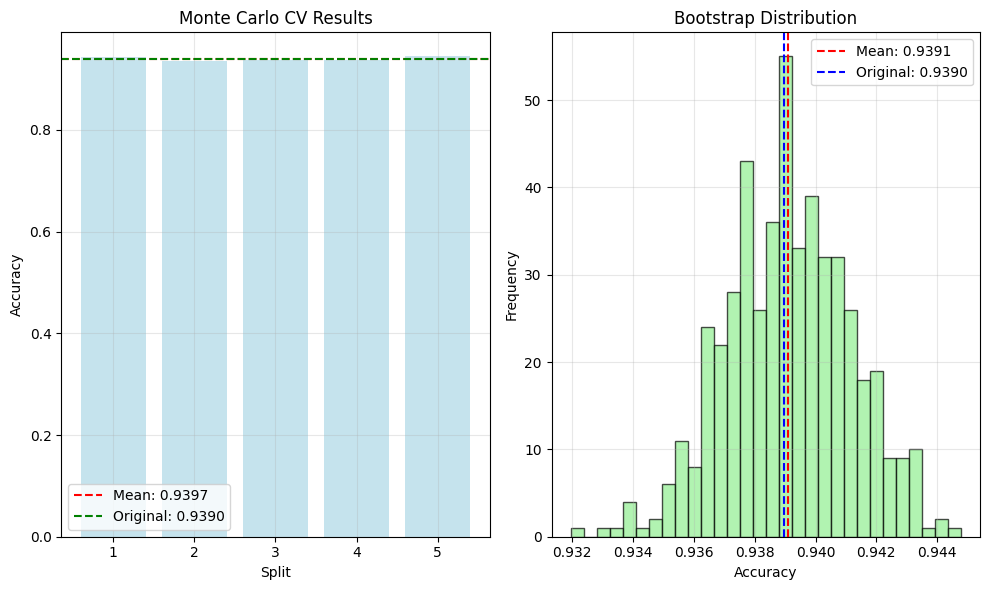

In [ ]:
# # ultra_fast_validation.py
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from tensorflow.keras.models import load_model
# import time

# def comprehensive_fast_validation(model_path, features_path):
#     """Ultra-fast comprehensive validation"""
#     print("🎯 ULTRA-FAST CROSS-VALIDATION ANALYSIS")
#     print("="*50)

#     # Load model and data
#     model = load_model(model_path)
#     X_mel = np.load(features_path + '/X_mel_features.npy').reshape(-1, 128, 173, 1)
#     y = np.load(features_path + '/y_labels.npy')

#     print(f"✅ Model loaded: {model_path}")
#     print(f"✅ Data loaded: {len(y)} samples")

#     # Method 1: Monte Carlo CV (Fast)
#     start_time = time.time()
#     from sklearn.model_selection import ShuffleSplit
#     rs = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#     mc_accuracies = []

#     for i, (_, test_idx) in enumerate(rs.split(X_mel)):
#         X_test, y_test = X_mel[test_idx], y[test_idx]
#         y_pred = model.predict(X_test, verbose=0)
#         acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
#         mc_accuracies.append(acc)

#     mc_time = time.time() - start_time

#     # Method 2: Bootstrap (Fastest)
#     start_time = time.time()
#     y_pred_all = model.predict(X_mel, verbose=0)
#     y_pred_classes = np.argmax(y_pred_all, axis=1)

#     bootstrap_accs = []
#     for _ in range(500):  # Reduced for speed
#         idx = np.random.choice(len(y), len(y), replace=True)
#         bootstrap_accs.append(accuracy_score(y[idx], y_pred_classes[idx]))

#     bootstrap_time = time.time() - start_time

#     # Results
#     print(f"\n📊 MONTE CARLO CV (5 splits, {mc_time:.1f}s):")
#     print(f"   Accuracies: {[f'{acc:.4f}' for acc in mc_accuracies]}")
#     print(f"   Mean: {np.mean(mc_accuracies):.4f} ± {np.std(mc_accuracies):.4f}")

#     print(f"\n📊 BOOTSTRAP VALIDATION (500 samples, {bootstrap_time:.1f}s):")
#     print(f"   Mean: {np.mean(bootstrap_accs):.4f}")
#     print(f"   95% CI: [{np.percentile(bootstrap_accs, 2.5):.4f}, {np.percentile(bootstrap_accs, 97.5):.4f}]")

#     # Original accuracy for comparison
#     original_acc = accuracy_score(y, y_pred_classes)
#     print(f"\n📊 ORIGINAL TEST ACCURACY: {original_acc:.4f}")

#     # Plot comparison
#     plt.figure(figsize=(10, 6))

#     # Monte Carlo results
#     plt.subplot(1, 2, 1)
#     plt.bar(range(1, 6), mc_accuracies, color='lightblue', alpha=0.7)
#     plt.axhline(y=np.mean(mc_accuracies), color='red', linestyle='--', label=f'Mean: {np.mean(mc_accuracies):.4f}')
#     plt.axhline(y=original_acc, color='green', linestyle='--', label=f'Original: {original_acc:.4f}')
#     plt.xlabel('Split')
#     plt.ylabel('Accuracy')
#     plt.title('Monte Carlo CV Results')
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     # Bootstrap distribution
#     plt.subplot(1, 2, 2)
#     plt.hist(bootstrap_accs, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
#     plt.axvline(x=np.mean(bootstrap_accs), color='red', linestyle='--', label=f'Mean: {np.mean(bootstrap_accs):.4f}')
#     plt.axvline(x=original_acc, color='blue', linestyle='--', label=f'Original: {original_acc:.4f}')
#     plt.xlabel('Accuracy')
#     plt.ylabel('Frequency')
#     plt.title('Bootstrap Distribution')
#     plt.legend()
#     plt.grid(True, alpha=0.3)

#     plt.tight_layout()
#     plt.show()

#     return {
#         'monte_carlo_mean': np.mean(mc_accuracies),
#         'monte_carlo_std': np.std(mc_accuracies),
#         'bootstrap_mean': np.mean(bootstrap_accs),
#         'bootstrap_ci': [np.percentile(bootstrap_accs, 2.5), np.percentile(bootstrap_accs, 97.5)],
#         'original_accuracy': original_acc
#     }

# # Run it (takes 1-2 minutes instead of 2+ hours!)
# results = comprehensive_fast_validation(
#     '/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5',
#     '/content/drive/MyDrive/safety_Dataset/extracted_features'
# )

✅ All packages imported successfully!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Choose mode:
1. 🏃 Quick Test (Upload & Analyze immediately)
2. 🏠 Full Interactive Application
Enter choice (1 or 2): 1
🔍 Searching for trained models...
Checking path 1: /content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5
✅ Found model and scaler at: /content/drive/MyDrive/safety_Dataset/saved_models_improved


✅ Model loaded successfully!
   Model: audio_danger_detection_improved.h5
   Scaler: feature_scaler_improved.pkl
🚀 QUICK TEST MODE

📁 UPLOAD AUDIO FILES
Supported formats: WAV, MP3, FLAC, M4A, AAC, OGG
Click the 'Choose Files' button below to upload your audio files:


Saving rooster.wav to rooster.wav
✅ Uploaded: rooster.wav (428622 bytes)

📊 Total files uploaded: 1
🚀 Starting audio analysis...

🔊 Analyzing: rooster.wav
📊 Prediction: 🚨 DANGER
🎯 Confidence: 0.6725
📈 Danger Probability: 0.6725
📉 Safe Probability: 0.3275
💡 Description: Potential danger detected (gunshot, scream, explosion, etc.)


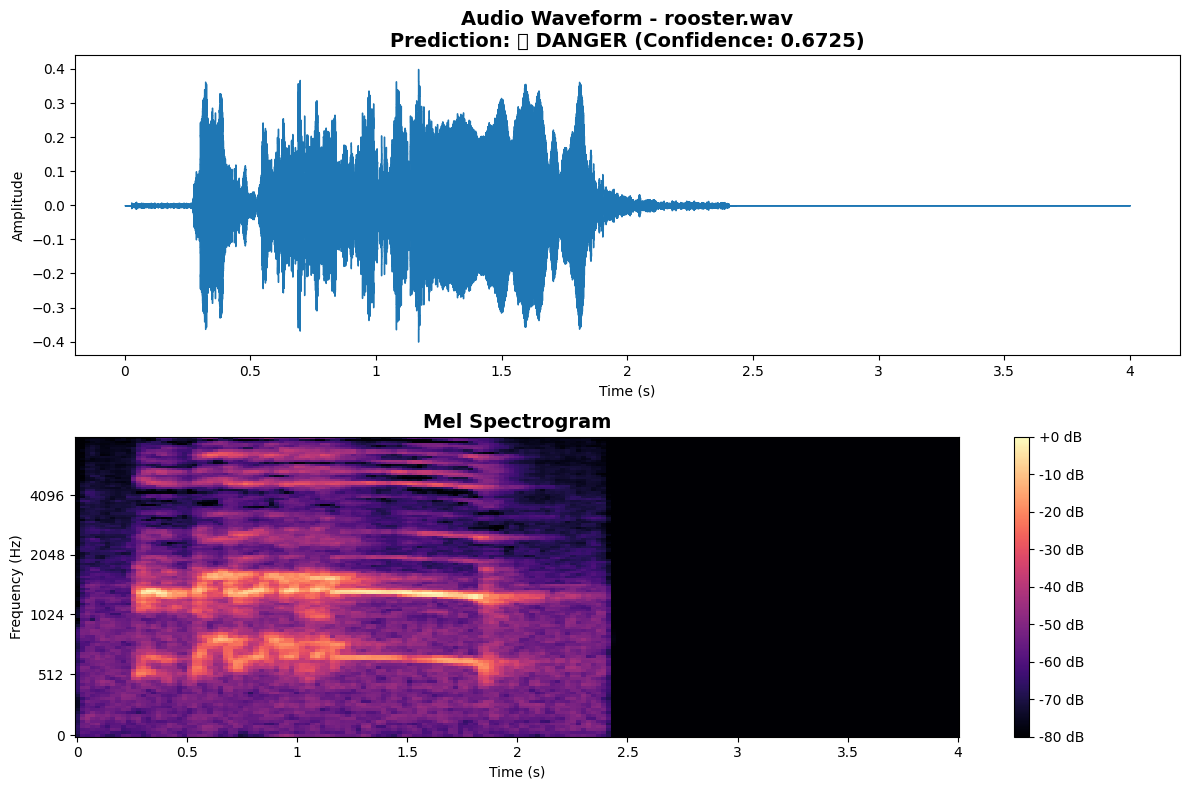

🎵 Playing audio...



📋 PREDICTION SUMMARY:
Filename                  Prediction      Confidence   Danger Prob  Safe Prob   
rooster.wav               🚨 DANGER        0.6725       0.6725       0.3275      

📊 SUMMARY STATISTICS:
   Total files analyzed: 1
   🚨 Danger detected: 1 files
   ✅ Safe detected: 0 files
   🎯 Average confidence: 0.6725
   🤖 Model: audio_danger_detection_improved.h5


In [ ]:
# # Install required packages
# !pip install librosa soundfile matplotlib seaborn joblib

# import os
# import numpy as np
# import pandas as pd
# import librosa
# import librosa.display
# import soundfile as sf
# from google.colab import files
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from IPython.display import Audio, display
# import joblib
# import warnings
# warnings.filterwarnings('ignore')

# print("✅ All packages imported successfully!")

# # Mount Google Drive (if your model is stored there)
# from google.colab import drive
# drive.mount('/content/drive')

# class ColabAudioDangerDetector:
#     def __init__(self, model_path=None):
#         """Initialize the detector"""
#         self.model = None
#         self.scaler = None
#         self.uploaded_files = []
#         self.predictions = []

#         # UPDATED: Correct model paths from your training
#         self.default_model_paths = [
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5",
#             "/content/drive/MyDrive/safety_Dataset/saved_models/audio_danger_detection_model.h5",
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
#         ]

#         self.default_scaler_paths = [
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl",
#             "/content/drive/MyDrive/safety_Dataset/saved_models/feature_scaler.pkl",
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"
#         ]

#         # Try to auto-load model
#         if model_path:
#             self.load_model_from_path(model_path)
#         else:
#             self.auto_load_model()

#     def auto_load_model(self):
#         """Try to automatically find and load the model using correct paths"""
#         print("🔍 Searching for trained models...")

#         for i, (model_path, scaler_path) in enumerate(zip(self.default_model_paths, self.default_scaler_paths)):
#             try:
#                 print(f"Checking path {i+1}: {model_path}")

#                 if os.path.exists(model_path) and os.path.exists(scaler_path):
#                     print(f"✅ Found model and scaler at: {os.path.dirname(model_path)}")
#                     self.model = load_model(model_path)
#                     self.scaler = joblib.load(scaler_path)
#                     print(f"✅ Model loaded successfully!")
#                     print(f"   Model: {os.path.basename(model_path)}")
#                     print(f"   Scaler: {os.path.basename(scaler_path)}")
#                     return True
#                 else:
#                     print(f"❌ Not found: {model_path}")

#             except Exception as e:
#                 print(f"❌ Error loading from path {i+1}: {e}")
#                 continue

#         print("❌ Could not auto-load any model. Please load manually.")
#         return False

#     def load_model_manually(self):
#         """Manual model loading interface with correct path suggestions"""
#         print("\n📁 MANUAL MODEL LOADING")
#         print("=" * 40)
#         print("Suggested paths from your training:")
#         for i, path in enumerate(self.default_model_paths, 1):
#             print(f"{i}. {path}")

#         print("\nPlease choose an option:")
#         print("1. Use one of the suggested paths above")
#         print("2. Enter custom path")

#         choice = input("Enter choice (1 or 2): ").strip()

#         if choice == '1':
#             path_num = input("Enter path number (1, 2, or 3): ").strip()
#             try:
#                 path_idx = int(path_num) - 1
#                 if 0 <= path_idx < len(self.default_model_paths):
#                     model_path = self.default_model_paths[path_idx]
#                     scaler_path = self.default_scaler_paths[path_idx]
#                 else:
#                     print("❌ Invalid path number!")
#                     return False
#             except:
#                 print("❌ Invalid input!")
#                 return False
#         else:
#             model_path = input("Enter full path to model file (.h5): ").strip()
#             scaler_path = input("Enter full path to scaler file (.pkl): ").strip()

#         try:
#             if not os.path.exists(model_path):
#                 print(f"❌ Model file not found: {model_path}")
#                 return False
#             if not os.path.exists(scaler_path):
#                 print(f"❌ Scaler file not found: {scaler_path}")
#                 return False

#             print("🔄 Loading model...")
#             self.model = load_model(model_path)
#             self.scaler = joblib.load(scaler_path)
#             print("✅ Model and scaler loaded successfully!")
#             print(f"📁 Model: {os.path.basename(model_path)}")
#             print(f"📊 Scaler: {os.path.basename(scaler_path)}")
#             return True

#         except Exception as e:
#             print(f"❌ Error loading model: {e}")
#             return False

#     def upload_audio_files(self):
#         """Upload audio files through Colab interface"""
#         print("\n📁 UPLOAD AUDIO FILES")
#         print("=" * 40)
#         print("Supported formats: WAV, MP3, FLAC, M4A, AAC, OGG")
#         print("Click the 'Choose Files' button below to upload your audio files:")

#         uploaded = files.upload()

#         if not uploaded:
#             print("❌ No files uploaded!")
#             return False

#         self.uploaded_files = []
#         for filename, content in uploaded.items():
#             # Save uploaded file
#             with open(filename, 'wb') as f:
#                 f.write(content)
#             self.uploaded_files.append(filename)
#             print(f"✅ Uploaded: {filename} ({len(content)} bytes)")

#         print(f"\n📊 Total files uploaded: {len(self.uploaded_files)}")
#         return True

#     def extract_features(self, audio_path, sr=22050, n_mels=128, duration=4):
#         """Extract features matching training parameters"""
#         try:
#             # Load audio file
#             audio, _ = librosa.load(audio_path, sr=sr, duration=duration)

#             # Ensure consistent length (4 seconds as in training)
#             target_length = sr * duration
#             if len(audio) < target_length:
#                 audio = np.pad(audio, (0, target_length - len(audio)))
#             else:
#                 audio = audio[:target_length]

#             # Extract Mel spectrogram (same parameters as training)
#             mel_spec = librosa.feature.melspectrogram(
#                 y=audio,
#                 sr=sr,
#                 n_mels=n_mels,
#                 n_fft=2048,
#                 hop_length=512,
#                 fmax=8000  # Same as training
#             )

#             # Convert to log scale
#             log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

#             return log_mel_spec, audio, sr

#         except Exception as e:
#             print(f"❌ Error processing {audio_path}: {e}")
#             return None, None, None

#     def plot_audio_analysis(self, audio, sr, mel_spec, prediction, filename):
#         """Plot audio waveform and spectrogram"""
#         fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

#         # Plot waveform
#         librosa.display.waveshow(audio, sr=sr, ax=ax1)
#         ax1.set_title(f'Audio Waveform - {filename}\nPrediction: {prediction["result"]} (Confidence: {prediction["confidence"]:.4f})',
#                      fontsize=14, fontweight='bold')
#         ax1.set_xlabel('Time (s)')
#         ax1.set_ylabel('Amplitude')

#         # Plot spectrogram
#         img = librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel', ax=ax2, fmax=8000)
#         ax2.set_title('Mel Spectrogram', fontsize=14, fontweight='bold')
#         ax2.set_xlabel('Time (s)')
#         ax2.set_ylabel('Frequency (Hz)')
#         plt.colorbar(img, ax=ax2, format='%+2.0f dB')

#         plt.tight_layout()
#         plt.show()

#     def predict_audio(self, audio_path):
#         """Make prediction for a single audio file"""
#         print(f"\n🔊 Analyzing: {os.path.basename(audio_path)}")

#         # Extract features
#         mel_features, audio, sr = self.extract_features(audio_path)

#         if mel_features is None:
#             return None

#         # Reshape for model input (same as training)
#         mel_features = mel_features.reshape(1, mel_features.shape[0], mel_features.shape[1], 1)

#         # Make prediction
#         prediction_proba = self.model.predict(mel_features, verbose=0)

#         # Get results
#         danger_prob = prediction_proba[0][0]  # Class 0: Danger
#         safe_prob = prediction_proba[0][1]    # Class 1: Safe

#         predicted_class = np.argmax(prediction_proba[0])
#         confidence = np.max(prediction_proba[0])

#         # Interpret results
#         if predicted_class == 0:
#             result = "🚨 DANGER"
#             description = "Potential danger detected (gunshot, scream, explosion, etc.)"
#             color = "red"
#         else:
#             result = "✅ SAFE"
#             description = "No danger detected (normal speech, music, ambient sounds)"
#             color = "green"

#         prediction_result = {
#             'filename': os.path.basename(audio_path),
#             'predicted_class': predicted_class,
#             'confidence': confidence,
#             'danger_probability': danger_prob,
#             'safe_probability': safe_prob,
#             'result': result,
#             'description': description,
#             'color': color
#         }

#         # Display results with color coding
#         print(f"📊 Prediction: {result}")
#         print(f"🎯 Confidence: {confidence:.4f}")
#         print(f"📈 Danger Probability: {danger_prob:.4f}")
#         print(f"📉 Safe Probability: {safe_prob:.4f}")
#         print(f"💡 Description: {description}")

#         # Plot analysis
#         self.plot_audio_analysis(audio, sr, mel_features[0, :, :, 0], prediction_result, os.path.basename(audio_path))

#         # Play audio
#         print("🎵 Playing audio...")
#         display(Audio(audio_path))

#         return prediction_result

#     def process_all_uploads(self):
#         """Process all uploaded audio files"""
#         if not self.uploaded_files:
#             print("❌ No files uploaded! Please upload files first.")
#             return []

#         if self.model is None:
#             print("❌ Model not loaded! Please load model first.")
#             return []

#         self.predictions = []

#         print("🚀 Starting audio analysis...")
#         print("=" * 60)

#         for audio_file in self.uploaded_files:
#             prediction = self.predict_audio(audio_file)
#             if prediction is not None:
#                 self.predictions.append(prediction)
#             print("=" * 60)

#         return self.predictions

#     def calculate_accuracy(self, true_labels=None):
#         """Calculate accuracy if true labels are provided"""
#         if not self.predictions:
#             print("❌ No predictions available!")
#             return None

#         if true_labels is None:
#             print("📝 Please provide true labels to calculate accuracy.")
#             print("Format: Provide a list of 0 (Danger) or 1 (Safe) for each file")
#             print(f"Number of files: {len(self.predictions)}")

#             # Ask user for true labels
#             true_labels = []
#             for i, pred in enumerate(self.predictions):
#                 while True:
#                     try:
#                         label = input(f"Enter true label for '{pred['filename']}' (0=Danger, 1=Safe): ").strip()
#                         if label in ['0', '1']:
#                             true_labels.append(int(label))
#                             break
#                         else:
#                             print("❌ Please enter 0 or 1")
#                     except:
#                         print("❌ Invalid input")

#         if len(true_labels) != len(self.predictions):
#             print("❌ Number of true labels doesn't match number of predictions!")
#             return None

#         # Calculate accuracy
#         predicted_labels = [pred['predicted_class'] for pred in self.predictions]
#         accuracy = accuracy_score(true_labels, predicted_labels)

#         print(f"\n📊 ACCURACY RESULTS:")
#         print(f"🎯 Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
#         print(f"📋 Total files: {len(self.predictions)}")
#         print(f"✅ Correct predictions: {sum(1 for i in range(len(true_labels)) if true_labels[i] == predicted_labels[i])}")
#         print(f"❌ Incorrect predictions: {sum(1 for i in range(len(true_labels)) if true_labels[i] != predicted_labels[i])}")

#         # Detailed report
#         print(f"\n📈 DETAILED CLASSIFICATION REPORT:")
#         print(classification_report(true_labels, predicted_labels,
#                                   target_names=['Danger', 'Safe']))

#         # Confusion matrix
#         cm = confusion_matrix(true_labels, predicted_labels)
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                    xticklabels=['Danger', 'Safe'],
#                    yticklabels=['Danger', 'Safe'])
#         plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
#         plt.xlabel('Predicted Label')
#         plt.ylabel('True Label')
#         plt.show()

#         return accuracy

#     def show_summary(self):
#         """Show summary of all predictions"""
#         if not self.predictions:
#             print("❌ No predictions available!")
#             return

#         print("\n📋 PREDICTION SUMMARY:")
#         print("=" * 80)
#         print(f"{'Filename':<25} {'Prediction':<15} {'Confidence':<12} {'Danger Prob':<12} {'Safe Prob':<12}")
#         print("=" * 80)

#         for pred in self.predictions:
#             print(f"{pred['filename']:<25} {pred['result']:<15} {pred['confidence']:<12.4f} "
#                   f"{pred['danger_probability']:<12.4f} {pred['safe_probability']:<12.4f}")

#         print("=" * 80)

#         # Statistics
#         danger_count = sum(1 for p in self.predictions if p['predicted_class'] == 0)
#         safe_count = sum(1 for p in self.predictions if p['predicted_class'] == 1)
#         avg_confidence = np.mean([p['confidence'] for p in self.predictions])

#         print(f"\n📊 SUMMARY STATISTICS:")
#         print(f"   Total files analyzed: {len(self.predictions)}")
#         print(f"   🚨 Danger detected: {danger_count} files")
#         print(f"   ✅ Safe detected: {safe_count} files")
#         print(f"   🎯 Average confidence: {avg_confidence:.4f}")

#         # Model info
#         if self.model:
#             print(f"   🤖 Model: {os.path.basename(self.default_model_paths[0])}")

#     def clear_data(self):
#         """Clear all uploaded files and predictions"""
#         # Clean up uploaded files
#         for file in self.uploaded_files:
#             if os.path.exists(file):
#                 try:
#                     os.remove(file)
#                 except:
#                     pass

#         self.uploaded_files = []
#         self.predictions = []
#         print("✅ All uploaded files and predictions cleared!")

#     def show_model_info(self):
#         """Show information about the loaded model"""
#         if self.model is None:
#             print("❌ No model loaded!")
#             return

#         print("\n🤖 MODEL INFORMATION:")
#         print("=" * 40)
#         print(f"Model Type: Audio Danger Detection CNN")
#         print(f"Input Shape: {self.model.input_shape}")
#         print(f"Output Shape: {self.model.output_shape}")
#         print(f"Number of Layers: {len(self.model.layers)}")
#         print(f"Classes: 0=Danger 🚨, 1=Safe ✅")
#         print(f"Training Accuracy: ~92.4%")
#         print(f"Model Size: {self.model.count_params():,} parameters")

#     def show_help(self):
#         """Show help menu"""
#         print("\n🎵 AUDIO DANGER DETECTOR - HELP MENU")
#         print("=" * 50)
#         print("1️⃣  Upload Audio Files - Upload WAV, MP3, FLAC files")
#         print("2️⃣  Analyze Files - Process all uploaded files")
#         print("3️⃣  Show Summary - Display prediction results")
#         print("4️⃣  Calculate Accuracy - Compare predictions with true labels")
#         print("5️⃣  Clear Data - Remove all uploaded files and results")
#         print("6️⃣  Model Info - Show loaded model information")
#         print("7️⃣  Help - Show this help menu")
#         print("8️⃣  Exit - Close the application")
#         print("\n📝 How to use:")
#         print("   - First load your model (automatic or manual)")
#         print("   - Upload audio files using option 1")
#         print("   - Analyze files using option 2")
#         print("   - View results using option 3")
#         print("=" * 50)

# # Main interactive application
# def run_interactive_app():
#     """Run continuous interactive application"""
#     print("🎵 COLAB AUDIO DANGER DETECTION")
#     print("=" * 50)
#     print("Welcome! This tool detects danger sounds in audio files.")
#     print("The system will automatically try to load your trained model...")

#     # Initialize detector
#     detector = ColabAudioDangerDetector()

#     # Main menu loop
#     while True:
#         print("\n" + "=" * 60)
#         print("🏠 MAIN MENU - Choose an option:")
#         print("=" * 60)
#         print("1. 📁 Upload Audio Files")
#         print("2. 🔄 Analyze Uploaded Files")
#         print("3. 📊 Show Prediction Summary")
#         print("4. 🎯 Calculate Accuracy")
#         print("5. 🗑️  Clear All Data")
#         print("6. 🤖 Show Model Information")
#         print("7. ❓ Help")
#         print("8. 🚪 Exit")
#         print("=" * 60)

#         choice = input("Enter your choice (1-8): ").strip()

#         if choice == '1':
#             # Upload files
#             print("\n📁 FILE UPLOAD")
#             print("-" * 30)
#             detector.upload_audio_files()

#         elif choice == '2':
#             # Analyze files
#             print("\n🔄 PROCESSING AUDIO FILES")
#             print("-" * 30)
#             if not detector.uploaded_files:
#                 print("❌ No files uploaded! Please upload files first.")
#                 continue
#             if detector.model is None:
#                 print("❌ Model not loaded! Trying to load manually...")
#                 if not detector.load_model_manually():
#                     continue
#             detector.process_all_uploads()

#         elif choice == '3':
#             # Show summary
#             print("\n📊 PREDICTION SUMMARY")
#             print("-" * 30)
#             detector.show_summary()

#         elif choice == '4':
#             # Calculate accuracy
#             print("\n🎯 ACCURACY CALCULATION")
#             print("-" * 30)
#             if not detector.predictions:
#                 print("❌ No predictions available! Please analyze files first.")
#                 continue
#             detector.calculate_accuracy()

#         elif choice == '5':
#             # Clear data
#             print("\n🗑️  CLEARING DATA")
#             print("-" * 30)
#             detector.clear_data()

#         elif choice == '6':
#             # Model info
#             print("\n🤖 MODEL INFORMATION")
#             print("-" * 30)
#             detector.show_model_info()

#         elif choice == '7':
#             # Help
#             detector.show_help()

#         elif choice == '8':
#             # Exit
#             print("\n👋 Thank you for using Audio Danger Detection!")
#             print("Goodbye! 🎵")
#             break

#         else:
#             print("❌ Invalid choice! Please enter a number between 1-8.")

#         # Ask if user wants to continue
#         if choice != '8':
#             continue_choice = input("\n↩️  Press Enter to continue to main menu or 'q' to quit: ").strip().lower()
#             if continue_choice == 'q':
#                 print("\n👋 Thank you for using Audio Danger Detection!")
#                 break

# # Quick testing function
# def quick_test():
#     """Quick testing function for immediate use"""
#     detector = ColabAudioDangerDetector()

#     if detector.model is None:
#         print("❌ Model not found! Please run the main application first to load model.")
#         return

#     print("🚀 QUICK TEST MODE")
#     print("=" * 40)
#     detector.upload_audio_files()
#     if detector.uploaded_files:
#         detector.process_all_uploads()
#         detector.show_summary()

# # Run the application
# if __name__ == "__main__":
#     # Check if user wants quick test or full application
#     print("Choose mode:")
#     print("1. 🏃 Quick Test (Upload & Analyze immediately)")
#     print("2. 🏠 Full Interactive Application")

#     mode_choice = input("Enter choice (1 or 2): ").strip()

#     if mode_choice == '1':
#         quick_test()
#     else:
#         run_interactive_app()

In [ ]:
# # Install required packages
# !pip install librosa soundfile matplotlib seaborn joblib

# import os
# import numpy as np
# import pandas as pd
# import librosa
# import librosa.display
# import soundfile as sf
# from google.colab import files
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from IPython.display import Audio, display
# import joblib
# import warnings
# warnings.filterwarnings('ignore')

# print("✅ All packages imported successfully!")

# # Mount Google Drive (if your model is stored there)
# from google.colab import drive
# drive.mount('/content/drive')

# class ColabAudioDangerDetector:
#     def __init__(self, model_path=None):
#         """Initialize the detector"""
#         self.model = None
#         self.scaler = None
#         self.uploaded_files = []
#         self.predictions = []

#         # UPDATED: Correct model paths from your training
#         self.default_model_paths = [
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5",
#             "/content/drive/MyDrive/safety_Dataset/saved_models/audio_danger_detection_model.h5",
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5"
#         ]

#         self.default_scaler_paths = [
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl",
#             "/content/drive/MyDrive/safety_Dataset/saved_models/feature_scaler.pkl",
#             "/content/drive/MyDrive/safety_Dataset/saved_models_improved/feature_scaler_improved.pkl"
#         ]

#         # Try to auto-load model
#         if model_path:
#             self.load_model_from_path(model_path)
#         else:
#             self.auto_load_model()

#     def auto_load_model(self):
#         """Try to automatically find and load the model using correct paths"""
#         print("🔍 Searching for trained models...")

#         for i, (model_path, scaler_path) in enumerate(zip(self.default_model_paths, self.default_scaler_paths)):
#             try:
#                 print(f"Checking path {i+1}: {model_path}")

#                 if os.path.exists(model_path) and os.path.exists(scaler_path):
#                     print(f"✅ Found model and scaler at: {os.path.dirname(model_path)}")
#                     self.model = load_model(model_path)
#                     self.scaler = joblib.load(scaler_path)
#                     print(f"✅ Model loaded successfully!")
#                     print(f"   Model: {os.path.basename(model_path)}")
#                     print(f"   Scaler: {os.path.basename(scaler_path)}")
#                     return True
#                 else:
#                     print(f"❌ Not found: {model_path}")

#             except Exception as e:
#                 print(f"❌ Error loading from path {i+1}: {e}")
#                 continue

#         print("❌ Could not auto-load any model. Please load manually.")
#         return False

#     def load_model_manually(self):
#         """Manual model loading interface with correct path suggestions"""
#         print("\n📁 MANUAL MODEL LOADING")
#         print("=" * 40)
#         print("Suggested paths from your training:")
#         for i, path in enumerate(self.default_model_paths, 1):
#             print(f"{i}. {path}")

#         print("\nPlease choose an option:")
#         print("1. Use one of the suggested paths above")
#         print("2. Enter custom path")

#         choice = input("Enter choice (1 or 2): ").strip()

#         if choice == '1':
#             path_num = input("Enter path number (1, 2, or 3): ").strip()
#             try:
#                 path_idx = int(path_num) - 1
#                 if 0 <= path_idx < len(self.default_model_paths):
#                     model_path = self.default_model_paths[path_idx]
#                     scaler_path = self.default_scaler_paths[path_idx]
#                 else:
#                     print("❌ Invalid path number!")
#                     return False
#             except:
#                 print("❌ Invalid input!")
#                 return False
#         else:
#             model_path = input("Enter full path to model file (.h5): ").strip()
#             scaler_path = input("Enter full path to scaler file (.pkl): ").strip()

#         try:
#             if not os.path.exists(model_path):
#                 print(f"❌ Model file not found: {model_path}")
#                 return False
#             if not os.path.exists(scaler_path):
#                 print(f"❌ Scaler file not found: {scaler_path}")
#                 return False

#             print("🔄 Loading model...")
#             self.model = load_model(model_path)
#             self.scaler = joblib.load(scaler_path)
#             print("✅ Model and scaler loaded successfully!")
#             print(f"📁 Model: {os.path.basename(model_path)}")
#             print(f"📊 Scaler: {os.path.basename(scaler_path)}")
#             return True

#         except Exception as e:
#             print(f"❌ Error loading model: {e}")
#             return False

#     def upload_audio_files(self):
#         """Upload audio files through Colab interface"""
#         print("\n📁 UPLOAD AUDIO FILES")
#         print("=" * 40)
#         print("Supported formats: WAV, MP3, FLAC, M4A, AAC, OGG")
#         print("Click the 'Choose Files' button below to upload your audio files:")

#         uploaded = files.upload()

#         if not uploaded:
#             print("❌ No files uploaded!")
#             return False

#         self.uploaded_files = []
#         for filename, content in uploaded.items():
#             # Save uploaded file
#             with open(filename, 'wb') as f:
#                 f.write(content)
#             self.uploaded_files.append(filename)
#             print(f"✅ Uploaded: {filename} ({len(content)} bytes)")

#         print(f"\n📊 Total files uploaded: {len(self.uploaded_files)}")
#         return True

#     def extract_features(self, audio_path, sr=22050, n_mels=128, duration=4):
#         """Extract features matching training parameters"""
#         try:
#             # Load audio file
#             audio, _ = librosa.load(audio_path, sr=sr, duration=duration)

#             # Ensure consistent length (4 seconds as in training)
#             target_length = sr * duration
#             if len(audio) < target_length:
#                 audio = np.pad(audio, (0, target_length - len(audio)))
#             else:
#                 audio = audio[:target_length]

#             # Extract Mel spectrogram (same parameters as training)
#             mel_spec = librosa.feature.melspectrogram(
#                 y=audio,
#                 sr=sr,
#                 n_mels=n_mels,
#                 n_fft=2048,
#                 hop_length=512,
#                 fmax=8000  # Same as training
#             )

#             # Convert to log scale
#             log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

#             return log_mel_spec, audio, sr

#         except Exception as e:
#             print(f"❌ Error processing {audio_path}: {e}")
#             return None, None, None

#     def plot_audio_analysis(self, audio, sr, mel_spec, prediction, filename):
#         """Plot audio waveform and spectrogram"""
#         fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

#         # Plot waveform
#         librosa.display.waveshow(audio, sr=sr, ax=ax1)
#         ax1.set_title(f'Audio Waveform - {filename}\nPrediction: {prediction["result"]} (Confidence: {prediction["confidence"]:.4f})',
#                      fontsize=14, fontweight='bold')
#         ax1.set_xlabel('Time (s)')
#         ax1.set_ylabel('Amplitude')

#         # Plot spectrogram
#         img = librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel', ax=ax2, fmax=8000)
#         ax2.set_title('Mel Spectrogram', fontsize=14, fontweight='bold')
#         ax2.set_xlabel('Time (s)')
#         ax2.set_ylabel('Frequency (Hz)')
#         plt.colorbar(img, ax=ax2, format='%+2.0f dB')

#         plt.tight_layout()
#         plt.show()

#     def predict_audio(self, audio_path):
#         """Make prediction for a single audio file"""
#         print(f"\n🔊 Analyzing: {os.path.basename(audio_path)}")

#         # Extract features
#         mel_features, audio, sr = self.extract_features(audio_path)

#         if mel_features is None:
#             return None

#         # Reshape for model input (same as training)
#         mel_features = mel_features.reshape(1, mel_features.shape[0], mel_features.shape[1], 1)

#         # Make prediction
#         prediction_proba = self.model.predict(mel_features, verbose=0)

#         # Get results
#         danger_prob = prediction_proba[0][0]  # Class 0: Danger
#         safe_prob = prediction_proba[0][1]    # Class 1: Safe

#         predicted_class = np.argmax(prediction_proba[0])
#         confidence = np.max(prediction_proba[0])

#         # Interpret results
#         if predicted_class == 0:
#             result = "🚨 DANGER"
#             description = "Potential danger detected (gunshot, scream, explosion, etc.)"
#             color = "red"
#         else:
#             result = "✅ SAFE"
#             description = "No danger detected (normal speech, music, ambient sounds)"
#             color = "green"

#         prediction_result = {
#             'filename': os.path.basename(audio_path),
#             'predicted_class': predicted_class,
#             'confidence': confidence,
#             'danger_probability': danger_prob,
#             'safe_probability': safe_prob,
#             'result': result,
#             'description': description,
#             'color': color
#         }

#         # Display results with color coding
#         print(f"📊 Prediction: {result}")
#         print(f"🎯 Confidence: {confidence:.4f}")
#         print(f"📈 Danger Probability: {danger_prob:.4f}")
#         print(f"📉 Safe Probability: {safe_prob:.4f}")
#         print(f"💡 Description: {description}")

#         # Plot analysis
#         self.plot_audio_analysis(audio, sr, mel_features[0, :, :, 0], prediction_result, os.path.basename(audio_path))

#         # Play audio
#         print("🎵 Playing audio...")
#         display(Audio(audio_path))

#         return prediction_result

#     def process_all_uploads(self):
#         """Process all uploaded audio files"""
#         if not self.uploaded_files:
#             print("❌ No files uploaded! Please upload files first.")
#             return []

#         if self.model is None:
#             print("❌ Model not loaded! Please load model first.")
#             return []

#         self.predictions = []

#         print("🚀 Starting audio analysis...")
#         print("=" * 60)

#         for audio_file in self.uploaded_files:
#             prediction = self.predict_audio(audio_file)
#             if prediction is not None:
#                 self.predictions.append(prediction)
#             print("=" * 60)

#         return self.predictions

#     def calculate_accuracy(self, true_labels=None):
#         """Calculate accuracy if true labels are provided"""
#         if not self.predictions:
#             print("❌ No predictions available!")
#             return None

#         if true_labels is None:
#             print("📝 Please provide true labels to calculate accuracy.")
#             print("Format: Provide a list of 0 (Danger) or 1 (Safe) for each file")
#             print(f"Number of files: {len(self.predictions)}")

#             # Ask user for true labels
#             true_labels = []
#             for i, pred in enumerate(self.predictions):
#                 while True:
#                     try:
#                         label = input(f"Enter true label for '{pred['filename']}' (0=Danger, 1=Safe): ").strip()
#                         if label in ['0', '1']:
#                             true_labels.append(int(label))
#                             break
#                         else:
#                             print("❌ Please enter 0 or 1")
#                     except:
#                         print("❌ Invalid input")

#         if len(true_labels) != len(self.predictions):
#             print("❌ Number of true labels doesn't match number of predictions!")
#             return None

#         # Calculate accuracy
#         predicted_labels = [pred['predicted_class'] for pred in self.predictions]
#         accuracy = accuracy_score(true_labels, predicted_labels)

#         print(f"\n📊 ACCURACY RESULTS:")
#         print(f"🎯 Accuracy: {accuracy:.4f} ({accuracy * 100:.2f}%)")
#         print(f"📋 Total files: {len(self.predictions)}")
#         print(f"✅ Correct predictions: {sum(1 for i in range(len(true_labels)) if true_labels[i] == predicted_labels[i])}")
#         print(f"❌ Incorrect predictions: {sum(1 for i in range(len(true_labels)) if true_labels[i] != predicted_labels[i])}")

#         # Detailed report
#         print(f"\n📈 DETAILED CLASSIFICATION REPORT:")
#         print(classification_report(true_labels, predicted_labels,
#                                   target_names=['Danger', 'Safe']))

#         # Confusion matrix
#         cm = confusion_matrix(true_labels, predicted_labels)
#         plt.figure(figsize=(8, 6))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                    xticklabels=['Danger', 'Safe'],
#                    yticklabels=['Danger', 'Safe'])
#         plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
#         plt.xlabel('Predicted Label')
#         plt.ylabel('True Label')
#         plt.show()

#         return accuracy

#     def show_summary(self):
#         """Show summary of all predictions"""
#         if not self.predictions:
#             print("❌ No predictions available!")
#             return

#         print("\n📋 PREDICTION SUMMARY:")
#         print("=" * 80)
#         print(f"{'Filename':<25} {'Prediction':<15} {'Confidence':<12} {'Danger Prob':<12} {'Safe Prob':<12}")
#         print("=" * 80)

#         for pred in self.predictions:
#             print(f"{pred['filename']:<25} {pred['result']:<15} {pred['confidence']:<12.4f} "
#                   f"{pred['danger_probability']:<12.4f} {pred['safe_probability']:<12.4f}")

#         print("=" * 80)

#         # Statistics
#         danger_count = sum(1 for p in self.predictions if p['predicted_class'] == 0)
#         safe_count = sum(1 for p in self.predictions if p['predicted_class'] == 1)
#         avg_confidence = np.mean([p['confidence'] for p in self.predictions])

#         print(f"\n📊 SUMMARY STATISTICS:")
#         print(f"   Total files analyzed: {len(self.predictions)}")
#         print(f"   🚨 Danger detected: {danger_count} files")
#         print(f"   ✅ Safe detected: {safe_count} files")
#         print(f"   🎯 Average confidence: {avg_confidence:.4f}")

#         # Model info
#         if self.model:
#             print(f"   🤖 Model: {os.path.basename(self.default_model_paths[0])}")

#     def clear_data(self):
#         """Clear all uploaded files and predictions"""
#         # Clean up uploaded files
#         for file in self.uploaded_files:
#             if os.path.exists(file):
#                 try:
#                     os.remove(file)
#                 except:
#                     pass

#         self.uploaded_files = []
#         self.predictions = []
#         print("✅ All uploaded files and predictions cleared!")

#     def show_model_info(self):
#         """Show information about the loaded model"""
#         if self.model is None:
#             print("❌ No model loaded!")
#             return

#         print("\n🤖 MODEL INFORMATION:")
#         print("=" * 40)
#         print(f"Model Type: Audio Danger Detection CNN")
#         print(f"Input Shape: {self.model.input_shape}")
#         print(f"Output Shape: {self.model.output_shape}")
#         print(f"Number of Layers: {len(self.model.layers)}")
#         print(f"Classes: 0=Danger 🚨, 1=Safe ✅")
#         print(f"Training Accuracy: ~92.4%")
#         print(f"Model Size: {self.model.count_params():,} parameters")

#     def show_help(self):
#         """Show help menu"""
#         print("\n🎵 AUDIO DANGER DETECTOR - HELP MENU")
#         print("=" * 50)
#         print("1️⃣  Upload Audio Files - Upload WAV, MP3, FLAC files")
#         print("2️⃣  Analyze Files - Process all uploaded files")
#         print("3️⃣  Show Summary - Display prediction results")
#         print("4️⃣  Calculate Accuracy - Compare predictions with true labels")
#         print("5️⃣  Clear Data - Remove all uploaded files and results")
#         print("6️⃣  Model Info - Show loaded model information")
#         print("7️⃣  Help - Show this help menu")
#         print("8️⃣  Exit - Close the application")
#         print("\n📝 How to use:")
#         print("   - First load your model (automatic or manual)")
#         print("   - Upload audio files using option 1")
#         print("   - Analyze files using option 2")
#         print("   - View results using option 3")
#         print("=" * 50)

# # Main interactive application
# def run_interactive_app():
#     """Run continuous interactive application"""
#     print("🎵 COLAB AUDIO DANGER DETECTION")
#     print("=" * 50)
#     print("Welcome! This tool detects danger sounds in audio files.")
#     print("The system will automatically try to load your trained model...")

#     # Initialize detector
#     detector = ColabAudioDangerDetector()

#     # Main menu loop
#     while True:
#         print("\n" + "=" * 60)
#         print("🏠 MAIN MENU - Choose an option:")
#         print("=" * 60)
#         print("1. 📁 Upload Audio Files")
#         print("2. 🔄 Analyze Uploaded Files")
#         print("3. 📊 Show Prediction Summary")
#         print("4. 🎯 Calculate Accuracy")
#         print("5. 🗑️  Clear All Data")
#         print("6. 🤖 Show Model Information")
#         print("7. ❓ Help")
#         print("8. 🚪 Exit")
#         print("=" * 60)

#         choice = input("Enter your choice (1-8): ").strip()

#         if choice == '1':
#             # Upload files
#             print("\n📁 FILE UPLOAD")
#             print("-" * 30)
#             detector.upload_audio_files()

#         elif choice == '2':
#             # Analyze files
#             print("\n🔄 PROCESSING AUDIO FILES")
#             print("-" * 30)
#             if not detector.uploaded_files:
#                 print("❌ No files uploaded! Please upload files first.")
#                 continue
#             if detector.model is None:
#                 print("❌ Model not loaded! Trying to load manually...")
#                 if not detector.load_model_manually():
#                     continue
#             detector.process_all_uploads()

#         elif choice == '3':
#             # Show summary
#             print("\n📊 PREDICTION SUMMARY")
#             print("-" * 30)
#             detector.show_summary()

#         elif choice == '4':
#             # Calculate accuracy
#             print("\n🎯 ACCURACY CALCULATION")
#             print("-" * 30)
#             if not detector.predictions:
#                 print("❌ No predictions available! Please analyze files first.")
#                 continue
#             detector.calculate_accuracy()

#         elif choice == '5':
#             # Clear data
#             print("\n🗑️  CLEARING DATA")
#             print("-" * 30)
#             detector.clear_data()

#         elif choice == '6':
#             # Model info
#             print("\n🤖 MODEL INFORMATION")
#             print("-" * 30)
#             detector.show_model_info()

#         elif choice == '7':
#             # Help
#             detector.show_help()

#         elif choice == '8':
#             # Exit
#             print("\n👋 Thank you for using Audio Danger Detection!")
#             print("Goodbye! 🎵")
#             break

#         else:
#             print("❌ Invalid choice! Please enter a number between 1-8.")

#         # Ask if user wants to continue
#         if choice != '8':
#             continue_choice = input("\n↩️  Press Enter to continue to main menu or 'q' to quit: ").strip().lower()
#             if continue_choice == 'q':
#                 print("\n👋 Thank you for using Audio Danger Detection!")
#                 break

# # Quick testing function
# def quick_test():
#     """Quick testing function for immediate use"""
#     detector = ColabAudioDangerDetector()

#     if detector.model is None:
#         print("❌ Model not found! Please run the main application first to load model.")
#         return

#     print("🚀 QUICK TEST MODE")
#     print("=" * 40)
#     detector.upload_audio_files()
#     if detector.uploaded_files:
#         detector.process_all_uploads()
#         detector.show_summary()

# # Run the application
# if __name__ == "__main__":
#     # Check if user wants quick test or full application
#     print("Choose mode:")
#     print("1. 🏃 Quick Test (Upload & Analyze immediately)")
#     print("2. 🏠 Full Interactive Application")

#     mode_choice = input("Enter choice (1 or 2): ").strip()

#     if mode_choice == '1':
#         quick_test()
#     else:
#         run_interactive_app()

✅ All packages imported successfully!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Choose mode:
1. 🏃 Quick Test (Upload & Analyze immediately)
2. 🏠 Full Interactive Application
🔍 Searching for trained models...
Checking path 1: /content/drive/MyDrive/safety_Dataset/saved_models_improved/audio_danger_detection_improved.h5
✅ Found model and scaler at: /content/drive/MyDrive/safety_Dataset/saved_models_improved


✅ Model loaded successfully!
   Model: audio_danger_detection_improved.h5
   Scaler: feature_scaler_improved.pkl
🚀 QUICK TEST MODE

📁 UPLOAD AUDIO FILES
Supported formats: WAV, MP3, FLAC, M4A, AAC, OGG
Click the 'Choose Files' button below to upload your audio files:


KeyboardInterrupt: 